# Coronavirus Disease (COVID-19)

https://github.com/owid/covid-19-data/tree/master/public/data/
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display
from matplotlib.ticker import FuncFormatter

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')                                              

# Import Image

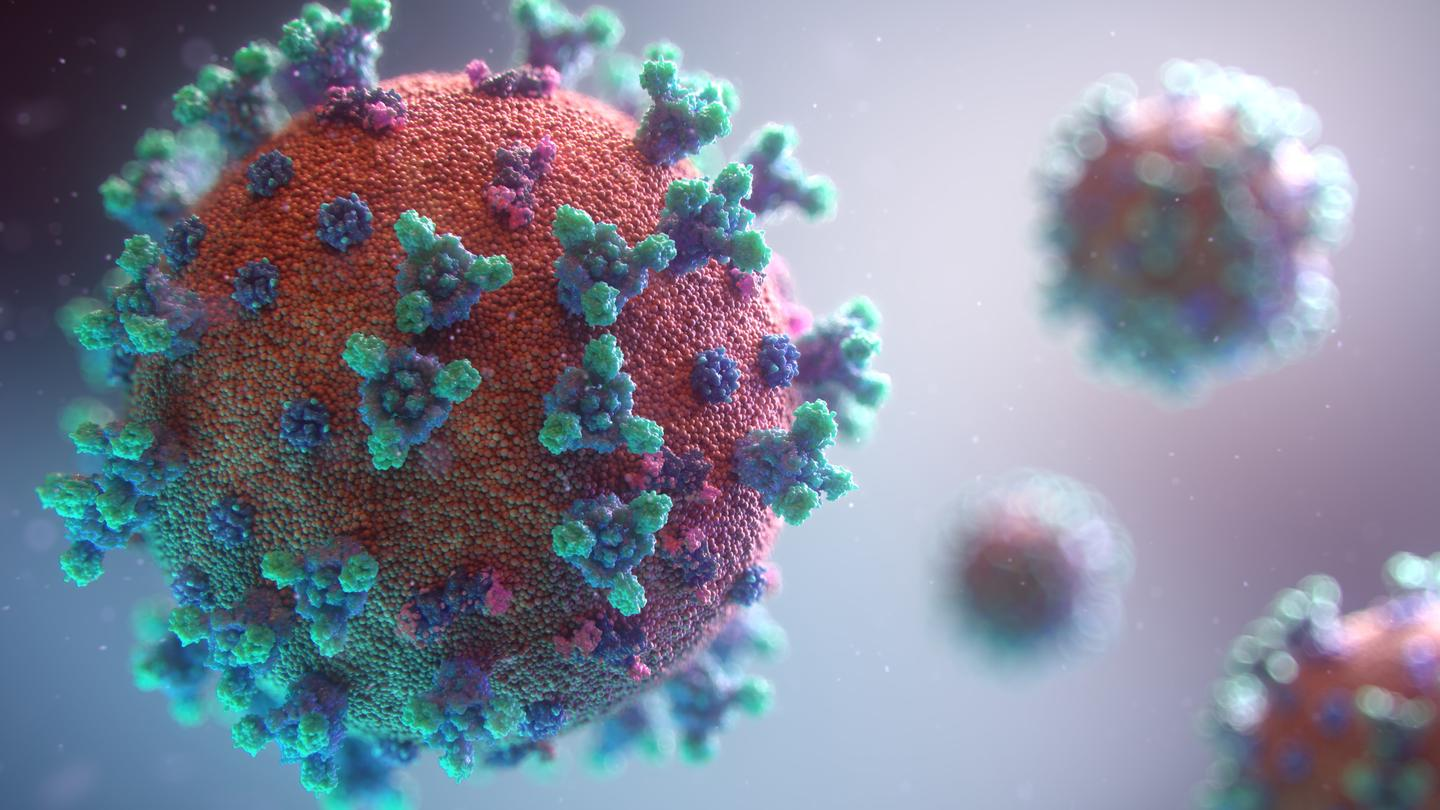

In [3]:
# get current working directory
path_directory = os.getcwd()  

image_path = os.path.join(path_directory, 'images', 'Covid 19.jpg')

display.Image(image_path)

# Fetch Data

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)

# Head and Tail

In [5]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [6]:
df.shape

(223066, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223066 entries, 0 to 223065
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    223066 non-null  object 
 1   continent                                   210250 non-null  object 
 2   location                                    223066 non-null  object 
 3   date                                        223066 non-null  object 
 4   total_cases                                 213918 non-null  float64
 5   new_cases                                   213665 non-null  float64
 6   new_cases_smoothed                          212469 non-null  float64
 7   total_deaths                                194770 non-null  float64
 8   new_deaths                                  194718 non-null  float64
 9   new_deaths_smoothed                         193538 non-null  float64
 

In [8]:
df.dtypes.value_counts()

float64    62
object      5
dtype: int64

In [9]:
df['iso_code'].value_counts(ascending=False).head(10)                     # explore the top ten count for different iso codes

ARG         1015
MEX         1015
THA         1012
TWN         1000
MAC          994
OWID_WRL     994
OWID_UMC     994
KOR          994
CHN          994
USA          994
Name: iso_code, dtype: int64

# Helper Functions

In [10]:
# helper functions to format y-axis
def billion(x, pos):
    return '%1.1fB' % (x * 1e-9)

format_bill = FuncFormatter(billion)


def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
    return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)




def cntplot(data: pd.DataFrame, orient: str, palette: str|list|dict, dodge: bool, x=None, y=None, hue=None, order=None, hue_order=None, color=None, ax=None):
  '''
  
  Helper function for plotting countplots

  Parameters
  ----------

  data: pd.DataFrame
        pandas dataframe

  orient: str
        orientation of the plot
  
  palette: palette name, list or dict
        colors to use for different levels

  dodge: bool
        whether elements should be shifted along the categorial axis

  x,y,hue: None
        inputs for plotting long-form data

  Returns: ax
        Returns the axes object with the plot drawn
        
  '''

  return sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, orient=orient, color=color, palette=palette, dodge=dodge, ax=ax)



def plot_pie(shadow: bool, startangle: float, normalize: bool, x=None, labels=None, explode=None, autopct=None, data=None):
      '''
      Helper function for plotting pie charts

      Parameters
      ----------

      data: pd.DataFrame
           pandas dataframe

      x: None
           array like
      
      explode: None
            fraction of radius to offset each wedge
      
      autopct: None
            string function to label chart

      shadow: True
            draw shadow beneath the pie
      
      normalize: bool
            when true, makes a full pie 

      startangle: float
            angle by which the start of the pie is rotated
            

      Returns: pie chart
      
      '''

      return plt.pie(x=x, explode=explode, labels=labels, autopct=autopct, shadow=shadow, startangle=startangle, normalize=normalize, data=data)


In [11]:
df['continent'].value_counts()                                                                            

Africa           51518
Europe           48200
Asia             48006
North America    34272
Oceania          15877
South America    12377
Name: continent, dtype: int64

[Text(0.5, 1.0, 'Countplot of Continents')]

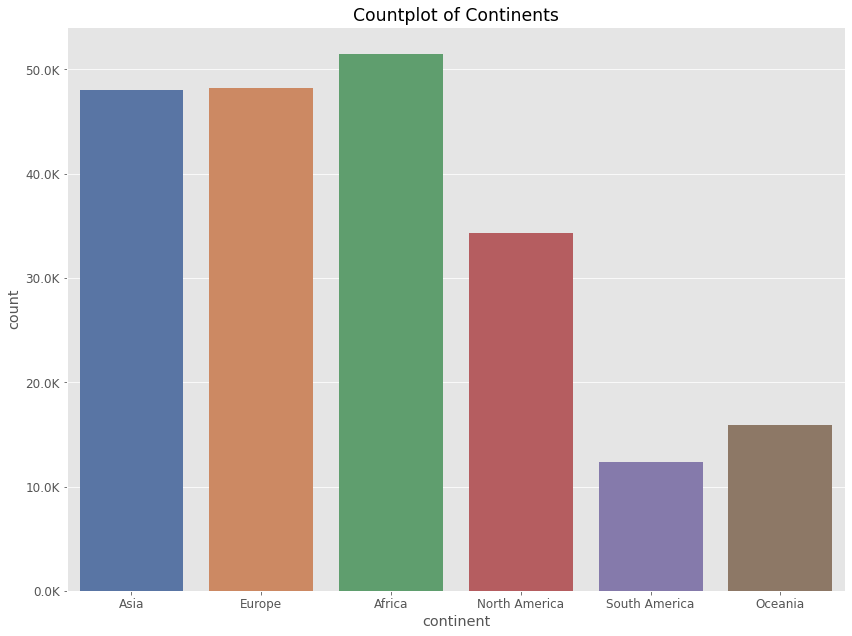

In [12]:
fig, ax = plt.subplots()

cntplot(data=df, x='continent', orient='v', palette='deep', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))
ax.set(title='Countplot of Continents')

In [13]:
round(df['continent'].value_counts(True), 3)                              # calculate the relative frequencies for each continent                        

Africa           0.245
Europe           0.229
Asia             0.228
North America    0.163
Oceania          0.076
South America    0.059
Name: continent, dtype: float64

[Text(0.5, 1.0, 'Pie chart of the relative frequency for each continent')]

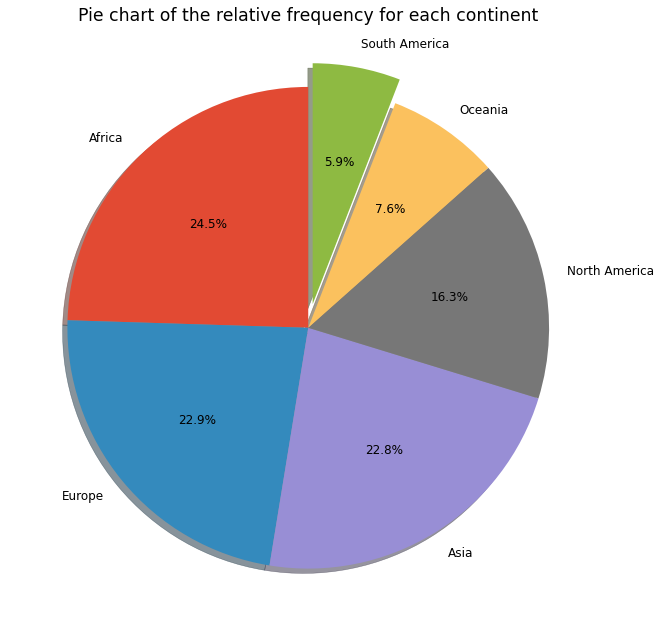

In [14]:
fig, ax = plt.subplots()

plot_pie(
  x=df['continent'].value_counts(True).values, labels=df['continent'].value_counts(True).keys(), autopct='%1.1f%%',
  shadow=True, startangle=90, normalize=True, explode=[0, 0, 0, 0, 0, 0.1]
)

ax.set(title='Pie chart of the relative frequency for each continent')

In [15]:
df['location'].value_counts().head(10)

Argentina              1015
Mexico                 1015
Thailand               1012
Taiwan                 1000
Macao                   994
World                   994
Upper middle income     994
South Korea             994
China                   994
United States           994
Name: location, dtype: int64

In [16]:
df.describe(include='object')

iso_code continent   location        date      tests_units
count    223066    210250     223066      223066           106788
unique      244         6        244        1015                4
top         ARG    Africa  Argentina  2021-09-19  tests performed
freq       1015     51518       1015         243            80099

In [17]:
df['tests_units'].value_counts()

tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

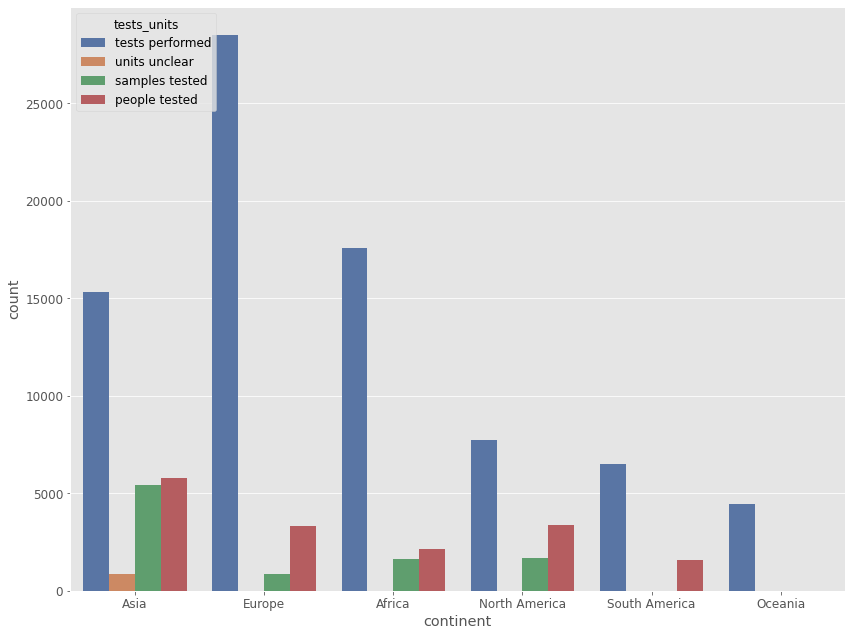

In [18]:
cntplot(data=df, orient='v', palette='deep', dodge=True, x='continent', hue='tests_units')

In [19]:
df.describe(include='float64')

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13918e+05  2.13665e+05         2.12469e+05   1.94770e+05   
mean   4.34149e+06  1.24234e+04         1.24597e+04   7.33158e+04   
std    2.71747e+07  8.56651e+04         8.37317e+04   3.77403e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.18125e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76680e+04  5.60000e+01         9.58570e+01   1.15300e+03   
75%    5.14568e+05  9.69000e+02         1.13543e+03   9.68300e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194718.00000         193538.00000             212940.00000   
mean      139.90159            140.62640              58639.20844   
std       734.69503            720.27276             104421.23883   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1051.52400   
50%         1.00000              1.57100               9954.54300   
75%        14.00000             16.00000              70561.73325   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212687.00000                    211496.00000   
mean               190.04484                       190.30395   
std               1055.48494                       669.75362   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.80000                        19.61100   
75%                 98.25200                       136.29200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193805.00000            193753.00000   
mean                  683.12178                 1.41841   
std                   969.27026                 5.11950   
min                     0.00000                 0.00000   
25%                    28.96800                 0.00000   
50%                   207.73200                 0.03500   
75%                  1012.24600                 0.98700   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192578.00000       166717.00000   28289.00000   
mean                           1.41828            0.94681     829.07494   
std                            3.35319            0.38405    2468.43300   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35200            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28289.00000    31045.00000                31045.00000   
mean                   20.87582     4153.78196                  156.14775   
std                    26.17694    10769.68377                  191.26254   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      173.00000                   32.87600   
50%                    10.38200      811.00000                   87.81100   
75%                    28.95000     3173.00000                  198.65900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7344.00000                         7344.00000   
mean               421.38045                           12.98008   
std                580.37038                           15.07811   
min             

In [20]:
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x))            # convert date to pandas datetime
df.select_dtypes(include='datetime')

date
0      2020-02-24
1      2020-02-25
2      2020-02-26
3      2020-02-27
4      2020-02-28
...           ...
223061 2022-10-07
223062 2022-10-08
223063 2022-10-09
223064 2022-10-10
223065 2022-10-11

[223066 rows x 1 columns]

In [21]:
df['day_name'] = df['date'].dt.day_name()                             # add name of the day
df['day'] = df['date'].dt.day                                         # day
df['month_num'] = df['date'].dt.month                                 # add month number
df['year'] =  df['date'].dt.year                                      # year

df[['year', 'month_num', 'day', 'day_name']]

year  month_num  day   day_name
0       2020          2   24     Monday
1       2020          2   25    Tuesday
2       2020          2   26  Wednesday
3       2020          2   27   Thursday
4       2020          2   28     Friday
...      ...        ...  ...        ...
223061  2022         10    7     Friday
223062  2022         10    8   Saturday
223063  2022         10    9     Sunday
223064  2022         10   10     Monday
223065  2022         10   11    Tuesday

[223066 rows x 4 columns]

In [22]:
# assign month names
df['month_name'] = df['month_num'].map(
                                       {
                                         1: 'Jan',
                                         2: 'Feb',
                                         3: 'Mar',
                                         4: 'Apr',
                                         5: 'May',
                                         6: 'June',
                                         7: 'July',
                                         8: 'Aug',
                                         9: 'Sep',
                                         10: 'Oct',
                                         11: 'Nov',
                                         12: 'Dec'
                                       }
                                    )

df[['month_num', 'month_name']].value_counts(ascending=False)

month_num  month_name
7          July          21774
5          May           21719
8          Aug           21718
6          June          21091
9          Sep           20984
4          Apr           20770
3          Mar           19631
10         Oct           17053
1          Jan           14919
2          Feb           14764
12         Dec           14543
11         Nov           14100
dtype: int64

<AxesSubplot:xlabel='month_name', ylabel='count'>

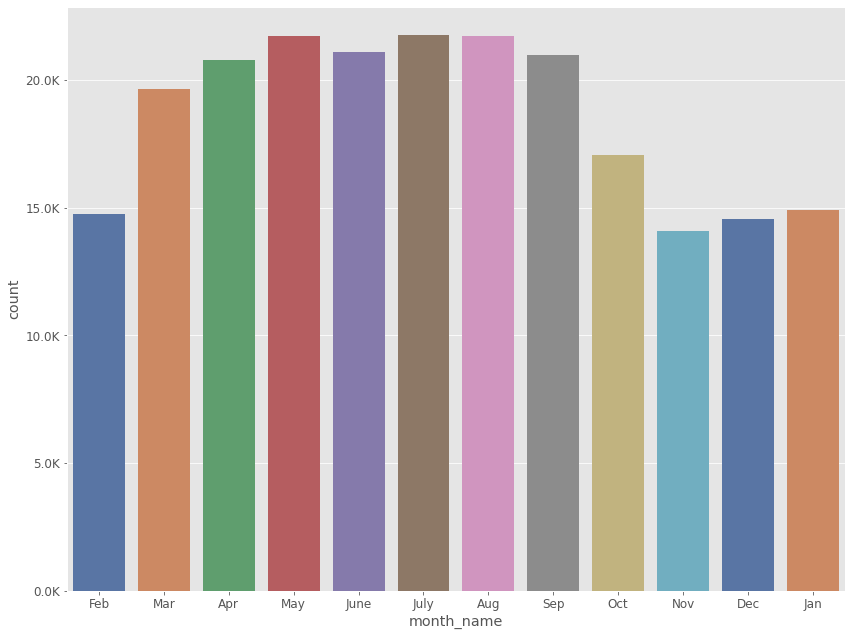

In [23]:
fig, ax = plt.subplots()

cntplot(data=df, x='month_name', palette='deep', orient='v', dodge=True, ax=ax.yaxis.set_major_formatter(formatter=format_tsd))

In [24]:
# change month name to categorical 
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month_name'] = pd.Categorical(df['month_name'], ordered_months)

df['month_name'].dtype

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=False)

# Missing Data Exploration

In [25]:
df.isna().sum()                                                              # over 50 % missing data in some columns

iso_code                                           0
continent                                      12816
location                                           0
date                                               0
total_cases                                     9148
new_cases                                       9401
new_cases_smoothed                             10597
total_deaths                                   28296
new_deaths                                     28348
new_deaths_smoothed                            29528
total_cases_per_million                        10126
new_cases_per_million                          10379
new_cases_smoothed_per_million                 11570
total_deaths_per_million                       29261
new_deaths_per_million                         29313
new_deaths_smoothed_per_million                30488
reproduction_rate                              56349
icu_patients                                  194777
icu_patients_per_million                      

<AxesSubplot:>

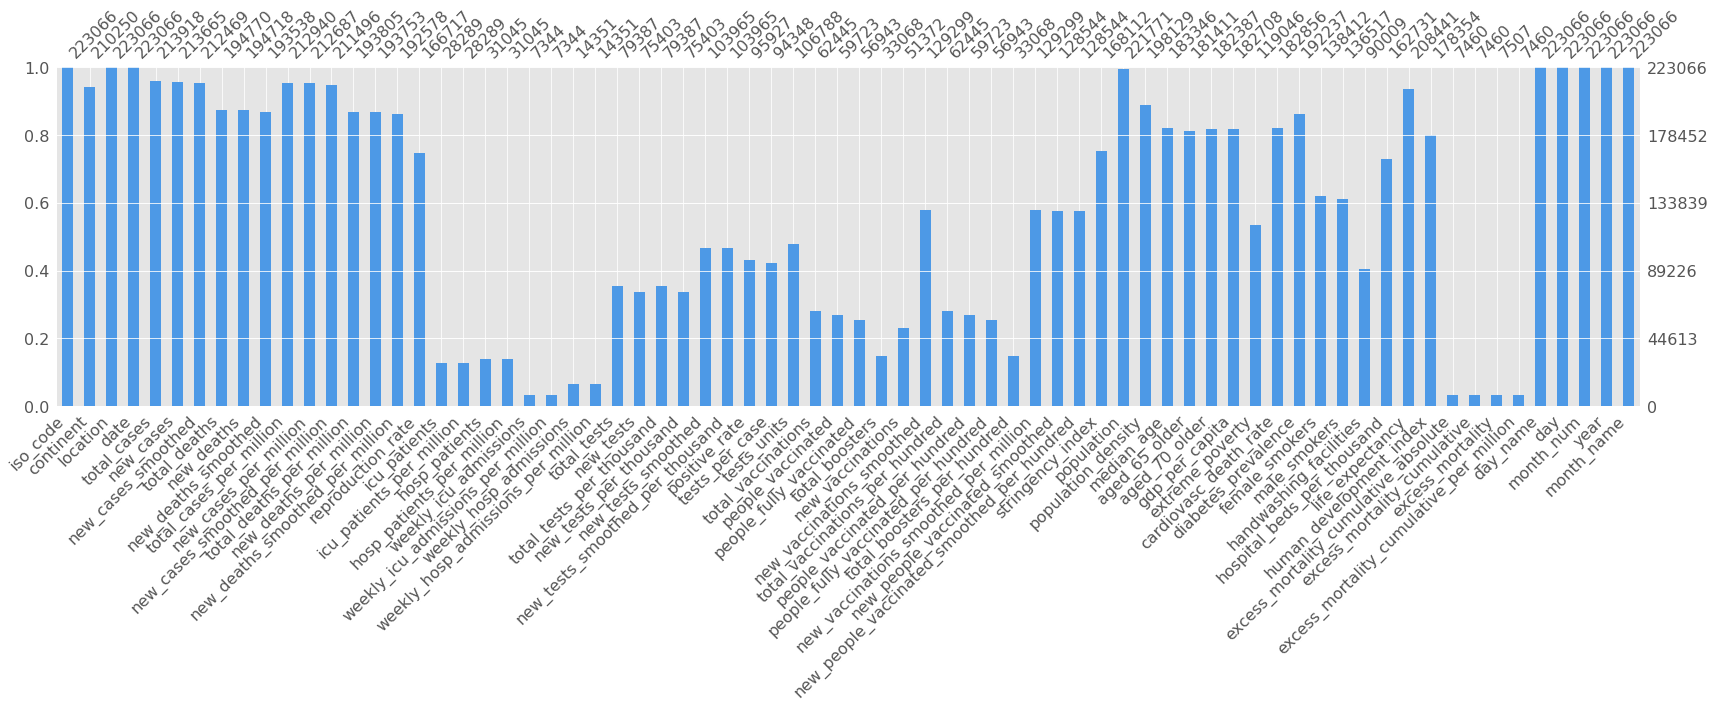

In [26]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9))                              # plot missing values for each column

<AxesSubplot:>

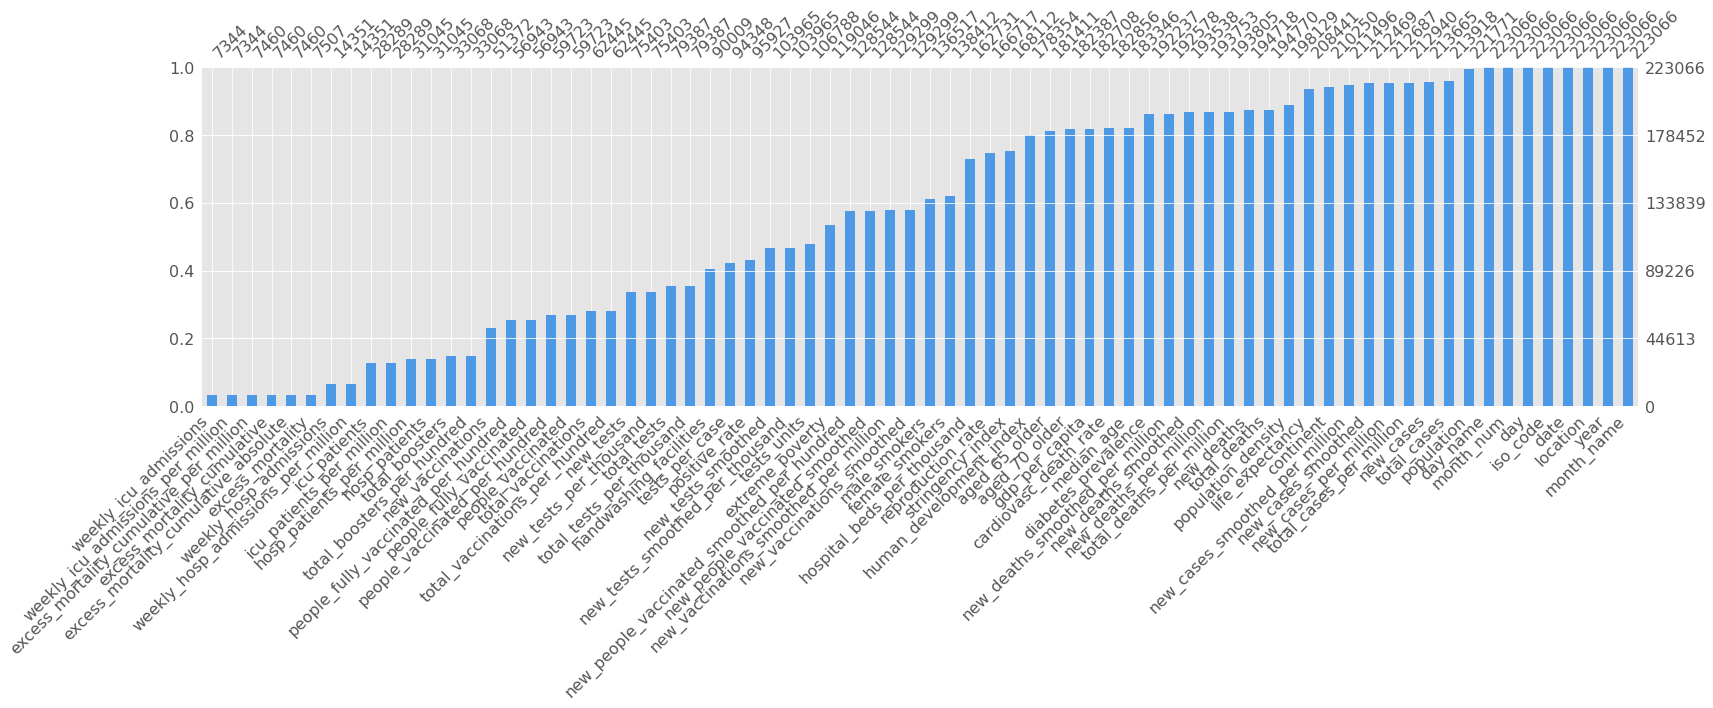

In [27]:
msno.bar(df, labels=True, color=(0.3, 0.6, 0.9), sort='ascending') 

In [28]:
# filter for missing values based on the column with the highest values missing
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
223061      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
223062      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
223063      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
223064      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   
223065      ZWE    Africa     Zimbabwe 2022-10-11     257749.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
223061              27.143        5604.0         0.0                0.286   
223062              27.143        5604.0         0.0                0.286   
223063              19.714        5604.0         0.0                0.286   
223064              30.143        5604.0         0.0                0.143   
223065              25.857        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
223061                16109.958                  0.000   
223062                16109.958                  0.000   
223063                16109.958                  0.000   
223064                16115.835                  5.877   
223065                16115.835                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
223061                           1.697                   350.392   
223062                           1.697                   350.392   
223063                           1.233                   350.392   
223064                           1.885                   350.392   
223065                           1.617                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
223061                     0.0                            0.018   
223062                     0.0                            0.018   
223063                     0.0          

Common strategies that can be used to handle missing data for this project may include:
1) ignoring the missing data
2) dropping records with missing data
3) filling the missing data

In [29]:
# droping missing data based on rows containing missing values results in an empty dataframe   
df.dropna(axis='index')

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, new_people_vaccinated_smoothed, new_people_vaccinated_smoothed_per_hundred, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index, excess_mortality_cumulative_absolute, excess_mortality_cumulative, excess_mortality, excess_mortality_cumulative_per_million, day_name, day, month_num, year, month_name]
Index: []

In [30]:
# dropping missing values based on columns also returns an a smaller dataframe as almost all columns contains a missing value
df.dropna(axis='columns')

iso_code     location       date   day_name  day  month_num  year  \
0           AFG  Afghanistan 2020-02-24     Monday   24          2  2020   
1           AFG  Afghanistan 2020-02-25    Tuesday   25          2  2020   
2           AFG  Afghanistan 2020-02-26  Wednesday   26          2  2020   
3           AFG  Afghanistan 2020-02-27   Thursday   27          2  2020   
4           AFG  Afghanistan 2020-02-28     Friday   28          2  2020   
...         ...          ...        ...        ...  ...        ...   ...   
223061      ZWE     Zimbabwe 2022-10-07     Friday    7         10  2022   
223062      ZWE     Zimbabwe 2022-10-08   Saturday    8         10  2022   
223063      ZWE     Zimbabwe 2022-10-09     Sunday    9         10  2022   
223064      ZWE     Zimbabwe 2022-10-10     Monday   10         10  2022   
223065      ZWE     Zimbabwe 2022-10-11    Tuesday   11         10  2022   

       month_name  
0             Feb  
1             Feb  
2             Feb  
3             Feb  
4             Feb  
...           ...  
223061        Oct  
223062        Oct  
223063        Oct  
223064        Oct  
223065        Oct  

[223066 rows x 8 columns]

Filling the missing data

In [31]:
# filling missing values with a constant value will not be a good decision for instance in total cases or deaths that varies for different locations
df.loc[df['weekly_icu_admissions'].isnull()]

iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
223061      ZWE    Africa     Zimbabwe 2022-10-07     257655.0        0.0   
223062      ZWE    Africa     Zimbabwe 2022-10-08     257655.0        0.0   
223063      ZWE    Africa     Zimbabwe 2022-10-09     257655.0        0.0   
223064      ZWE    Africa     Zimbabwe 2022-10-10     257749.0       94.0   
223065      ZWE    Africa     Zimbabwe 2022-10-11     257749.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
223061              27.143        5604.0         0.0                0.286   
223062              27.143        5604.0         0.0                0.286   
223063              19.714        5604.0         0.0                0.286   
223064              30.143        5604.0         0.0                0.143   
223065              25.857        5604.0         0.0                0.143   

        total_cases_per_million  new_cases_per_million  \
0                         0.125                  0.125   
1                         0.125                  0.000   
2                         0.125                  0.000   
3                         0.125                  0.000   
4                         0.125                  0.000   
...                         ...                    ...   
223061                16109.958                  0.000   
223062                16109.958                  0.000   
223063                16109.958                  0.000   
223064                16115.835                  5.877   
223065                16115.835                  0.000   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
223061                           1.697                   350.392   
223062                           1.697                   350.392   
223063                           1.233                   350.392   
223064                           1.885                   350.392   
223065                           1.617                   350.392   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          NaN                              NaN   
1                          NaN                              NaN   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                          NaN                              NaN   
...                        ...                              ...   
223061                     0.0                            0.018   
223062                     0.0                            0.018   
223063                     0.0          

Fill with Mean / Median of Group

In [32]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('mean')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08889e+05  2.08889e+05         2.08889e+05   2.05720e+05   
mean   4.27198e+06  1.21087e+04         1.21424e+04   6.85752e+04   
std    2.74670e+07  8.62846e+04         8.42676e+04   3.68150e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.46300e+03  0.00000e+00         5.42900e+00   7.90000e+01   
50%    4.01260e+04  4.60000e+01         7.98570e+01   7.92000e+02   
75%    4.20629e+05  8.13000e+02         9.33286e+02   7.37225e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205720.00000         205720.00000             207911.00000   
mean      130.89316            131.44719              55157.14498   
std       715.53963            700.74647             100614.77106   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.01174                946.59386   
50%         0.57632              1.00000               8811.49200   
75%        11.00000             11.85700              65490.32950   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207911.00000                    207911.00000   
mean               182.26204                       182.03346   
std               1053.40669                       659.39992   
min                  0.00000                         0.00000   
25%                  0.00000                         1.23800   
50%                  6.80400                        17.32400   
75%                 88.95350                       126.39250   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204742.00000            204742.00000   
mean                  633.30163                 1.39816   
std                   928.09968                 4.96166   
min                     0.00000                 0.00000   
25%                    29.19500                 0.00000   
50%                   190.85850                 0.06900   
75%                   926.61400                 1.07700   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204742.00000       174809.00000   29940.00000   
mean                           1.39004            0.93476     759.32579   
std                            3.23875            0.37578    2508.96974   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      25.00000   
50%                            0.22100            0.96000      89.00000   
75%                            1.38600            1.13000     492.25000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29940.00000    31977.00000                31977.00000   
mean                   18.29272     3962.08198                  149.08219   
std                    21.79323    10738.53339                  181.48826   
min                     0.00000        0.00000                    0.00000   
25%                     4.51400      173.00000                   39.93700   
50%                     9.47300      796.36611                   85.02100   
75%                    27.49900     2902.33734                  192.31800   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10133.00000                        10133.00000   
mean               166.23685                           11.20317   
std                291.15924                            8.66926   
min             

In [33]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('median')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08889e+05  2.08889e+05         2.08889e+05   2.05720e+05   
mean   4.27124e+06  1.21018e+04         1.21148e+04   6.86654e+04   
std    2.74667e+07  8.62848e+04         8.42267e+04   3.68289e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.57400e+03  0.00000e+00         5.14300e+00   7.70000e+01   
50%    4.01010e+04  4.50000e+01         7.91430e+01   7.94000e+02   
75%    4.18640e+05  8.06000e+02         9.17857e+02   7.36500e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205720.00000         205720.00000             207911.00000   
mean      130.41435            130.94409              55354.14006   
std       715.45782            700.59853             101153.03624   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                939.38000   
50%         0.00000              0.85700               8678.85600   
75%        10.00000             11.28600              65451.10500   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207911.00000                    207911.00000   
mean               177.57151                       176.68719   
std               1050.83422                       654.87326   
min                  0.00000                         0.00000   
25%                  0.00000                         1.14600   
50%                  6.28100                        16.56700   
75%                 85.90050                       122.28150   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204742.00000            204742.00000   
mean                  638.75088                 1.27019   
std                   931.76198                 4.95012   
min                     0.00000                 0.00000   
25%                    28.68375                 0.00000   
50%                   193.06050                 0.00000   
75%                   930.64150                 0.75300   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204742.00000       174809.00000   29940.00000   
mean                           1.27663            0.92974     733.38641   
std                            3.21844            0.37993    2467.70555   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      24.00000   
50%                            0.13900            0.96000      88.00000   
75%                            1.15700            1.13000     453.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29940.00000    31977.00000                31977.00000   
mean                   17.49456     3739.17427                  142.81267   
std                    22.00517    10448.11209                  180.77982   
min                     0.00000        0.00000                    0.00000   
25%                     3.74175      172.00000                   39.45500   
50%                     9.26700      762.50000                   76.14350   
75%                    23.43700     2815.00000                  169.72600   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            10133.00000                        10133.00000   
mean               132.45890                            7.05234   
std                258.19466                            3.60574   
min             

In [34]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13918e+05  2.13665e+05         2.12469e+05   1.94770e+05   
mean   4.34149e+06  1.24234e+04         1.24597e+04   7.33158e+04   
std    2.71747e+07  8.56651e+04         8.37317e+04   3.77403e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.18125e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76680e+04  5.60000e+01         9.58570e+01   1.15300e+03   
75%    5.14568e+05  9.69000e+02         1.13543e+03   9.68300e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194718.00000         193538.00000             212940.00000   
mean      139.90159            140.62640              58639.20844   
std       734.69503            720.27276             104421.23883   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1051.52400   
50%         1.00000              1.57100               9954.54300   
75%        14.00000             16.00000              70561.73325   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212687.00000                    211496.00000   
mean               190.04484                       190.30395   
std               1055.48494                       669.75362   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.80000                        19.61100   
75%                 98.25200                       136.29200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193805.00000            193753.00000   
mean                  683.12178                 1.41841   
std                   969.27026                 5.11950   
min                     0.00000                 0.00000   
25%                    28.96800                 0.00000   
50%                   207.73200                 0.03500   
75%                  1012.24600                 0.98700   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192578.00000       166717.00000   28289.00000   
mean                           1.41828            0.94681     829.07494   
std                            3.35319            0.38405    2468.43300   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35200            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28289.00000    31045.00000                31045.00000   
mean                   20.87582     4153.78196                  156.14775   
std                    26.17694    10769.68377                  191.26254   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      173.00000                   32.87600   
50%                    10.38200      811.00000                   87.81100   
75%                    28.95000     3173.00000                  198.65900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7344.00000                         7344.00000   
mean               421.38045                           12.98008   
std                580.37038                           15.07811   
min             

Forward Fill & Back Fill within Groups

In [35]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.06582e+05  2.06582e+05         2.05426e+05   1.87469e+05   
mean   4.31557e+06  1.22367e+04         1.22710e+04   7.42002e+04   
std    2.76158e+07  8.67566e+04         8.48659e+04   3.84520e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.75700e+03  0.00000e+00         5.57100e+00   1.03000e+02   
50%    4.17160e+04  4.70000e+01         8.20000e+01   9.84000e+02   
75%    4.23771e+05  8.24000e+02         9.36393e+02   8.48900e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  187647.00000         186527.00000             205604.00000   
mean      142.32181            143.01991              55174.78427   
std       747.88948            733.28309             100866.21728   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000                964.01200   
50%         1.00000              1.28600               8807.10250   
75%        12.00000             13.71400              65356.23200   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           205604.00000                    204453.00000   
mean               180.14715                       179.12504   
std               1058.57936                       660.22091   
min                  0.00000                         0.00000   
25%                  0.00000                         1.22900   
50%                  6.61250                        16.98900   
75%                 87.60500                       123.46800   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              186504.00000            186682.00000   
mean                  652.73749                 1.38638   
std                   956.30690                 5.32704   
min                     0.00000                 0.00000   
25%                    27.58900                 0.00000   
50%                   186.96000                 0.02200   
75%                   951.98100                 0.89800   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     185567.00000       161339.00000   26625.00000   
mean                           1.37857            0.93875     690.16627   
std                            3.36370            0.38887    2494.95927   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.74000      20.00000   
50%                            0.18400            0.96000      83.00000   
75%                            1.27300            1.15000     361.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               26625.00000    28761.00000                28761.00000   
mean                   17.22924     3660.06818                  148.58355   
std                    23.07373    10765.52321                  190.72895   
min                     0.00000        0.00000                    0.00000   
25%                     2.77100      136.00000                   30.35100   
50%                     7.59400      675.00000                   83.02400   
75%                    21.89800     2467.00000                  177.55300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             6766.00000                         6766.00000   
mean                52.98980                           12.19944   
std                114.65834                           20.46103   
min             

In [36]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.08889e+05  2.08793e+05         2.08793e+05   2.05720e+05   
mean   4.26791e+06  1.21037e+04         1.20725e+04   6.76175e+04   
std    2.74665e+07  8.63050e+04         8.41930e+04   3.67673e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.29000e+03  0.00000e+00         4.71400e+00   4.40000e+01   
50%    3.92370e+04  4.40000e+01         7.54290e+01   6.71000e+02   
75%    4.14041e+05  7.99000e+02         8.98571e+02   6.87500e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  205681.00000         205681.00000             207911.00000   
mean      129.97003            129.73212              54563.39020   
std       715.50437            699.53005             100470.97046   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                908.53550   
50%         1.00000              0.85700               8264.46900   
75%        10.00000             10.71400              64350.17450   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           207815.00000                    207815.00000   
mean               178.34919                       176.25445   
std               1051.06746                       655.15053   
min                  0.00000                         0.00000   
25%                  0.00000                         1.13600   
50%                  6.57800                        16.26100   
75%                 88.06200                       119.66050   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              204742.00000            204703.00000   
mean                  596.25978                 2.92772   
std                   930.48248                13.00151   
min                     0.00000                 0.00000   
25%                    17.51100                 0.00000   
50%                   138.07000                 0.06300   
75%                   844.90000                 1.24800   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     204703.00000       172951.00000   29171.00000   
mean                           1.58500            0.97877     710.80364   
std                            3.84494            0.44488    2479.40639   
min                            0.00000           -0.08000       0.00000   
25%                            0.00400            0.75000      21.00000   
50%                            0.20000            0.97000      88.00000   
75%                            1.42900            1.18000     362.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               29171.00000    30747.00000                30747.00000   
mean                   17.34433     3712.55388                  138.96052   
std                    22.71414    10672.31629                  186.62936   
min                     0.00000        0.00000                    0.00000   
25%                     2.73600      154.00000                   28.94800   
50%                     8.09500      727.00000                   71.10500   
75%                    22.89600     2400.00000                  165.18900   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             9686.00000                         9686.00000   
mean               136.08177                           11.17240   
std                324.26407                           17.78671   
min             

In [37]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13918e+05  2.13665e+05         2.12469e+05   1.94770e+05   
mean   4.34149e+06  1.24234e+04         1.24597e+04   7.33158e+04   
std    2.71747e+07  8.56651e+04         8.37317e+04   3.77403e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.18125e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76680e+04  5.60000e+01         9.58570e+01   1.15300e+03   
75%    5.14568e+05  9.69000e+02         1.13543e+03   9.68300e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194718.00000         193538.00000             212940.00000   
mean      139.90159            140.62640              58639.20844   
std       734.69503            720.27276             104421.23883   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1051.52400   
50%         1.00000              1.57100               9954.54300   
75%        14.00000             16.00000              70561.73325   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212687.00000                    211496.00000   
mean               190.04484                       190.30395   
std               1055.48494                       669.75362   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.80000                        19.61100   
75%                 98.25200                       136.29200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193805.00000            193753.00000   
mean                  683.12178                 1.41841   
std                   969.27026                 5.11950   
min                     0.00000                 0.00000   
25%                    28.96800                 0.00000   
50%                   207.73200                 0.03500   
75%                  1012.24600                 0.98700   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192578.00000       166717.00000   28289.00000   
mean                           1.41828            0.94681     829.07494   
std                            3.35319            0.38405    2468.43300   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35200            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28289.00000    31045.00000                31045.00000   
mean                   20.87582     4153.78196                  156.14775   
std                    26.17694    10769.68377                  191.26254   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      173.00000                   32.87600   
50%                    10.38200      811.00000                   87.81100   
75%                    28.95000     3173.00000                  198.65900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7344.00000                         7344.00000   
mean               421.38045                           12.98008   
std                580.37038                           15.07811   
min             

Combining FFill and BFill

In [38]:
df.loc[df['weekly_icu_admissions'].isnull()].fillna(df.groupby(['location']).transform('ffill').transform('backfill')).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.15722e+05  2.15722e+05         2.15722e+05   2.15722e+05   
mean   4.13273e+06  1.17183e+04         1.16867e+04   6.44825e+04   
std    2.70384e+07  8.49346e+04         8.28570e+04   3.59330e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    2.31725e+03  0.00000e+00         3.57100e+00   2.70000e+01   
50%    3.45095e+04  3.60000e+01         6.70000e+01   5.08000e+02   
75%    3.82147e+05  7.33000e+02         8.34571e+02   6.13200e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  215722.00000         215722.00000             215722.00000   
mean      123.96505            123.75061              52587.97421   
std       699.13942            683.59749              99160.37077   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.14300                676.63775   
50%         1.00000              0.71400               6798.52700   
75%         8.00000              9.42900              61306.15425   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215722.00000                    215722.00000   
mean               172.74742                       169.98511   
std               1034.07697                       643.92901   
min                  0.00000                         0.00000   
25%                  0.00000                         0.79500   
50%                  5.40800                        13.85650   
75%                 83.05000                       111.79775   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              215722.00000            215722.00000   
mean                  566.08839                 2.95923   
std                   915.80935                12.83413   
min                     0.00000                 0.00000   
25%                    12.82000                 0.00000   
50%                   110.50100                 0.06800   
75%                   766.19850                 1.18800   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     215722.00000       215722.00000  203933.00000   
mean                           1.55227            1.07977     286.50992   
std                            3.78571            0.65108    1066.68466   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.79000       0.00000   
50%                            0.17900            1.00000      10.00000   
75%                            1.37800            1.25000     111.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count              203933.00000   203933.00000               203933.00000   
mean                    7.98969     1376.60064                   44.56103   
std                    13.98882     4675.08711                   89.66407   
min                     0.00000        0.00000                    0.00000   
25%                     0.00000        1.00000                    0.05700   
50%                     0.97200      156.00000                   15.73200   
75%                     9.18900      636.00000                   63.30300   
max                   176.00600   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count           181786.00000                       181786.00000   
mean               215.68860                           10.17024   
std                581.90603                           11.85763   
min             

In [39]:
df.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.13918e+05  2.13665e+05         2.12469e+05   1.94770e+05   
mean   4.34149e+06  1.24234e+04         1.24597e+04   7.33158e+04   
std    2.71747e+07  8.56651e+04         8.37317e+04   3.77403e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    4.18125e+03  0.00000e+00         6.14300e+00   1.12000e+02   
50%    4.76680e+04  5.60000e+01         9.58570e+01   1.15300e+03   
75%    5.14568e+05  9.69000e+02         1.13543e+03   9.68300e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  194718.00000         193538.00000             212940.00000   
mean      139.90159            140.62640              58639.20844   
std       734.69503            720.27276             104421.23883   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.00000               1051.52400   
50%         1.00000              1.57100               9954.54300   
75%        14.00000             16.00000              70561.73325   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           212687.00000                    211496.00000   
mean               190.04484                       190.30395   
std               1055.48494                       669.75362   
min                  0.00000                         0.00000   
25%                  0.00000                         1.36900   
50%                  7.80000                        19.61100   
75%                 98.25200                       136.29200   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              193805.00000            193753.00000   
mean                  683.12178                 1.41841   
std                   969.27026                 5.11950   
min                     0.00000                 0.00000   
25%                    28.96800                 0.00000   
50%                   207.73200                 0.03500   
75%                  1012.24600                 0.98700   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     192578.00000       166717.00000   28289.00000   
mean                           1.41828            0.94681     829.07494   
std                            3.35319            0.38405    2468.43300   
min                            0.00000           -0.08000       0.00000   
25%                            0.00000            0.75000      31.00000   
50%                            0.21000            0.97000     151.00000   
75%                            1.35200            1.15000     568.00000   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               28289.00000    31045.00000                31045.00000   
mean                   20.87582     4153.78196                  156.14775   
std                    26.17694    10769.68377                  191.26254   
min                     0.00000        0.00000                    0.00000   
25%                     3.77200      173.00000                   32.87600   
50%                    10.38200      811.00000                   87.81100   
75%                    28.95000     3173.00000                  198.65900   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count             7344.00000                         7344.00000   
mean               421.38045                           12.98008   
std                580.37038                           15.07811   
min             

In [40]:
# the best approach to fill missing values for this project is to group based on each location, and fill values with the means of each column
df_filled = df.fillna(df.groupby(['location']).transform('mean'))
df_filled.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0           209.85803    4556.62058     8.36763              8.40963   
1           209.85803    4556.62058     8.36763              8.40963   
2           209.85803    4556.62058     8.36763              8.40963   
3           209.85803    4556.62058     8.36763              8.40963   
4           209.85803    4556.62058     8.36763              8.40963   

   total_cases_per_million  new_cases_per_million  \
0                    0.125                  0.125   
1                    0.125                  0.000   
2                    0.125                  0.000   
3                    0.125                  0.000   
4                    0.125                  0.000   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                         5.23345                 113.63298   
1                         5.23345                 113.63298   
2                         5.23345                 113.63298   
3                         5.23345                 113.63298   
4                         5.23345                 113.63298   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                 0.20873                          0.20977            1.06365   
1                 0.20873                          0.20977            1.06365   
2                 0.20873                          0.20977            1.06365   
3                 0.20873                          0.20977            1.06365   
4                 0.20873                          0.20977            1.06365   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN     924645.2        NaN   
1                                 NaN     924645.2        NaN   
2                                 NaN     924645.2        NaN   
3                                 NaN     924645.2        NaN   
4                                 NaN     924645.2        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousa

<AxesSubplot:>

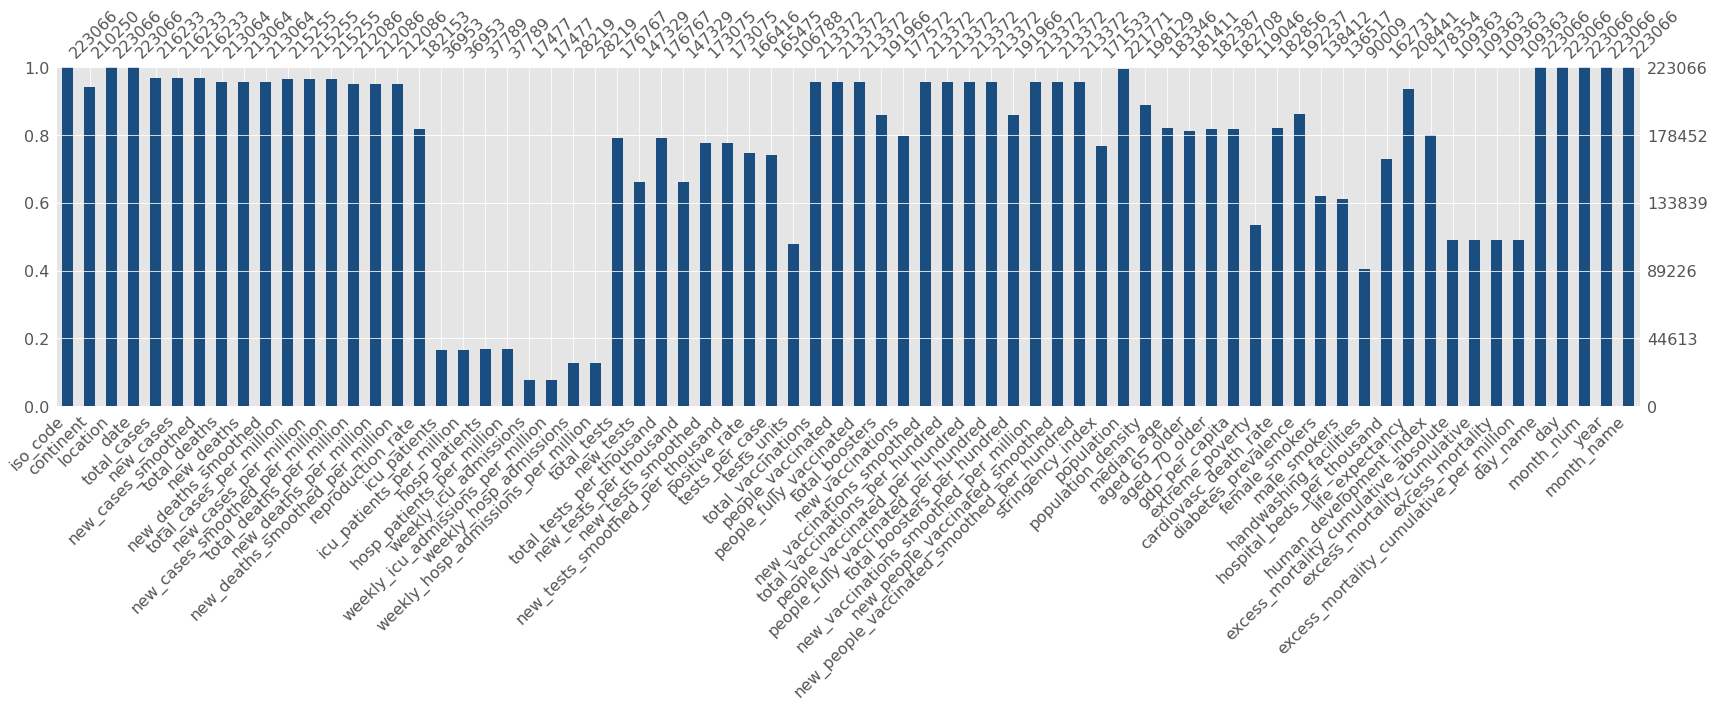

In [41]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5))

<AxesSubplot:>

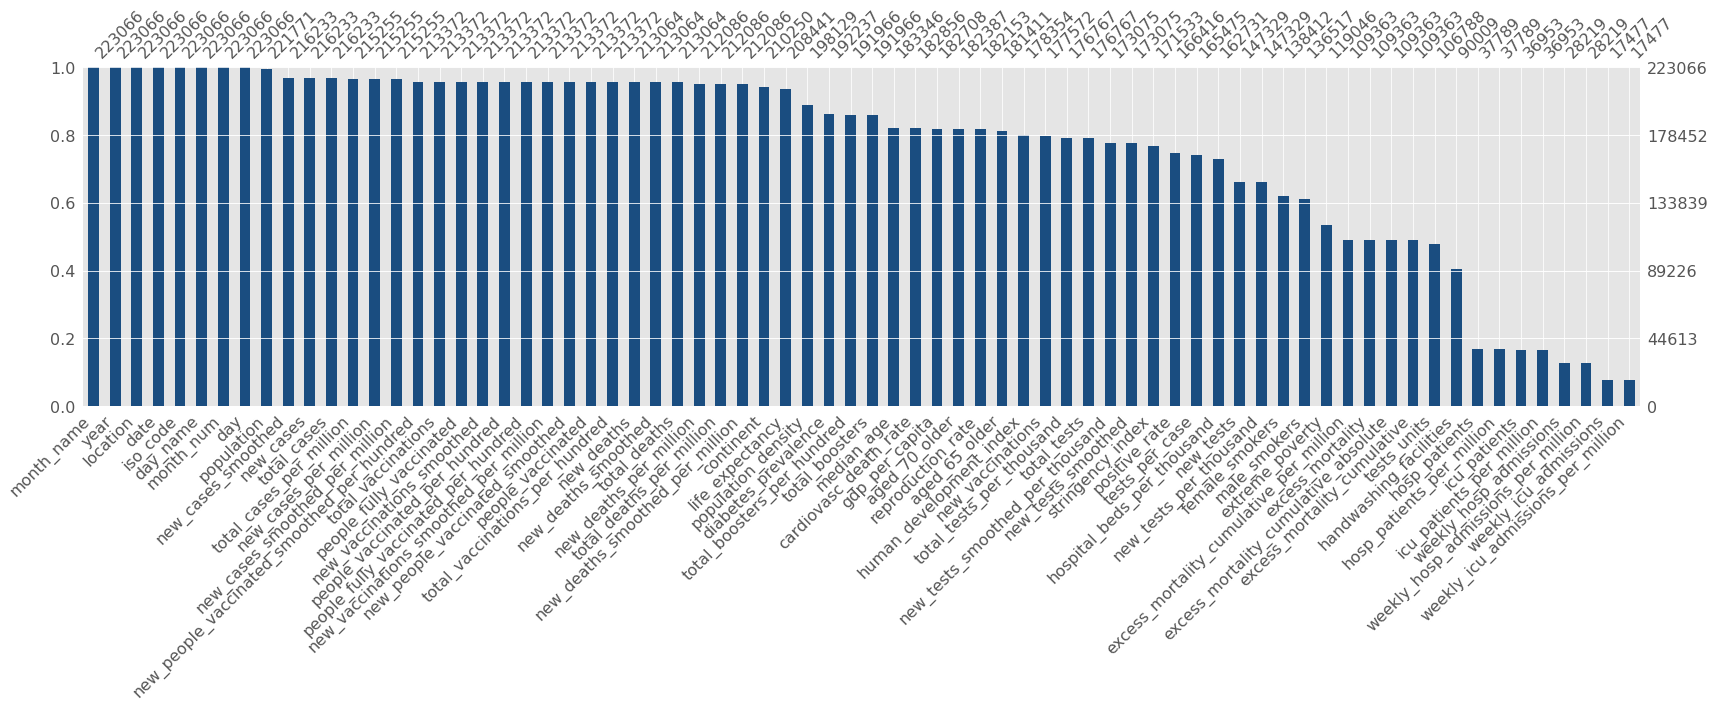

In [42]:
msno.bar(df_filled, labels=True, color=(0.1, 0.3, 0.5), sort='descending')

In [43]:
df_filled.drop(columns=['day', 'month_num', 'year']).describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  2.16233e+05  2.16233e+05         2.16233e+05   2.13064e+05   
mean   4.29897e+06  1.22907e+04         1.23218e+04   6.79481e+04   
std    2.70330e+07  8.51650e+04         8.31075e+04   3.61891e+05   
min    1.00000e+00  0.00000e+00         0.00000e+00   1.00000e+00   
25%    3.89300e+03  0.00000e+00         6.14300e+00   8.60000e+01   
50%    4.61440e+04  5.40000e+01         9.34290e+01   8.67000e+02   
75%    5.06515e+05  9.60000e+02         1.12843e+03   8.53000e+03   
max    6.22512e+08  4.08174e+06         3.43627e+06   6.56034e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  213064.00000         213064.00000             215255.00000   
mean      128.95514            129.50795              58587.63963   
std       703.58329            688.94055             104149.32420   
min         0.00000              0.00000                  0.00100   
25%         0.00000              0.03199               1017.74300   
50%         1.00000              1.28600               9961.51200   
75%        12.00000             13.85700              70542.08850   
max     17737.00000          14858.28600             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  \
count           215255.00000                    215255.00000   
mean               192.59170                       192.99465   
std               1051.79714                       668.46870   
min                  0.00000                         0.00000   
25%                  0.00000                         1.38100   
50%                  8.05600                        19.98800   
75%                100.35650                       139.89550   
max             195005.31300                     36401.60700   

       total_deaths_per_million  new_deaths_per_million  \
count              212086.00000            212086.00000   
mean                  661.89181                 1.43140   
std                   941.89929                 4.91871   
min                     0.00000                 0.00000   
25%                    31.55825                 0.00000   
50%                   212.62750                 0.08651   
75%                   976.69620                 1.16400   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  reproduction_rate  icu_patients  \
count                     212086.00000       182153.00000   36953.00000   
mean                           1.42711            0.93958     787.71447   
std                            3.23654            0.37349    2313.19715   
min                            0.00000           -0.08000       0.00000   
25%                            0.00600            0.76000      30.00000   
50%                            0.24300            0.96000     140.86511   
75%                            1.47400            1.13000     651.43956   
max                          148.67300            5.72000   28891.00000   

       icu_patients_per_million  hosp_patients  hosp_patients_per_million  \
count               36953.00000    37789.00000                37789.00000   
mean                   20.22349     4251.92274                  151.05247   
std                    24.08208    10389.87905                  177.91193   
min                     0.00000        0.00000                    0.00000   
25%                     4.79298      207.00000                   41.20500   
50%                    11.28900      926.00000                   85.44100   
75%                    30.36655     3511.00000                  198.64000   
max                   180.38700   154513.00000                 1546.50100   

       weekly_icu_admissions  weekly_icu_admissions_per_million  \
count            17477.00000                        17477.00000   
mean               273.45059                           11.94985   
std                454.46435                           11.82663   
min             

# Compute Pairwise Correlation

In [44]:
cor_mat = df_filled.drop(columns=['day', 'month_num', 'year']).corr()
cor_mat 

total_cases  new_cases  \
total_cases                                     1.00000    0.69921   
new_cases                                       0.69921    1.00000   
new_cases_smoothed                              0.72218    0.97231   
total_deaths                                    0.93608    0.71943   
new_deaths                                      0.46579    0.64528   
new_deaths_smoothed                             0.48067    0.63163   
total_cases_per_million                         0.09733    0.05609   
new_cases_per_million                           0.01370    0.06138   
new_cases_smoothed_per_million                  0.02214    0.07982   
total_deaths_per_million                        0.12048    0.07789   
new_deaths_per_million                         -0.00105    0.02987   
new_deaths_smoothed_per_million                -0.00064    0.03674   
reproduction_rate                               0.01288    0.03213   
icu_patients                                    0.42874    0.53321   
icu_patients_per_million                        0.01953    0.13583   
hosp_patients                                   0.52097    0.63127   
hosp_patients_per_million                       0.00394    0.10500   
weekly_icu_admissions                           0.28566    0.38209   
weekly_icu_admissions_per_million              -0.06452    0.08444   
weekly_hosp_admissions                          0.53824    0.63427   
weekly_hosp_admissions_per_million              0.07952    0.27947   
total_tests                                     0.17255    0.09730   
new_tests                                       0.56340    0.52157   
total_tests_per_thousand                        0.04853    0.04378   
new_tests_per_thousand                         -0.01077    0.03354   
new_tests_smoothed                              0.07696    0.07257   
new_tests_smoothed_per_thousand                 0.00909    0.05508   
positive_rate                                   0.03967    0.14596   
tests_per_case                                 -0.01411   -0.01071   
total_vaccinations                              0.73074    0.54552   
people_vaccinated                               0.70915    0.54209   
people_fully_vaccinated                         0.71170    0.53750   
total_boosters                                  0.70646    0.46592   
new_vaccinations                                0.44667    0.48442   
new_vaccinations_smoothed                       0.45952    0.48920   
total_vaccinations_per_hundred                  0.15670    0.10911   
people_vaccinated_per_hundred                   0.13852    0.09352   
people_fully_vaccinated_per_hundred             0.13329    0.09154   
total_boosters_per_hundred                      0.04595    0.01844   
new_vaccinations_smoothed_per_million          -0.01558    0.01174   
new_people_vaccinated_smoothed                  0.37033    0.38789   
new_people_vaccinated_smoothed_per_hundred     -0.03484   -0.02234   
stringency_index                               -0.08534    0.01326   
population                                      0.61246    0.54387   
population_density                             -0.01628   -0.01475   
median_age                                      0.03848    0.04446   
aged_65_older                                   0.03815    0.04571   
aged_70_older                                   0.03644    0.04516   
gdp_per_capita                                  0.01654    0.02054   
extreme_poverty                                -0.03627   -0.03520   
cardiovasc_death_rate                          -0.04154   -0.04535   
diabetes_prevalence                             0.00154   -0.00186   
female_smokers                                  0.00080    0.00531   
male_smokers                                   -0.00328    0.00092   
handwashing_facilities                          0.03224    0.03028   
hospital_beds_per_thousand                      0.00304    0.01660   
life_expectancy                                 0.0197

In [45]:
cor_mat['total_deaths'].sort_values(ascending=False)

total_deaths                                  1.00000
total_cases                                   0.93608
excess_mortality_cumulative_absolute          0.76495
total_vaccinations                            0.74762
people_vaccinated                             0.74308
new_cases_smoothed                            0.73947
people_fully_vaccinated                       0.72935
new_cases                                     0.71943
population                                    0.70822
weekly_hosp_admissions                        0.67031
new_deaths_smoothed                           0.64765
total_boosters                                0.64541
hosp_patients                                 0.63078
new_deaths                                    0.62850
new_vaccinations_smoothed                     0.60851
new_vaccinations                              0.59492
icu_patients                                  0.58813
new_tests                                     0.55576
new_people_vaccinated_smooth

<AxesSubplot:>

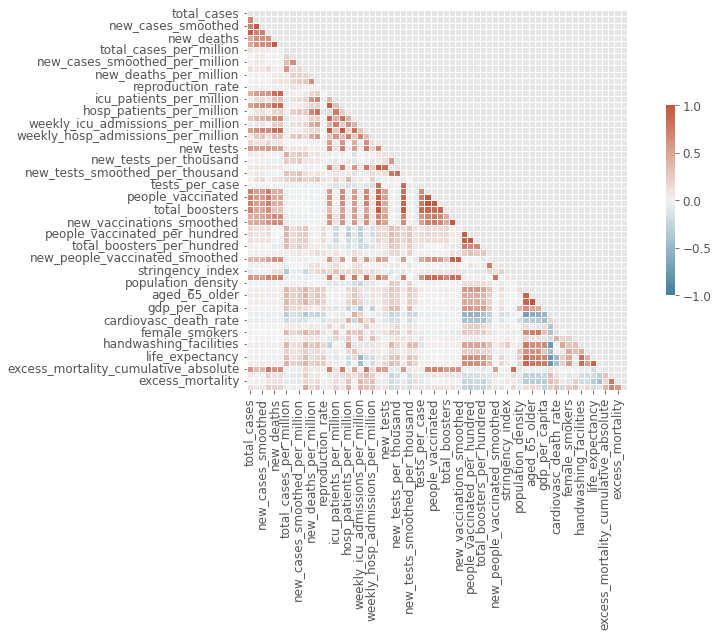

In [46]:
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Check Duplication

In [47]:
df_filled.duplicated().sum()

0

# Exploratory Data Analysis

Create helper functions to visualize datasets

In [48]:
# barplot helper function
def plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot bar chart 
    sns.barplot(
        data=data,
        x=x, y=y, 
        hue=hue, ci=ci, color=color, 
        hue_order=hue_order, order=order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_bar


# line chart helper function
def plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create a figure and axis 
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        hue=hue, size=size, markers=markers, style=style, ci=ci,
        hue_order=hue_order, palette=palette,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line


# helper function to get specific date range
def get_data(data, before=None, after=None, rule=None):
    return data.set_index('date').sort_index(ascending=True, axis='index').truncate(before, after).resample(rule)

# helper function to plot line chart
def plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, 
        hue=hue, hue_order=hue_order, palette=palette,
        ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_date_rng

# Cases Exploration

In [49]:
cases_cols = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million',\
              'new_cases_per_million', 'new_cases_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_cases = df_filled[cases_cols] 
df_cases.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_cases_per_million  new_cases_per_million  \
0           209.85803                    0.125                  0.125   
1           209.85803                    0.125                  0.000   
2           209.85803                    0.125                  0.000   
3           209.85803                    0.125                  0.000   
4           209.85803                    0.125                  0.000   

   new_cases_smoothed_per_million  year  month_num month_name  day   day_name  
0                         5.23345  2020          2        Feb   24     Monday  
1                         5.23345  2020          2        Feb   25    Tuesday  
2                         5.23345  2020          2        Feb   26  Wednesday  
3                         5.23345  2020          2        Feb   27   Thursday  
4                         5.23345  2020          2        Feb   28     Friday

In [50]:
df_cases.drop(columns=['year', 'month_num', 'day', 'day_name']).describe()

total_cases    new_cases  new_cases_smoothed  total_cases_per_million  \
count  2.16233e+05  2.16233e+05         2.16233e+05             215255.00000   
mean   4.29897e+06  1.22907e+04         1.23218e+04              58587.63963   
std    2.70330e+07  8.51650e+04         8.31075e+04             104149.32420   
min    1.00000e+00  0.00000e+00         0.00000e+00                  0.00100   
25%    3.89300e+03  0.00000e+00         6.14300e+00               1017.74300   
50%    4.61440e+04  5.40000e+01         9.34290e+01               9961.51200   
75%    5.06515e+05  9.60000e+02         1.12843e+03              70542.08850   
max    6.22512e+08  4.08174e+06         3.43627e+06             659350.87600   

       new_cases_per_million  new_cases_smoothed_per_million  
count           215255.00000                    215255.00000  
mean               192.59170                       192.99465  
std               1051.79714                       668.46870  
min                  0.00000                         0.00000  
25%                  0.00000                         1.38100  
50%                  8.05600                        19.98800  
75%                100.35650                       139.89550  
max             195005.31300                     36401.60700

In [51]:
df_cases.isna().sum()                                   # check missing values

iso_code                              0
continent                         12816
location                              0
date                                  0
total_cases                        6833
new_cases                          6833
new_cases_smoothed                 6833
total_cases_per_million            7811
new_cases_per_million              7811
new_cases_smoothed_per_million     7811
year                                  0
month_num                             0
month_name                            0
day                                   0
day_name                              0
dtype: int64

<AxesSubplot:>

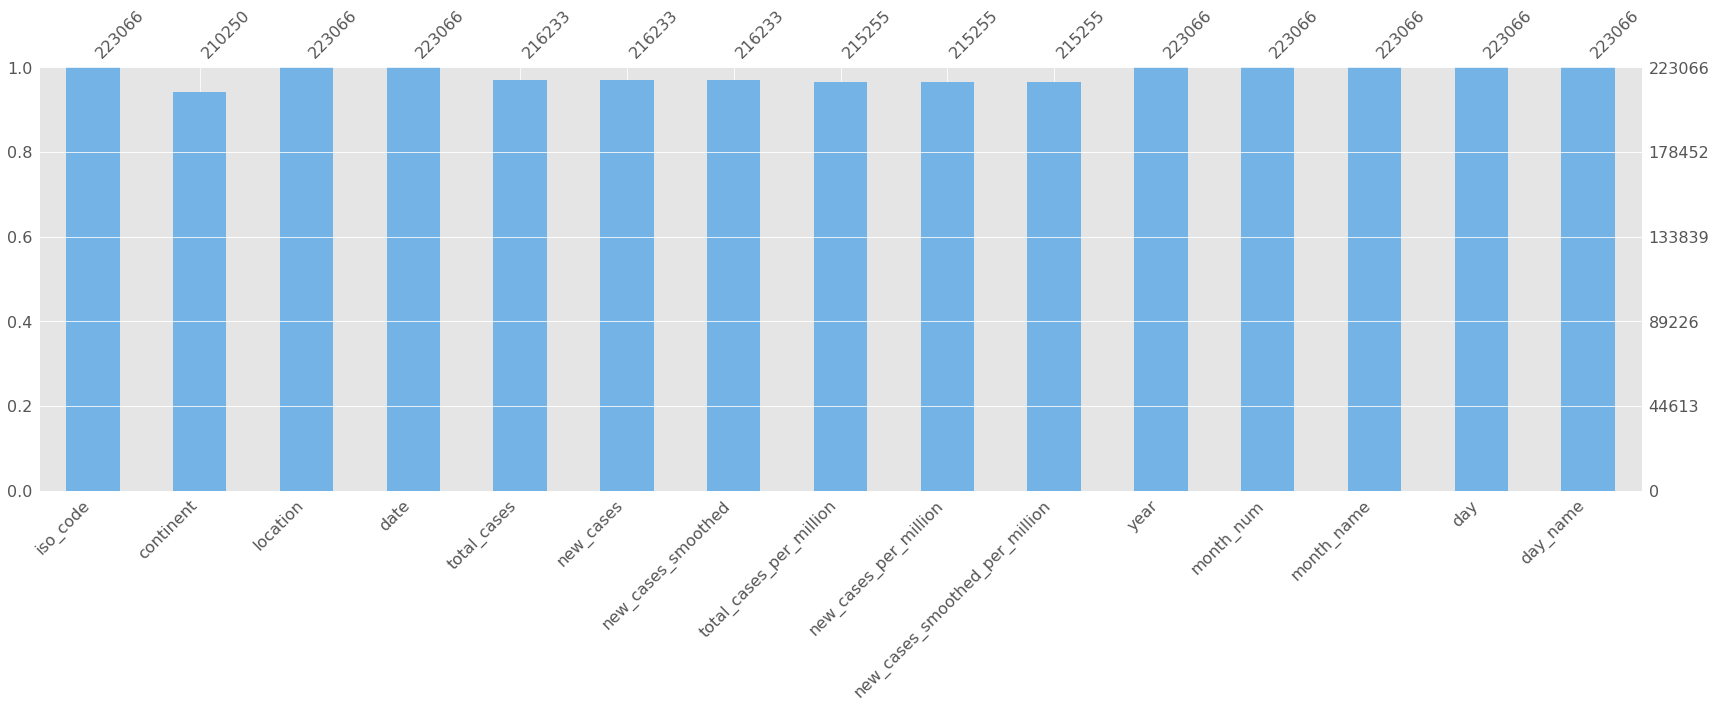

In [52]:
msno.bar(df_cases, labels=True, color=(0.45, 0.70, 0.90))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

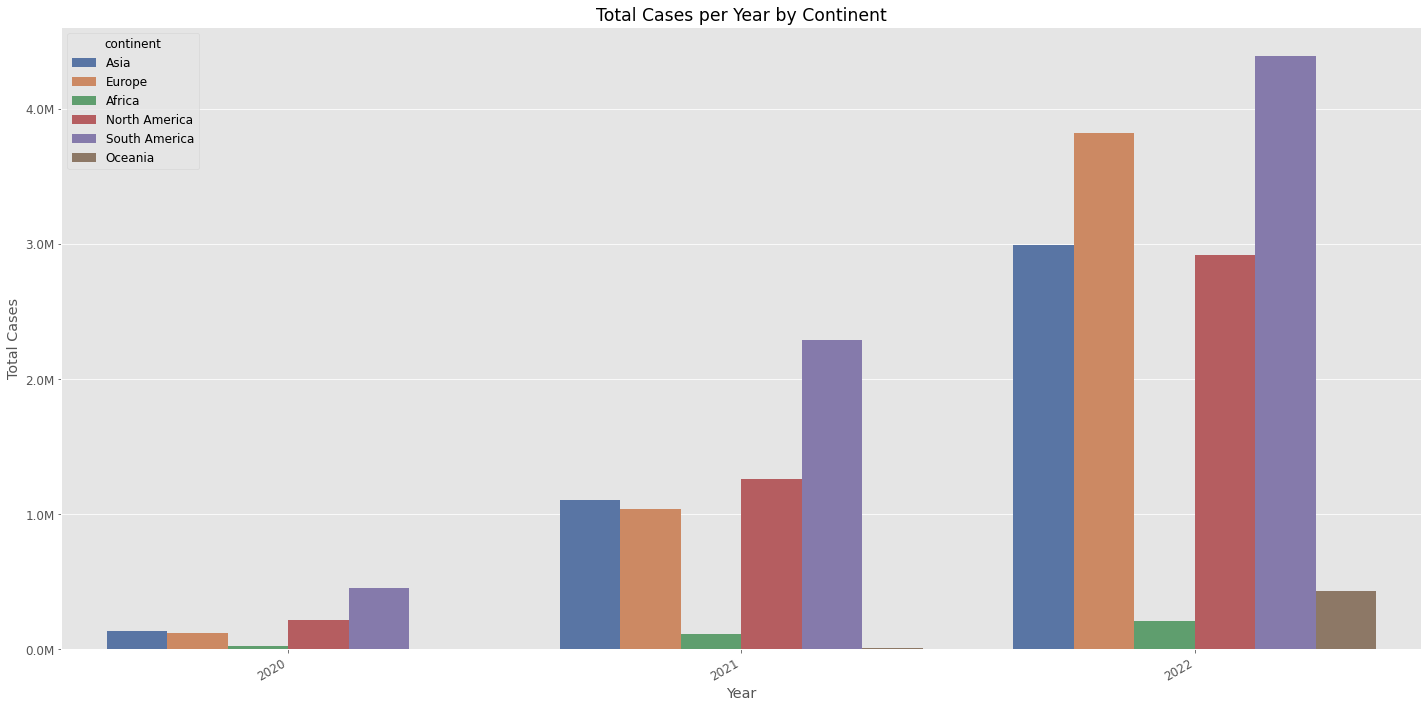

In [53]:
plot_bar(
    data=df_cases,
    x='year', y='total_cases', hue='continent', palette='deep',
    title='Total Cases per Year by Continent', xlabel='Year', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

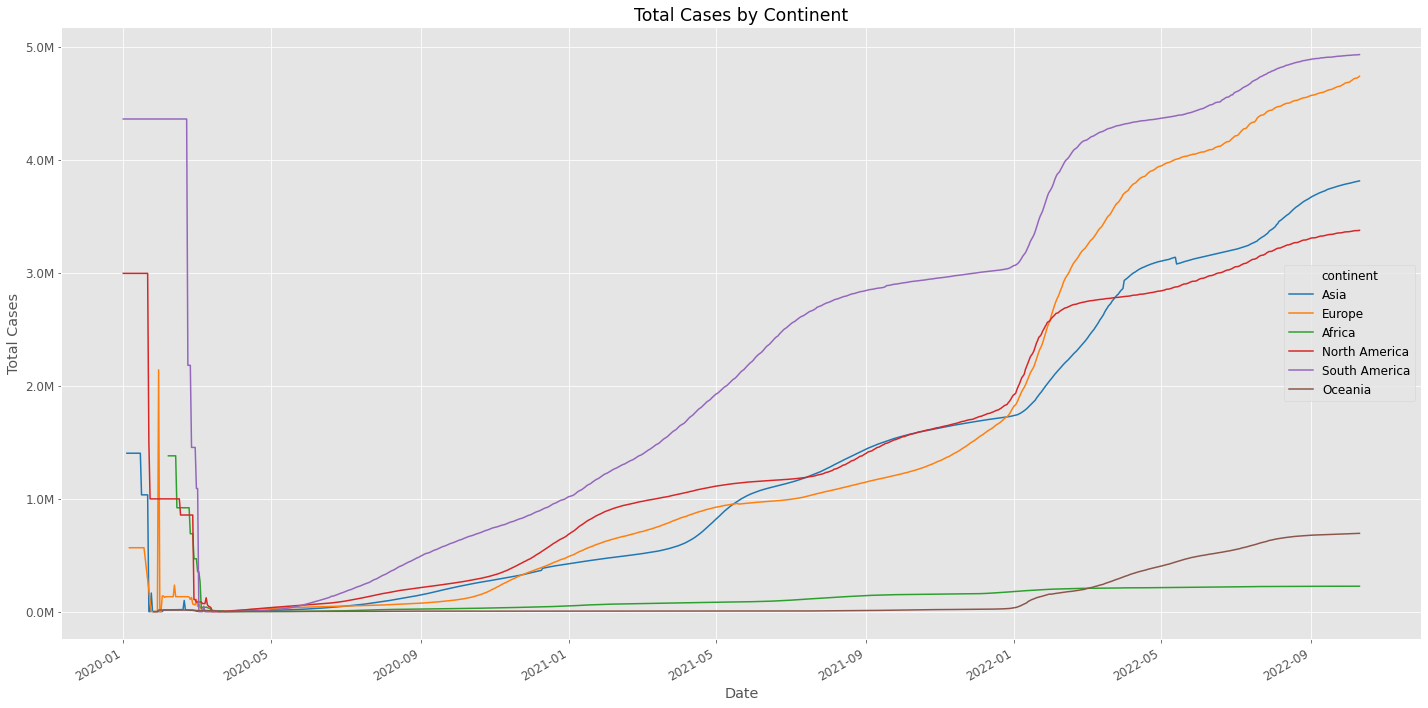

In [54]:
plot_line(
    data=df_cases,
    x='date', y='total_cases', hue='continent', palette='tab10', 
    title='Total Cases by Continent', xlabel='Date', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

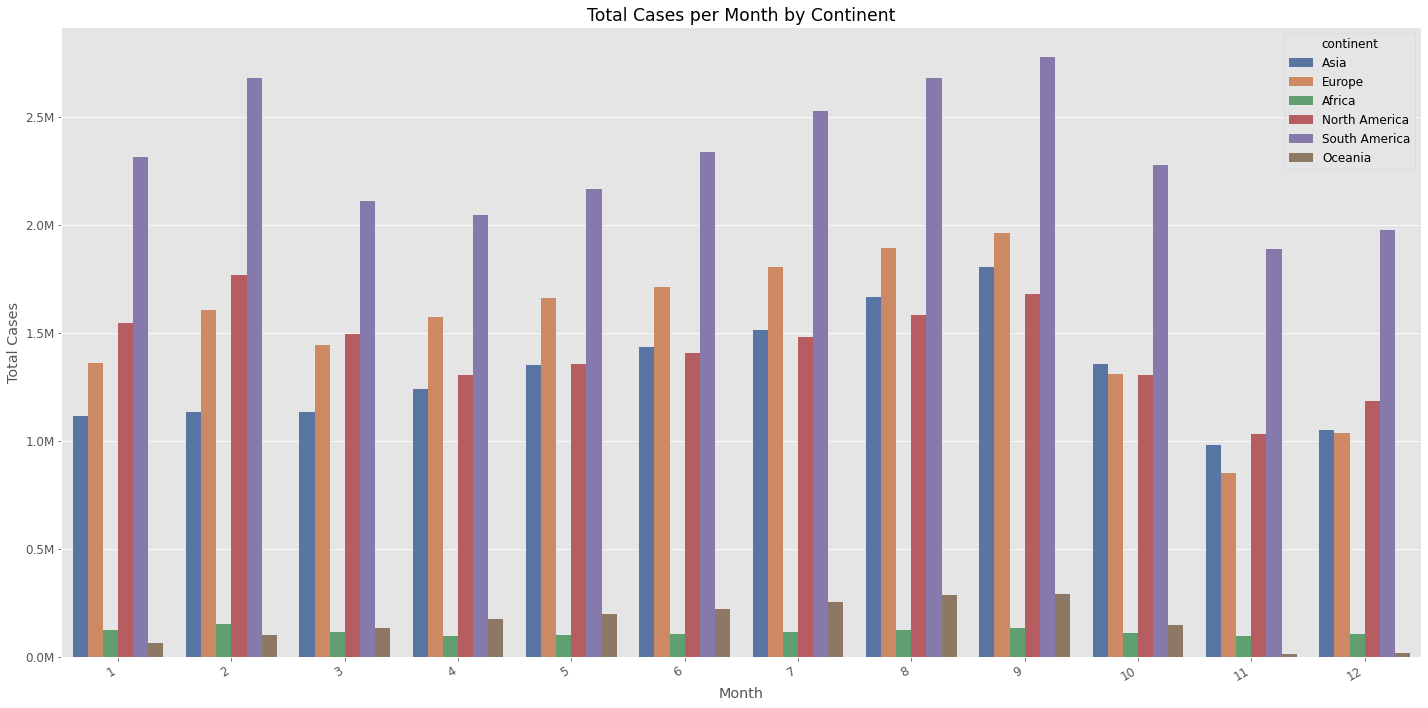

In [55]:
plot_bar(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='deep', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

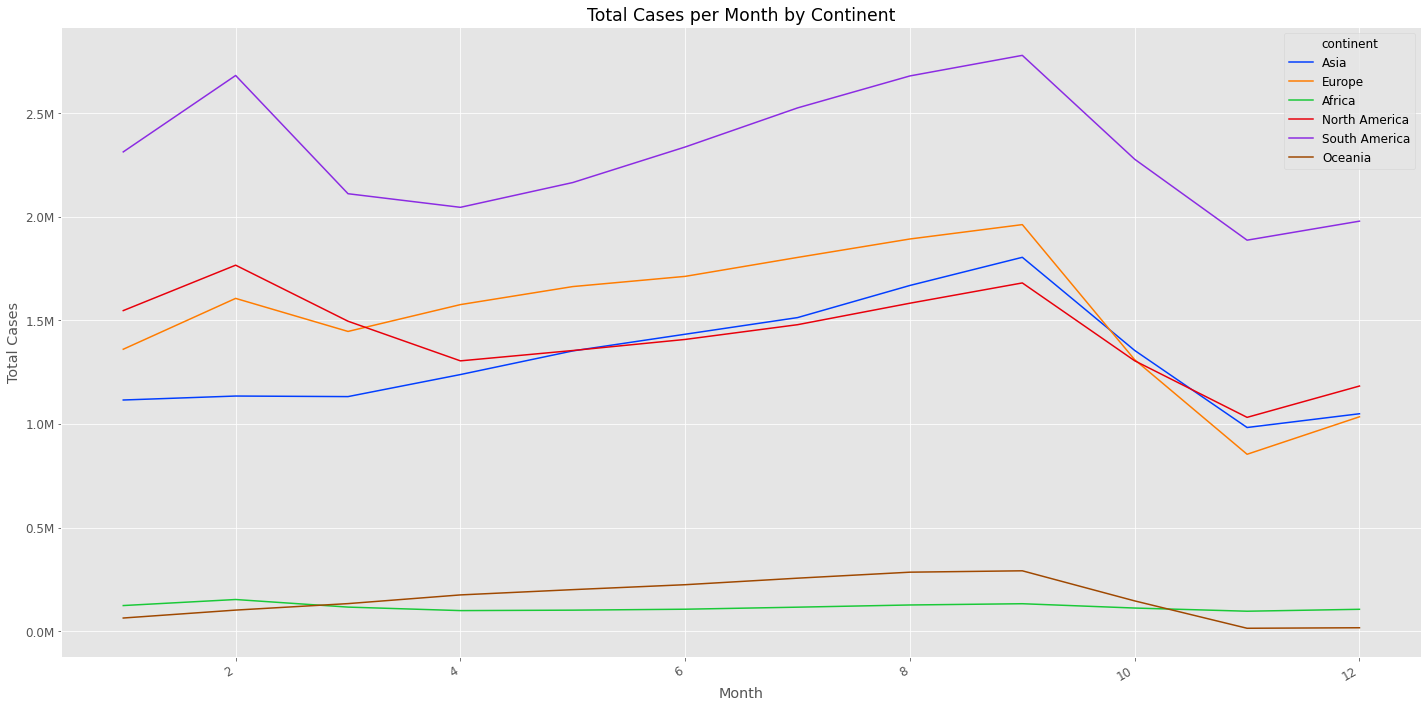

In [56]:
plot_line(
    data=df_cases,
    x='month_num', y='total_cases', hue='continent', palette='bright', 
    title='Total Cases per Month by Continent', xlabel='Month', ylabel='Total Cases',
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

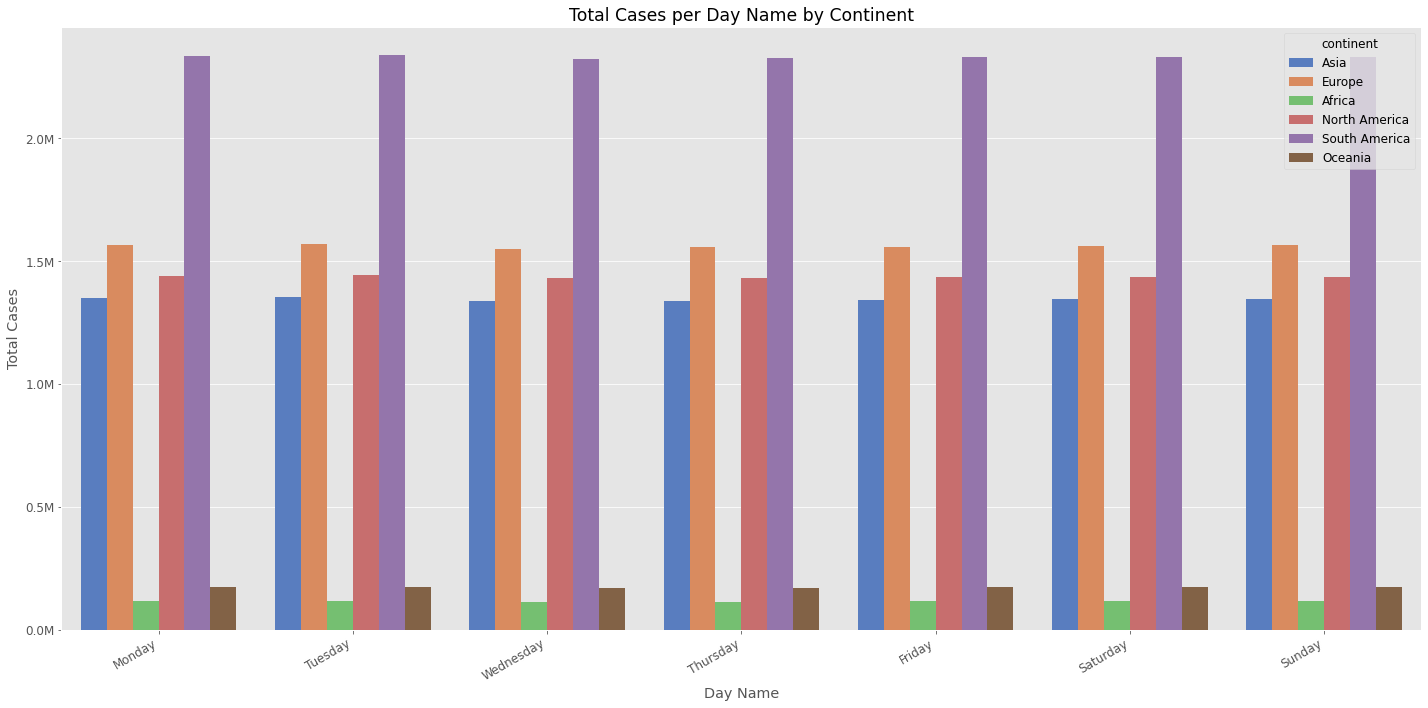

In [57]:
plot_bar(
    data=df_cases,
    x='day_name', y='total_cases', hue='continent', palette='muted',
    title='Total Cases per Day Name by Continent', xlabel='Day Name', ylabel='Total Cases', 
    formatter=format_mill
)

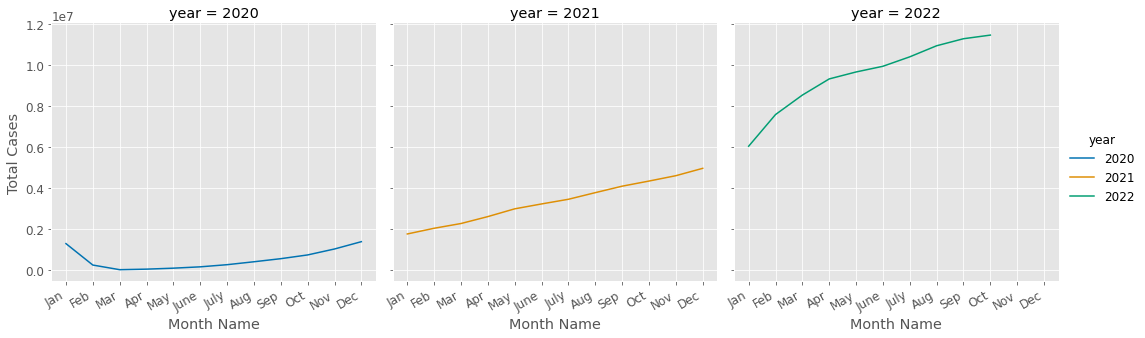

In [58]:
g = sns.relplot(
  data=df_cases,
  x='month_name', y='total_cases', ci=None,
  col='year', hue='year', palette='colorblind',
  kind='line'
)

g.set(xlabel='Month Name', ylabel='Total Cases')
g.fig.autofmt_xdate()
ax.yaxis.set_major_formatter(format_mill)

# Deaths Exploration

In [59]:
deaths_cols = ['iso_code', 'continent', 'location', 'date', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 
               'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'year', 'month_num', 'month_name', 'day', 'day_name']

df_deaths = df_filled[deaths_cols]
df_deaths.head()

iso_code continent     location       date  total_deaths  new_deaths  \
0      AFG      Asia  Afghanistan 2020-02-24    4556.62058     8.36763   
1      AFG      Asia  Afghanistan 2020-02-25    4556.62058     8.36763   
2      AFG      Asia  Afghanistan 2020-02-26    4556.62058     8.36763   
3      AFG      Asia  Afghanistan 2020-02-27    4556.62058     8.36763   
4      AFG      Asia  Afghanistan 2020-02-28    4556.62058     8.36763   

   new_deaths_smoothed  total_deaths_per_million  new_deaths_per_million  \
0              8.40963                 113.63298                 0.20873   
1              8.40963                 113.63298                 0.20873   
2              8.40963                 113.63298                 0.20873   
3              8.40963                 113.63298                 0.20873   
4              8.40963                 113.63298                 0.20873   

   new_deaths_smoothed_per_million  year  month_num month_name  day   day_name  
0                          0.20977  2020          2        Feb   24     Monday  
1                          0.20977  2020          2        Feb   25    Tuesday  
2                          0.20977  2020          2        Feb   26  Wednesday  
3                          0.20977  2020          2        Feb   27   Thursday  
4                          0.20977  2020          2        Feb   28     Friday

In [60]:
df_deaths[['total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million']].describe()

total_deaths    new_deaths  new_deaths_smoothed  \
count   2.13064e+05  213064.00000         213064.00000   
mean    6.79481e+04     128.95514            129.50795   
std     3.61891e+05     703.58329            688.94055   
min     1.00000e+00       0.00000              0.00000   
25%     8.60000e+01       0.00000              0.03199   
50%     8.67000e+02       1.00000              1.28600   
75%     8.53000e+03      12.00000             13.85700   
max     6.56034e+06   17737.00000          14858.28600   

       total_deaths_per_million  new_deaths_per_million  \
count              212086.00000            212086.00000   
mean                  661.89181                 1.43140   
std                   941.89929                 4.91871   
min                     0.00000                 0.00000   
25%                    31.55825                 0.00000   
50%                   212.62750                 0.08651   
75%                   976.69620                 1.16400   
max                  6430.84600               553.80300   

       new_deaths_smoothed_per_million  
count                     212086.00000  
mean                           1.42711  
std                            3.23654  
min                            0.00000  
25%                            0.00600  
50%                            0.24300  
75%                            1.47400  
max                          148.67300

In [61]:
df_deaths.isna().sum()                                   # check missing values

iso_code                               0
continent                          12816
location                               0
date                                   0
total_deaths                       10002
new_deaths                         10002
new_deaths_smoothed                10002
total_deaths_per_million           10980
new_deaths_per_million             10980
new_deaths_smoothed_per_million    10980
year                                   0
month_num                              0
month_name                             0
day                                    0
day_name                               0
dtype: int64

<AxesSubplot:>

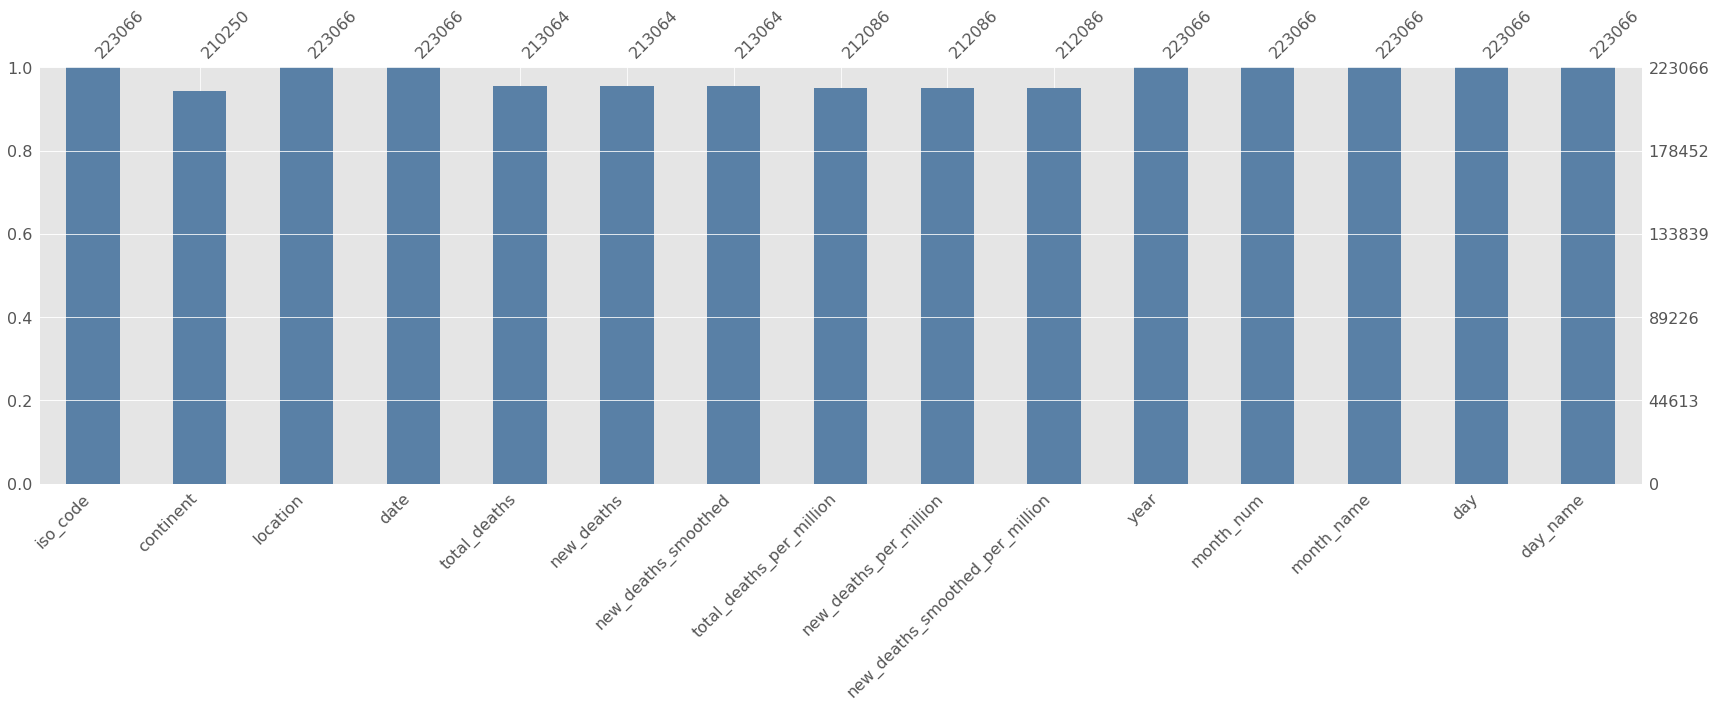

In [62]:
msno.bar(df_deaths, labels=True, color=(0.35, 0.50, 0.65))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

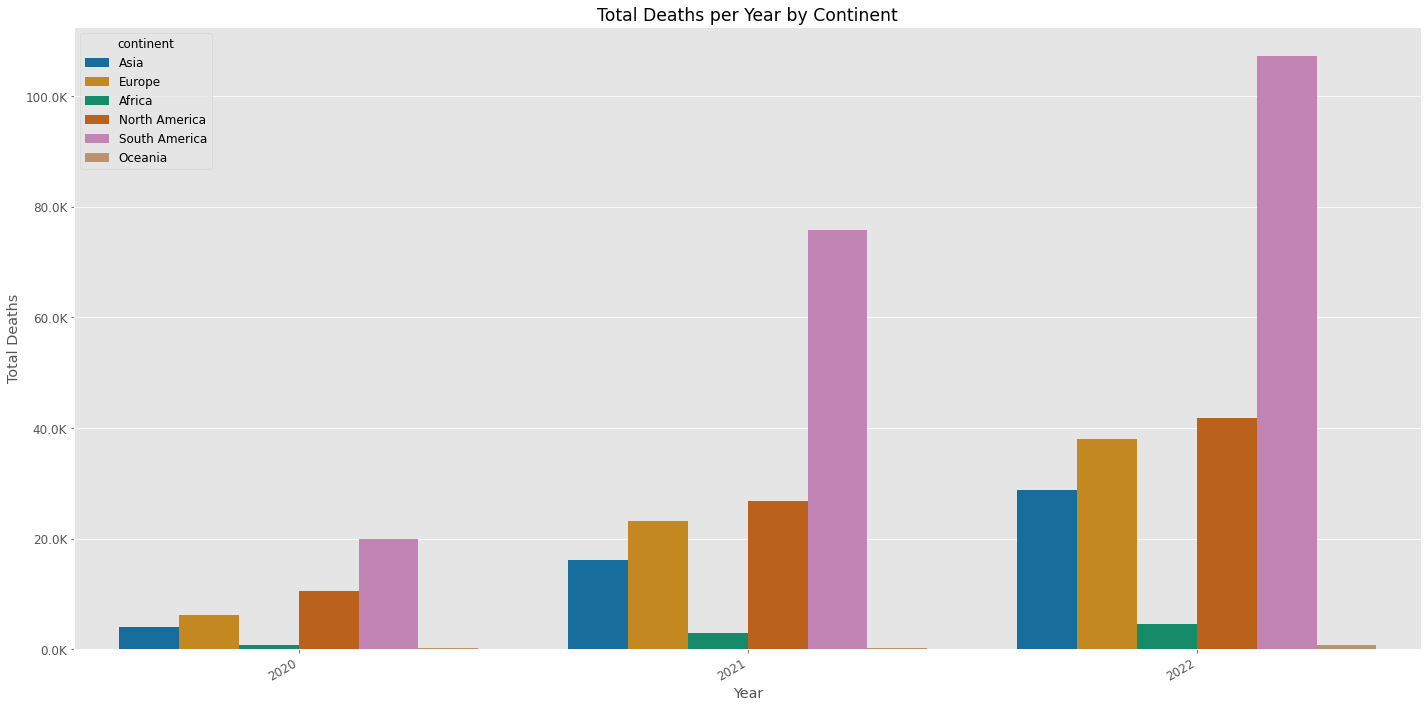

In [63]:
plot_bar(
    data=df_deaths,
    x='year', y='total_deaths', hue='continent', palette='colorblind', 
    title='Total Deaths per Year by Continent', xlabel='Year', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

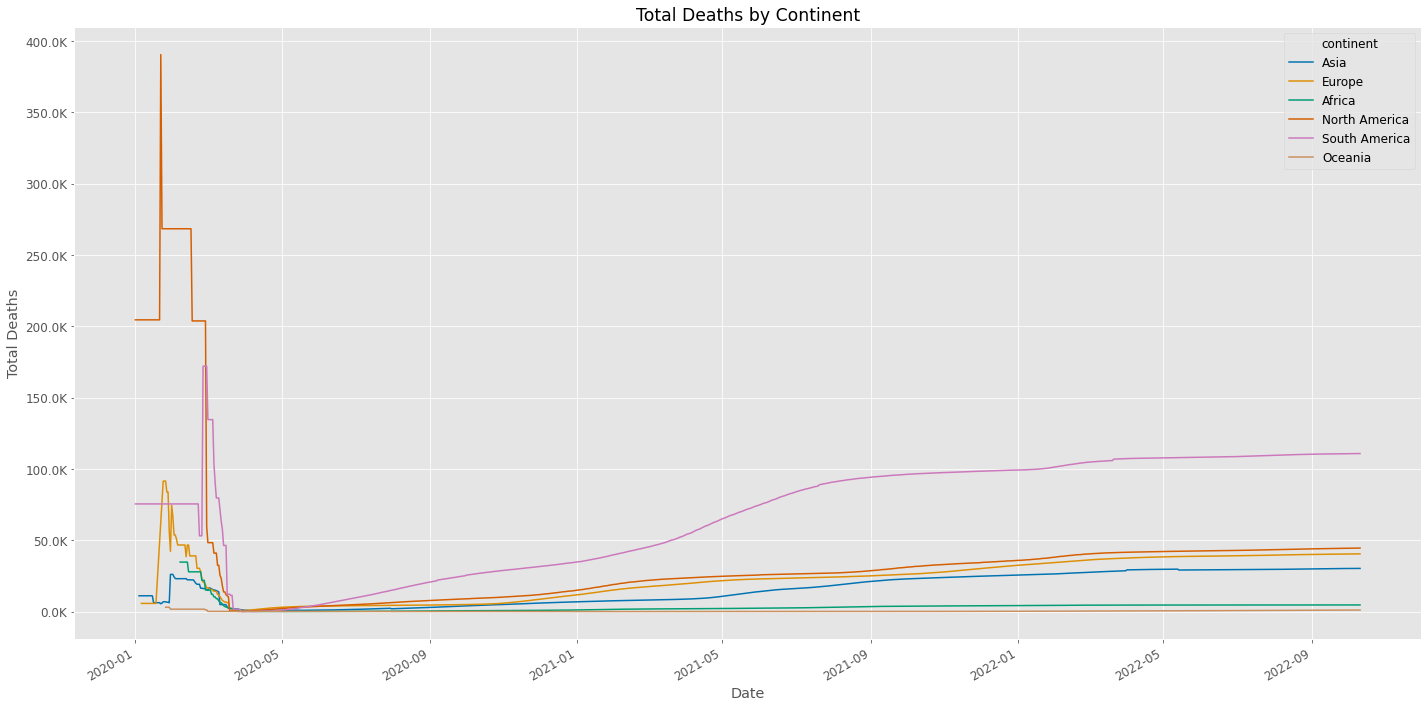

In [64]:
plot_line(
    data=df_deaths,
    x='date', y='total_deaths', hue='continent', palette='colorblind',
    title='Total Deaths by Continent', xlabel='Date', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

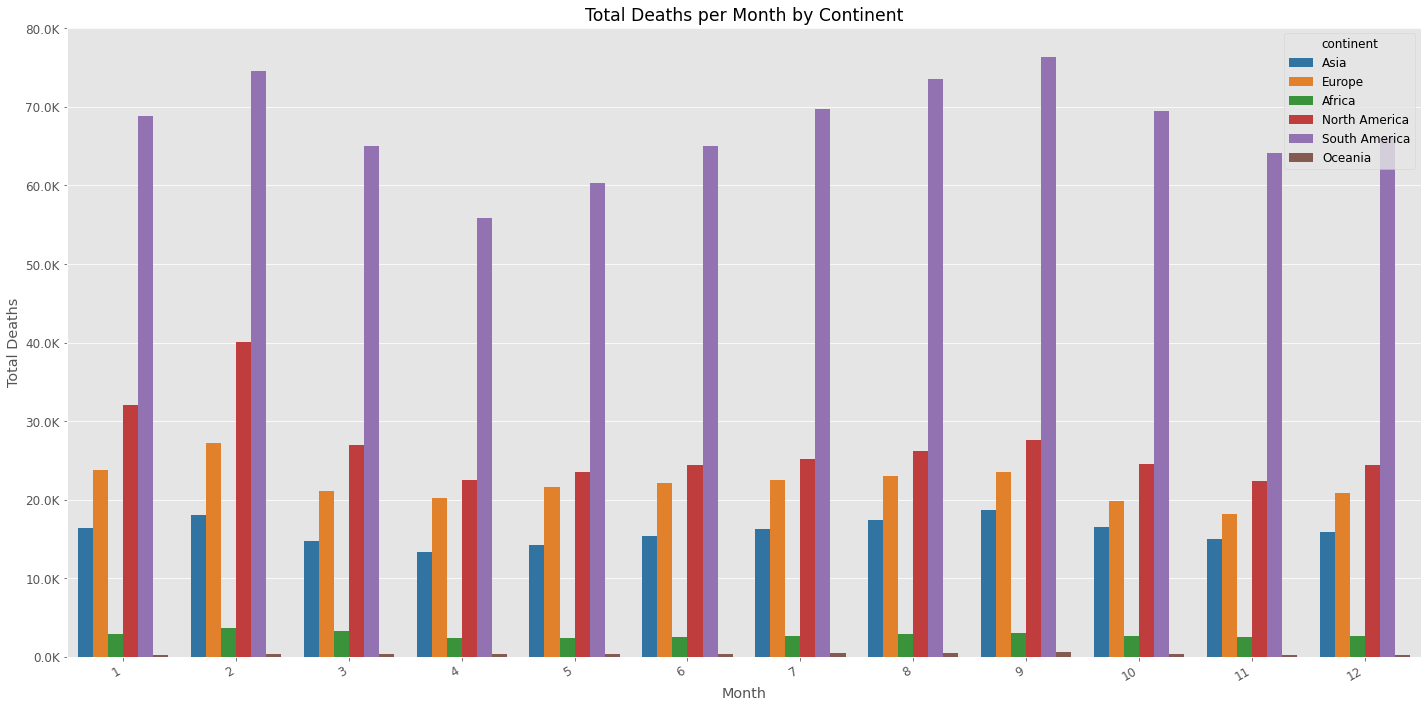

In [65]:
plot_bar(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='tab10', 
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

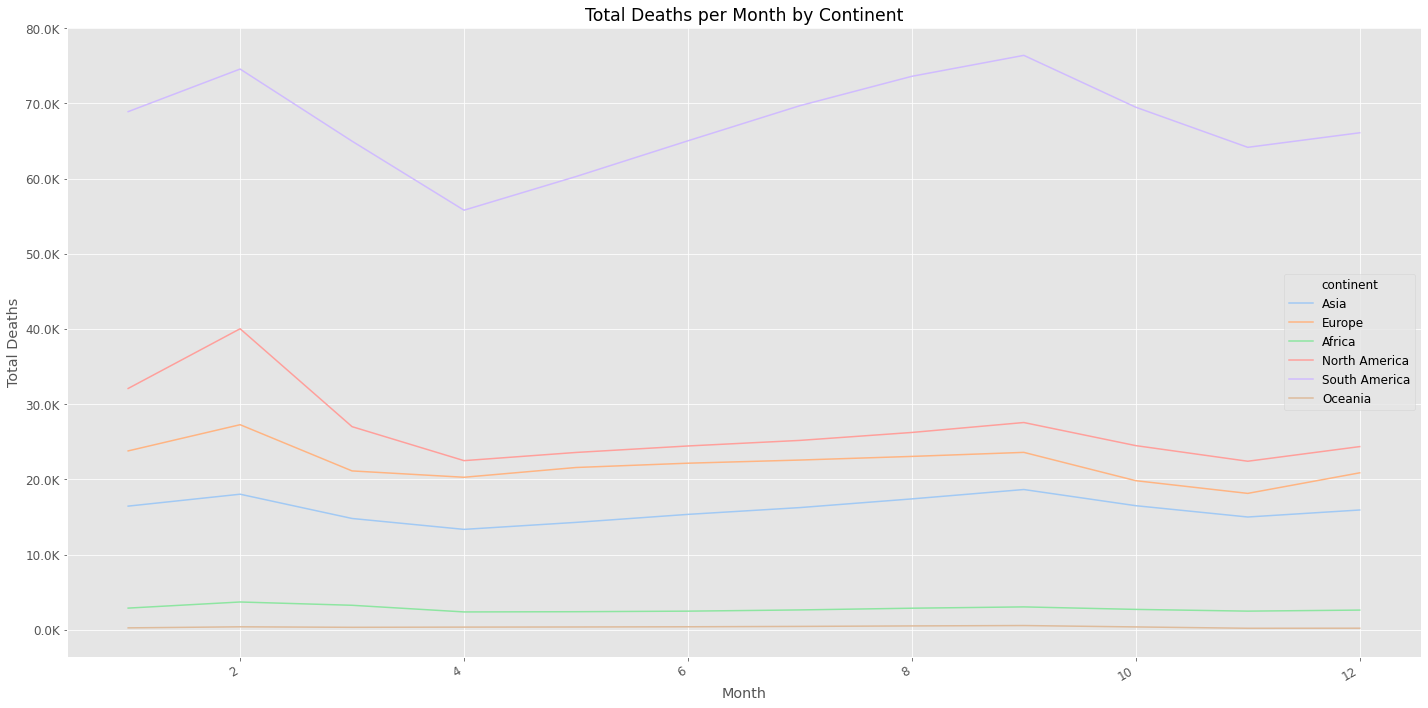

In [66]:
plot_line(
    data=df_deaths,
    x='month_num', y='total_deaths', hue='continent', palette='pastel',
    title='Total Deaths per Month by Continent', xlabel='Month', ylabel='Total Deaths', 
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

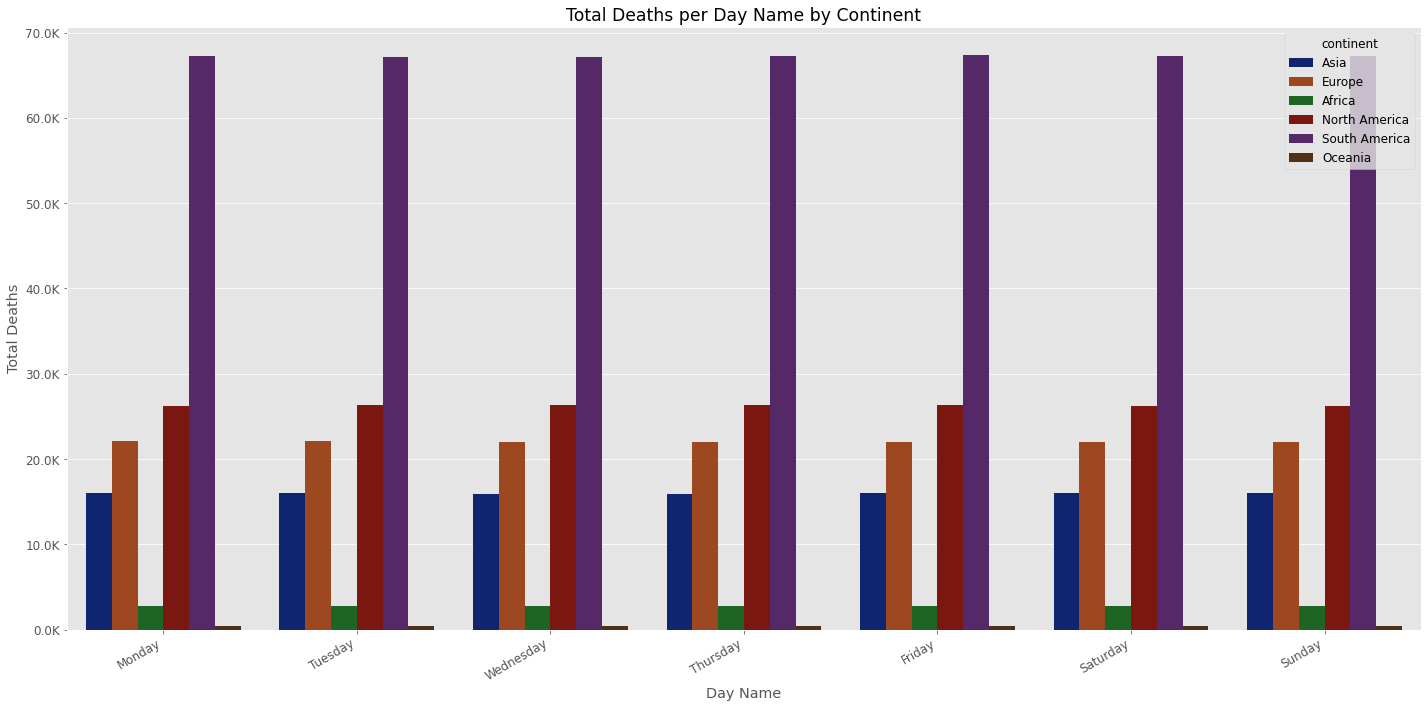

In [67]:
plot_bar(
    data=df_deaths,
    x='day_name', y='total_deaths', hue='continent', palette='dark',
    title='Total Deaths per Day Name by Continent', xlabel='Day Name', ylabel='Total Deaths', 
    formatter=format_tsd
)

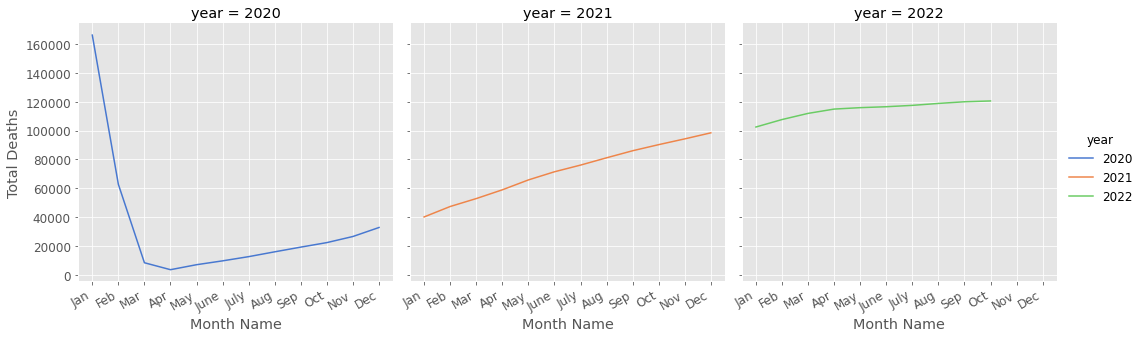

In [68]:
g1 = sns.relplot(
  data=df_deaths,
  x='month_name', y='total_deaths', ci=None, 
  col='year', hue='year', palette='muted',
  kind='line'
)

g1.set(xlabel='Month Name', ylabel='Total Deaths')
g1.fig.autofmt_xdate()

# Tests Exploration

In [69]:
test_cols = ['iso_code', 'continent', 'location', 'date', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 
             'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'year', 'month_num', 
             'month_name', 'day', 'day_name']

df_test = df_filled[test_cols]
df_test.head()

iso_code continent     location       date  new_tests  total_tests  \
0      AFG      Asia  Afghanistan 2020-02-24        NaN     924645.2   
1      AFG      Asia  Afghanistan 2020-02-25        NaN     924645.2   
2      AFG      Asia  Afghanistan 2020-02-26        NaN     924645.2   
3      AFG      Asia  Afghanistan 2020-02-27        NaN     924645.2   
4      AFG      Asia  Afghanistan 2020-02-28        NaN     924645.2   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                   23.0588                     NaN           983.55396   
1                   23.0588                     NaN           983.55396   
2                   23.0588                     NaN           983.55396   
3                   23.0588                     NaN           983.55396   
4                   23.0588                     NaN           983.55396   

   new_tests_smoothed_per_thousand  positive_rate  tests_per_case tests_units  \
0                          0.02468        0.13004         19.5295         NaN   
1                          0.02468        0.13004         19.5295         NaN   
2                          0.02468        0.13004         19.5295         NaN   
3                          0.02468        0.13004         19.5295         NaN   
4                          0.02468        0.13004         19.5295         NaN   

   year  month_num month_name  day   day_name  
0  2020          2        Feb   24     Monday  
1  2020          2        Feb   25    Tuesday  
2  2020          2        Feb   26  Wednesday  
3  2020          2        Feb   27   Thursday  
4  2020          2        Feb   28     Friday

In [70]:
df_test[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units']].describe()

new_tests  total_tests  total_tests_per_thousand  \
count  1.47329e+05  1.76767e+05              176767.00000   
mean   4.74566e+04  3.06677e+07                 851.19292   
std    1.90232e+05  2.42198e+08                2174.81188   
min    1.00000e+00  0.00000e+00                   0.00000   
25%    1.01711e+03  2.00292e+05                  36.73350   
50%    4.91800e+03  9.31454e+05                 186.93200   
75%    2.34500e+04  5.49287e+06                 740.72150   
max    3.58556e+07  9.21400e+09               32925.82600   

       new_tests_per_thousand  new_tests_smoothed  \
count            147329.00000         1.73075e+05   
mean                  3.63311         1.22557e+05   
std                   9.07609         1.07995e+06   
min                   0.00000         0.00000e+00   
25%                   0.27900         6.39000e+02   
50%                   0.95900         3.50060e+03   
75%                   3.03400         2.22200e+04   
max                 531.06200         1.47700e+07   

       new_tests_smoothed_per_thousand  positive_rate  tests_per_case  
count                     173075.00000   166416.00000     1.65475e+05  
mean                           2.92299        0.09442     2.17326e+03  
std                            7.12160        0.10272     2.94403e+04  
min                            0.00000        0.00000     1.00000e+00  
25%                            0.15839        0.01964     1.05723e+01  
50%                            0.78800        0.06600     2.84000e+01  
75%                            2.66000        0.12900     8.34000e+01  
max                          147.60300        1.00000     1.02363e+06

In [71]:
df_test.isna().sum()                                   # check missing values

iso_code                                0
continent                           12816
location                                0
date                                    0
new_tests                           75737
total_tests                         46299
total_tests_per_thousand            46299
new_tests_per_thousand              75737
new_tests_smoothed                  49991
new_tests_smoothed_per_thousand     49991
positive_rate                       56650
tests_per_case                      57591
tests_units                        116278
year                                    0
month_num                               0
month_name                              0
day                                     0
day_name                                0
dtype: int64

<AxesSubplot:>

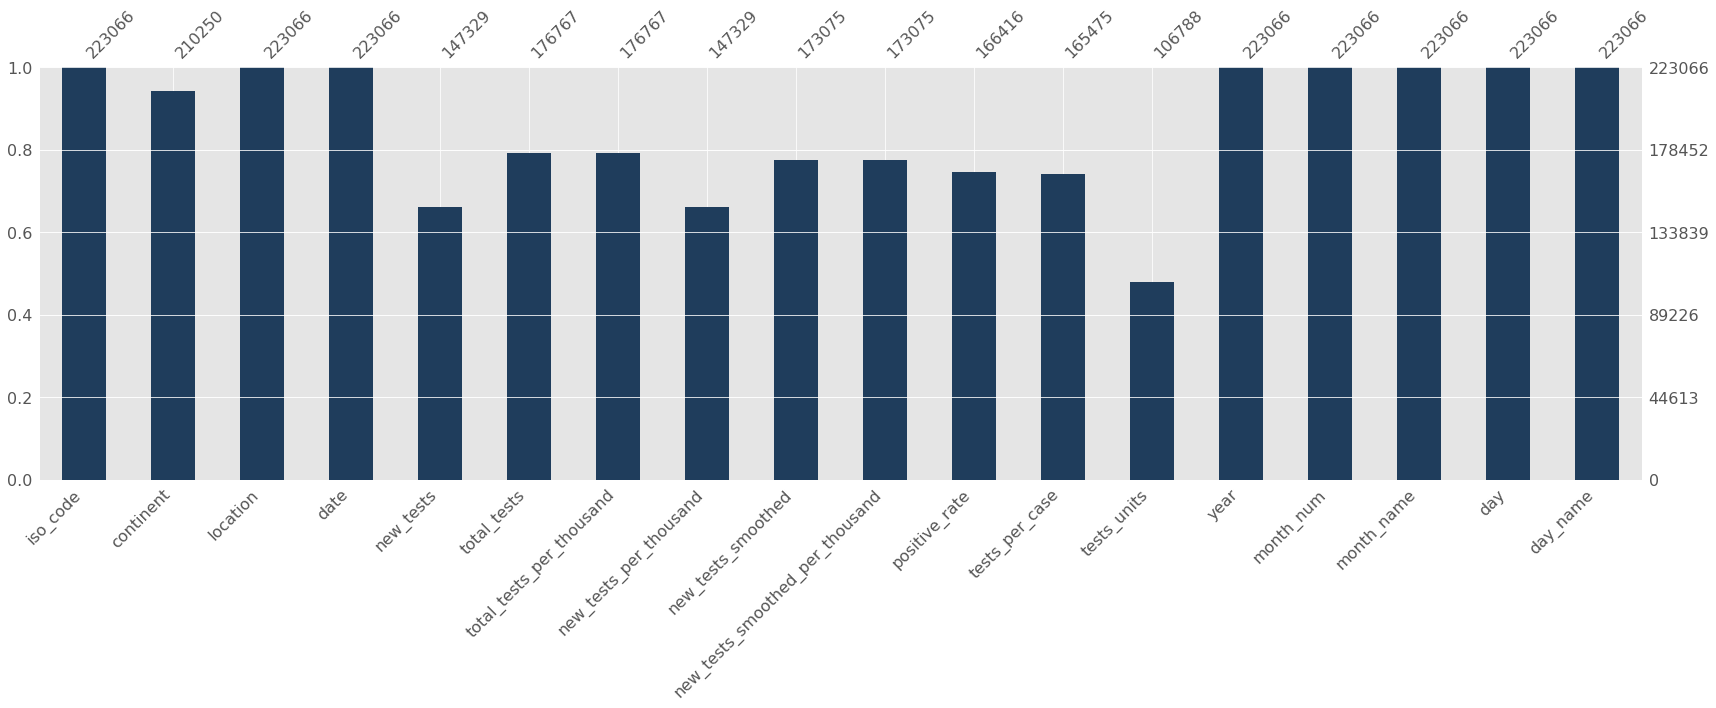

In [72]:
msno.bar(df_test, labels=True, color=(0.12, 0.24, 0.36))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

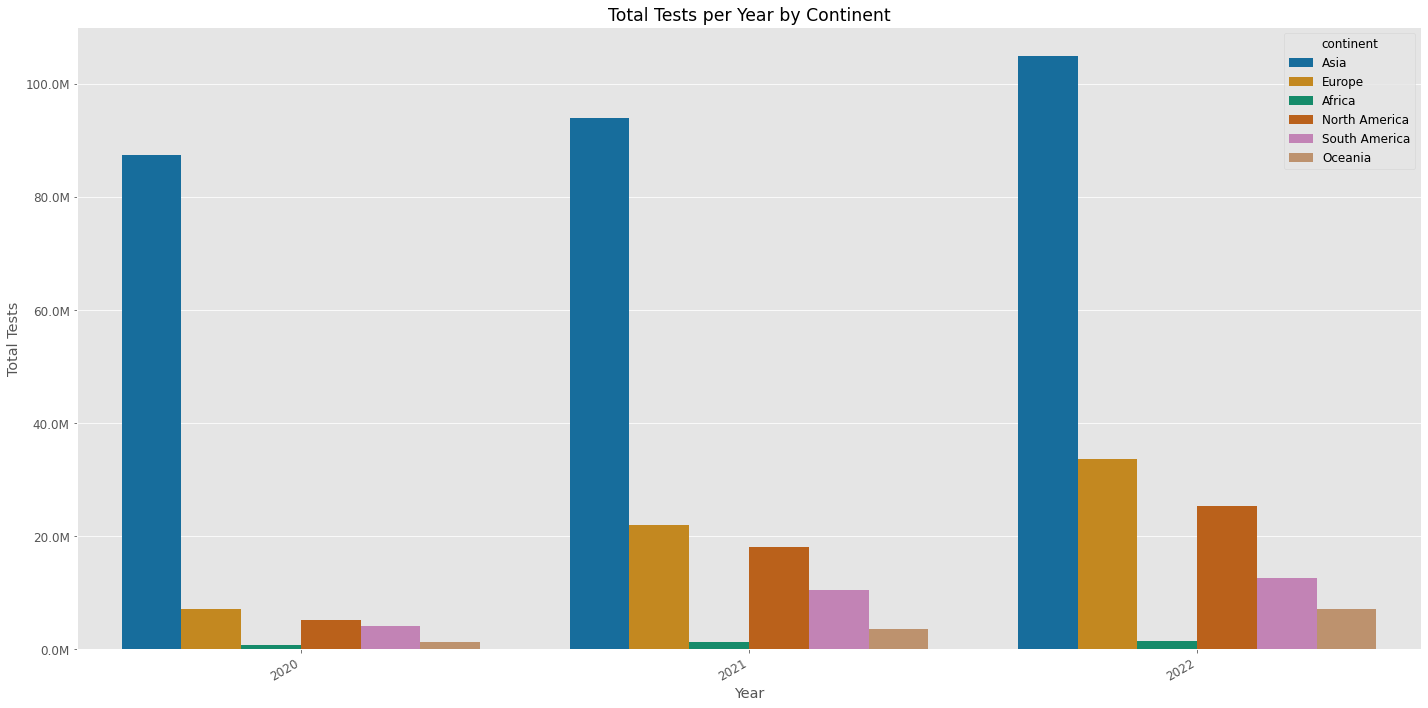

In [73]:
plot_bar(
    data=df_test,
    x='year', y='total_tests', hue='continent', palette='colorblind',
    title='Total Tests per Year by Continent', xlabel='Year', ylabel='Total Tests', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

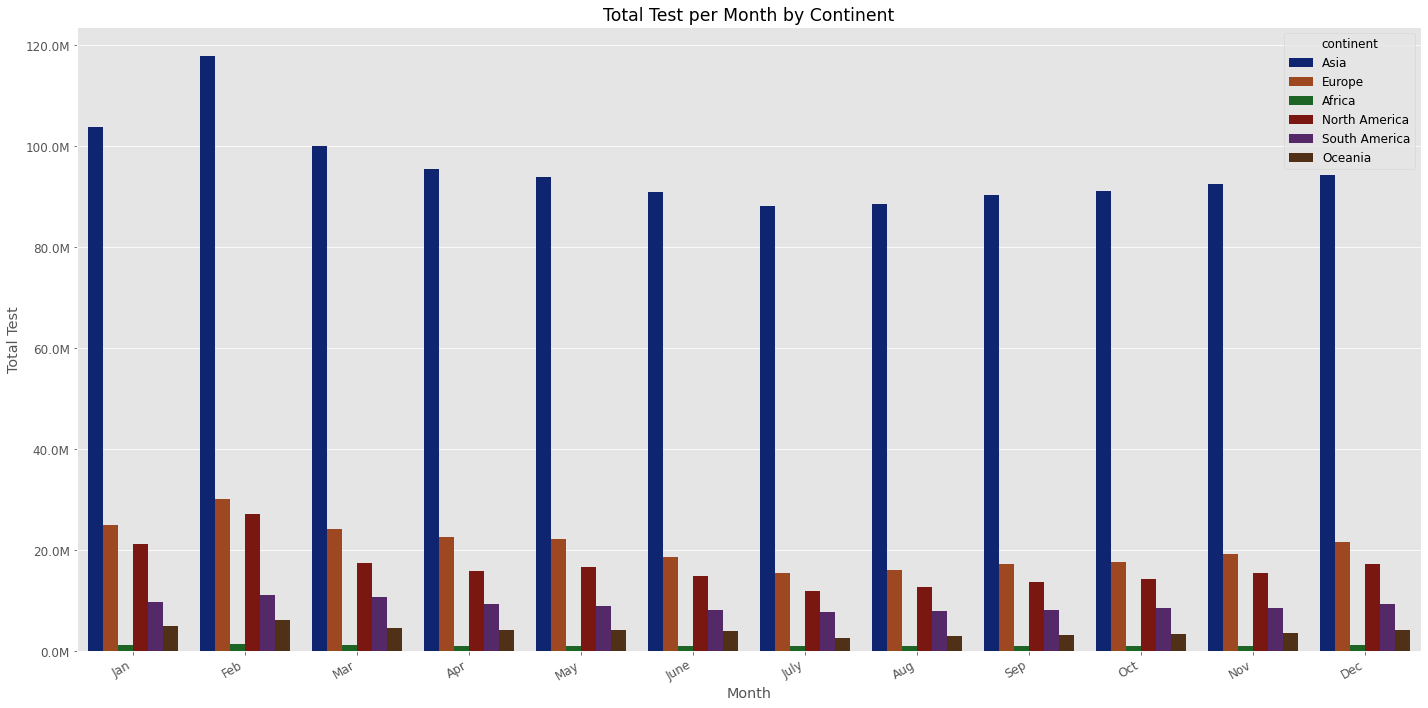

In [74]:
plot_bar(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', palette='dark', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

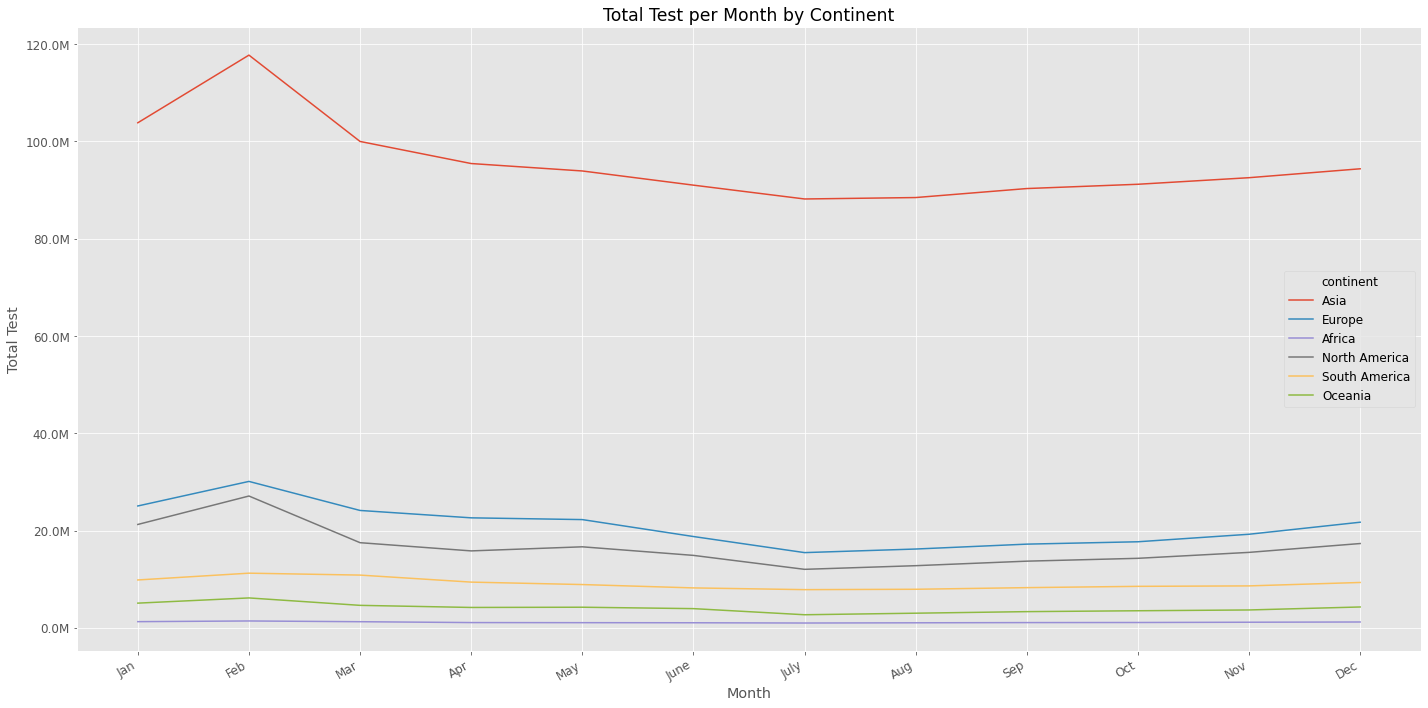

In [75]:
plot_line(
    data=df_test,
    x='month_name', y='total_tests', hue='continent', 
    title='Total Test per Month by Continent', xlabel='Month', ylabel='Total Test', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

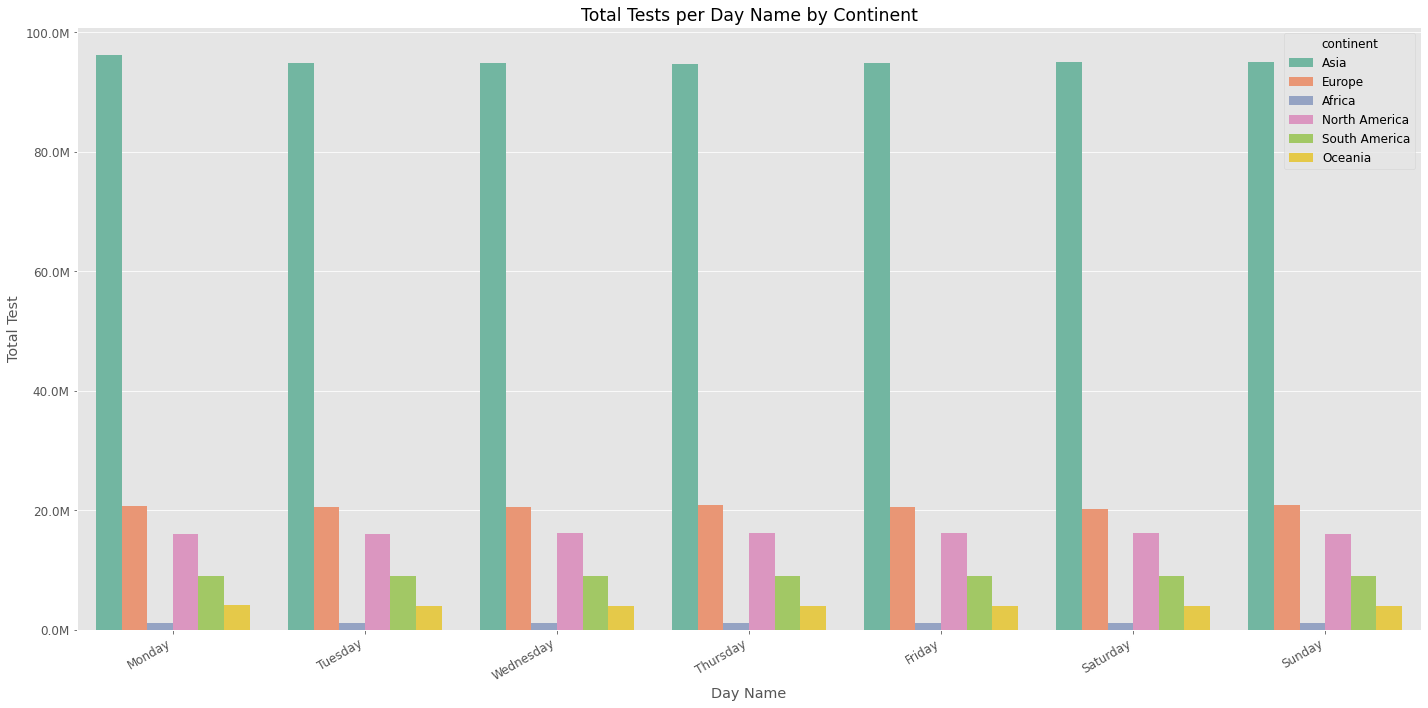

In [76]:
plot_bar(
    data=df_test,
    x='day_name', y='total_tests', hue='continent', palette='Set2',
    title='Total Tests per Day Name by Continent', xlabel='Day Name', ylabel='Total Test', 
    formatter=format_mill
)

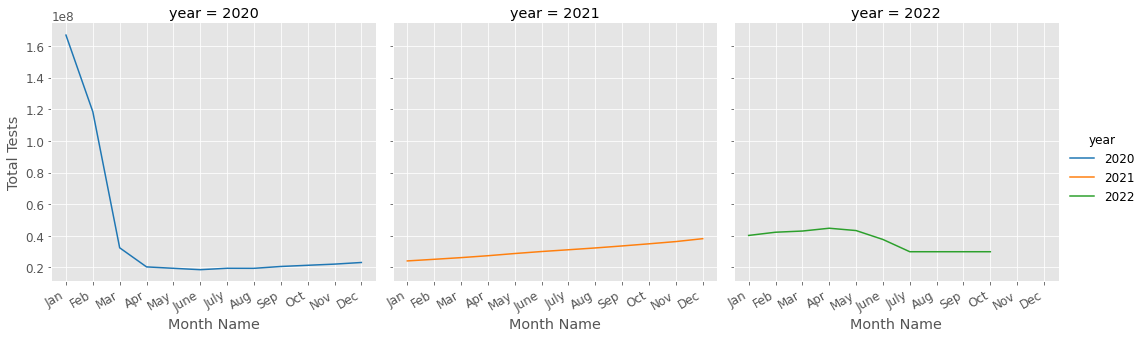

In [77]:
g2 = sns.relplot(
  data=df_test,
  x='month_name', y='total_tests', ci=None,
  col='year', hue='year', palette='tab10',
  kind='line'
)

g2.set(xlabel='Month Name', ylabel='Total Tests')
g2.fig.autofmt_xdate()

# Vaccinations Exploration

In [78]:
vacc_cols = ['iso_code', 'continent', 'location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
             'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
             'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
             'year', 'month_num', 'month_name', 'day', 'day_name']

df_vacc = df_filled[vacc_cols]
df_vacc.head()

iso_code continent     location       date  total_vaccinations  \
0      AFG      Asia  Afghanistan 2020-02-24         4.80752e+06   
1      AFG      Asia  Afghanistan 2020-02-25         4.80752e+06   
2      AFG      Asia  Afghanistan 2020-02-26         4.80752e+06   
3      AFG      Asia  Afghanistan 2020-02-27         4.80752e+06   
4      AFG      Asia  Afghanistan 2020-02-28         4.80752e+06   

   people_vaccinated  people_fully_vaccinated  total_boosters  \
0        4.39843e+06              4.24770e+06             NaN   
1        4.39843e+06              4.24770e+06             NaN   
2        4.39843e+06              4.24770e+06             NaN   
3        4.39843e+06              4.24770e+06             NaN   
4        4.39843e+06              4.24770e+06             NaN   

   new_vaccinations  new_vaccinations_smoothed  \
0            4714.4                 20214.6944   
1            4714.4                 20214.6944   
2            4714.4                 20214.6944   
3            4714.4                 20214.6944   
4            4714.4                 20214.6944   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                        11.98908                       10.96875   
1                        11.98908                       10.96875   
2                        11.98908                       10.96875   
3                        11.98908                       10.96875   
4                        11.98908                       10.96875   

   people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
0                             10.59292                         NaN   
1                             10.59292                         NaN   
2                             10.59292                         NaN   
3                             10.59292                         NaN   
4                             10.59292                         NaN   

   new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
0                              504.17487                     18590.26486   
1                              504.17487                     18590.26486   
2                              504.17487                     18590.26486   
3                              504.17487                     18590.26486   
4                              504.17487                     18590.26486   

   new_people_vaccinated_smoothed_per_hundred  year  month_num month_name  \
0                                     0.04641  2020          2        Feb   
1                                     0.04641  2020          2        Feb   
2                                     0.04641  2020          2        Feb   
3                                     0.04641  2020          2        Feb   
4                                     0.04641  2020          2        Feb   

   day   day_name  
0   24     Monday  
1   25    Tuesday  
2   26  Wednesday  
3   27   Thursday  
4   28     Friday

In [79]:
df_vacc[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']].describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count         2.13372e+05        2.13372e+05              2.13372e+05   
mean          1.31723e+08        6.35371e+07              5.42758e+07   
std           7.43631e+08        3.45566e+08              3.01166e+08   
min           0.00000e+00        0.00000e+00              1.00000e+00   
25%           3.65793e+05        2.19717e+05              1.81499e+05   
50%           2.46555e+06        1.45212e+06              1.22284e+06   
75%           1.46725e+07        7.73370e+06              6.76752e+06   
max           1.27976e+10        5.39240e+09              4.96485e+09   

       total_boosters  new_vaccinations  new_vaccinations_smoothed  \
count     1.91966e+05       1.77572e+05                2.13372e+05   
mean      2.20237e+07       4.57242e+05                3.69819e+05   
std       1.20570e+08       2.32744e+06                2.09876e+06   
min       1.00000e+00       0.00000e+00                0.00000e+00   
25%       3.97721e+04       2.76908e+03                9.26000e+02   
50%       4.88709e+05       1.51907e+04                7.86950e+03   
75%       4.31052e+06       8.86289e+04                5.27557e+04   
max       2.55765e+09       4.96752e+07                4.36898e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    213372.00000                   213372.00000   
mean                         78.66977                       38.79881   
std                          60.90631                       25.22691   
min                           0.00000                        0.00000   
25%                          24.63671                       16.28644   
50%                          72.39799                       39.48506   
75%                         117.01575                       57.42219   
max                         374.39000                      128.78000   

       people_fully_vaccinated_per_hundred  total_boosters_per_hundred  \
count                         213372.00000                191966.00000   
mean                              34.18654                    20.38521   
std                               23.61955                    20.33725   
min                                0.00000                     0.00000   
25%                               12.85400                     2.63706   
50%                               32.88250                    14.40705   
75%                               51.08000                    32.76000   
max                              126.79000                   139.77000   

       new_vaccinations_smoothed_per_million  new_people_vaccinated_smoothed  \
count                           213372.00000                     2.13372e+05   
mean                              2605.85420                     1.40690e+05   
std                               3205.55715                     8.35296e+05   
min                                  0.00000                     0.00000e+00   
25%                                572.00000                     3.00750e+02   
50%                               1835.06969                     3.32637e+03   
75%                               3424.66944                     2.07402e+04   
max                             117862.00000                     2.10705e+07   

       new_people_vaccinated_smoothed_per_hundred  
count                                213372.00000  
mean                                      0.11261  
std                                       0.18501  
min                                       0.00000  
25%                                       0.01900  
50%                                       0.07500  
75%                                       0.13162  
max                                      11.78600

In [80]:
df_vacc.isna().sum()                                   # check missing values

iso_code                                          0
continent                                     12816
location                                          0
date                                              0
total_vaccinations                             9694
people_vaccinated                              9694
people_fully_vaccinated                        9694
total_boosters                                31100
new_vaccinations                              45494
new_vaccinations_smoothed                      9694
total_vaccinations_per_hundred                 9694
people_vaccinated_per_hundred                  9694
people_fully_vaccinated_per_hundred            9694
total_boosters_per_hundred                    31100
new_vaccinations_smoothed_per_million          9694
new_people_vaccinated_smoothed                 9694
new_people_vaccinated_smoothed_per_hundred     9694
year                                              0
month_num                                         0
month_name  

<AxesSubplot:>

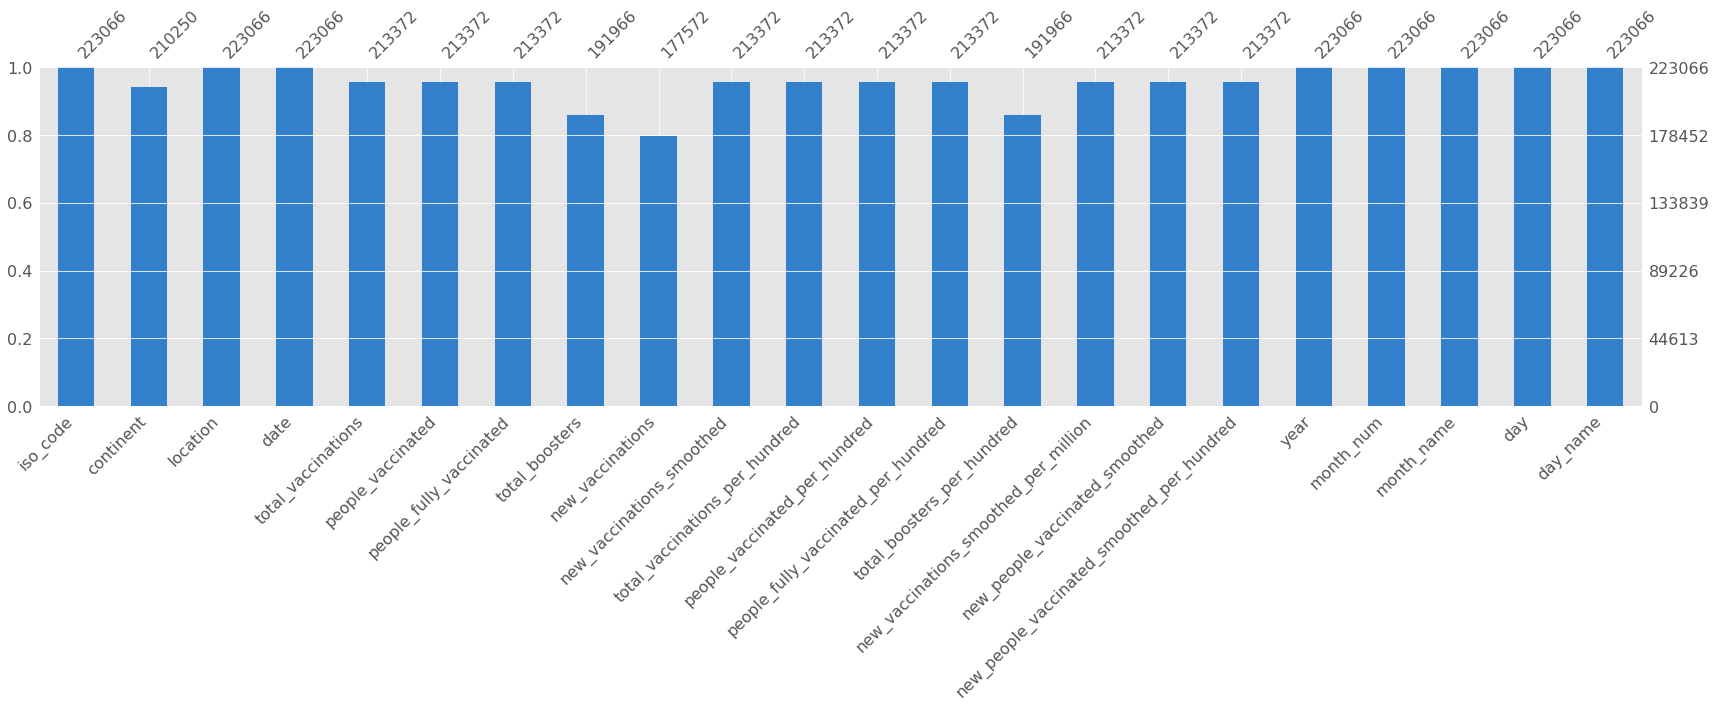

In [81]:
msno.bar(df_vacc, labels=True, color=(0.20, 0.50, 0.80))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

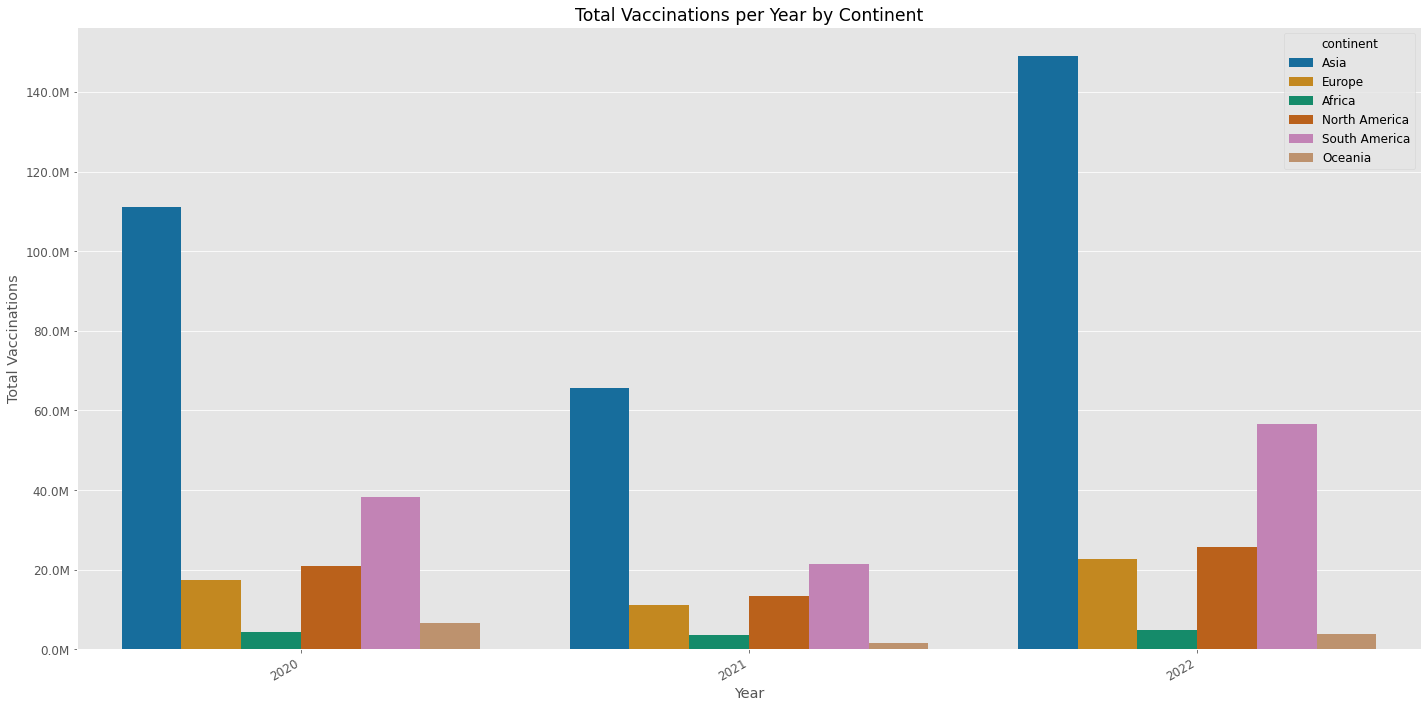

In [82]:
plot_bar(
    data=df_vacc,
    x='year', y='total_vaccinations', hue='continent', palette='colorblind', 
    title='Total Vaccinations per Year by Continent', xlabel='Year', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

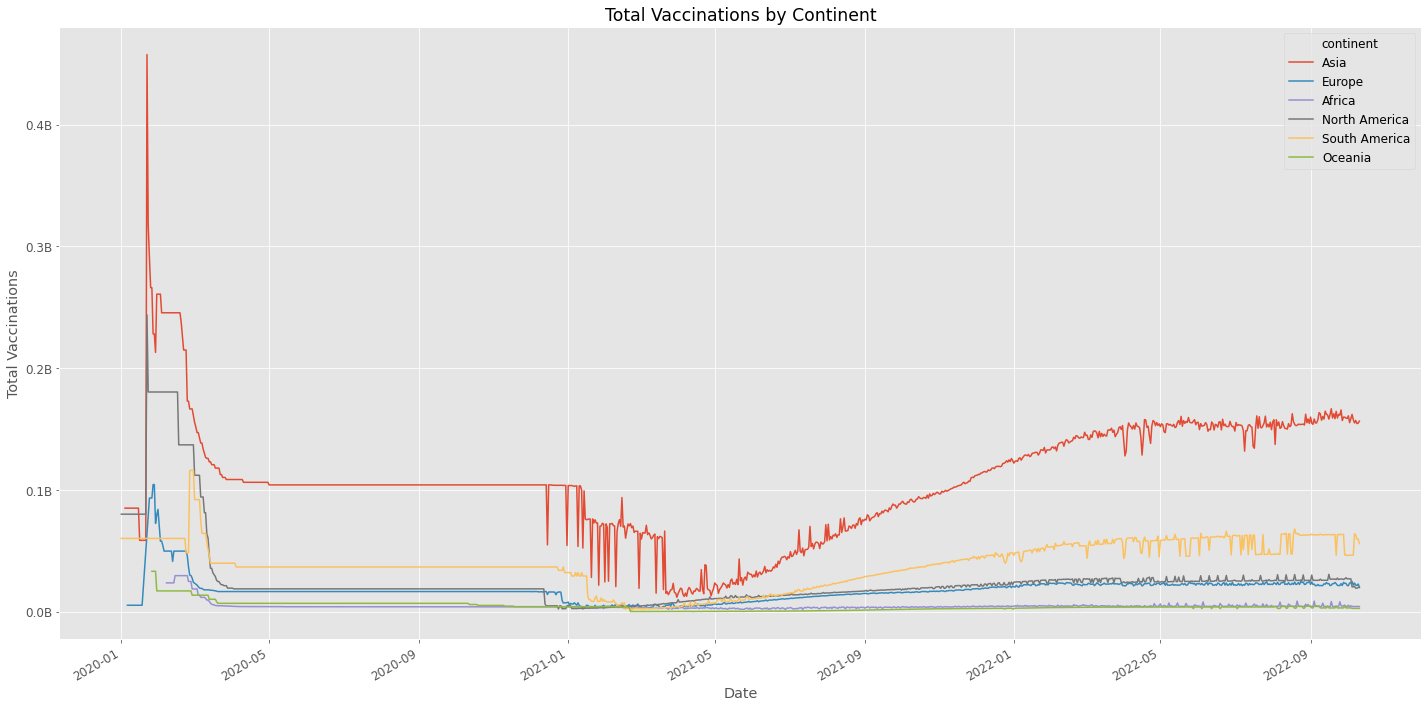

In [83]:
plot_line(
    data=df_vacc,
    x='date', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations by Continent', xlabel='Date', ylabel='Total Vaccinations', 
    formatter=format_bill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

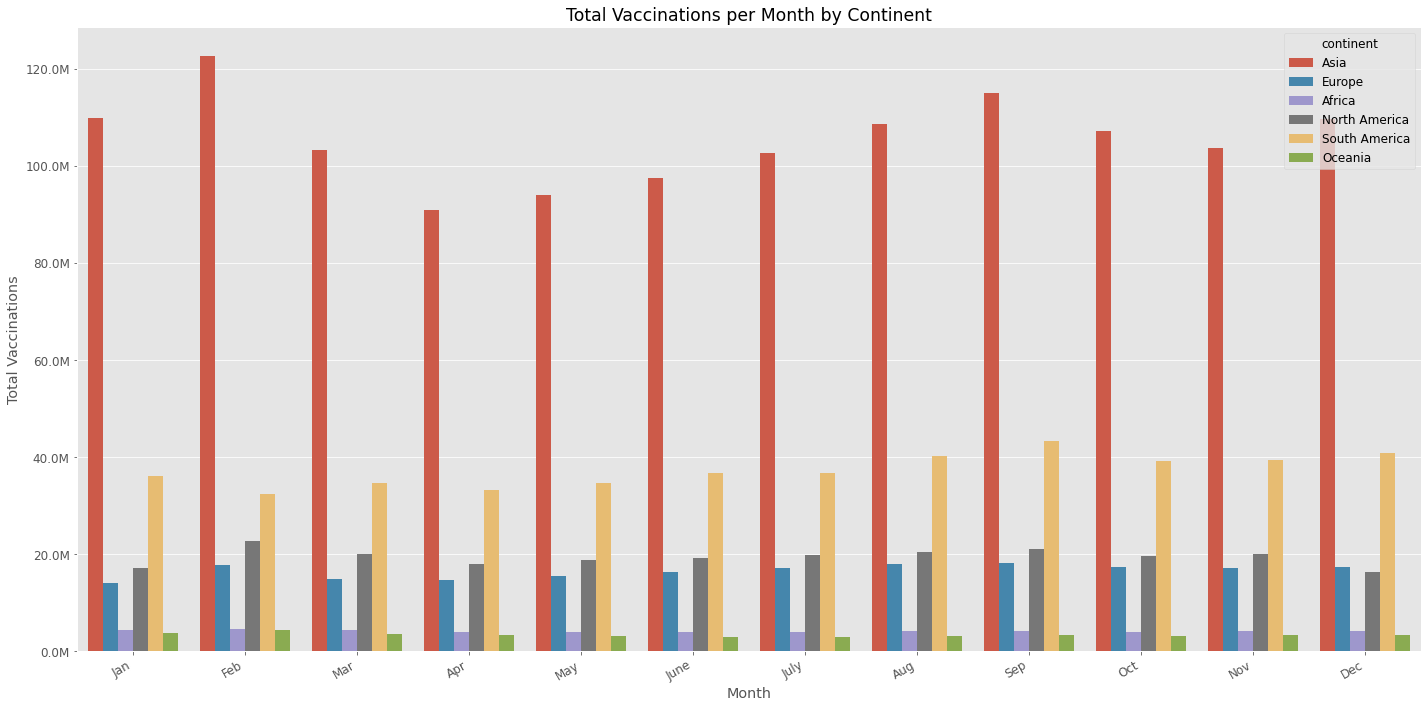

In [84]:
plot_bar(
    data=df_vacc,
    x='month_name', y='total_vaccinations', hue='continent', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

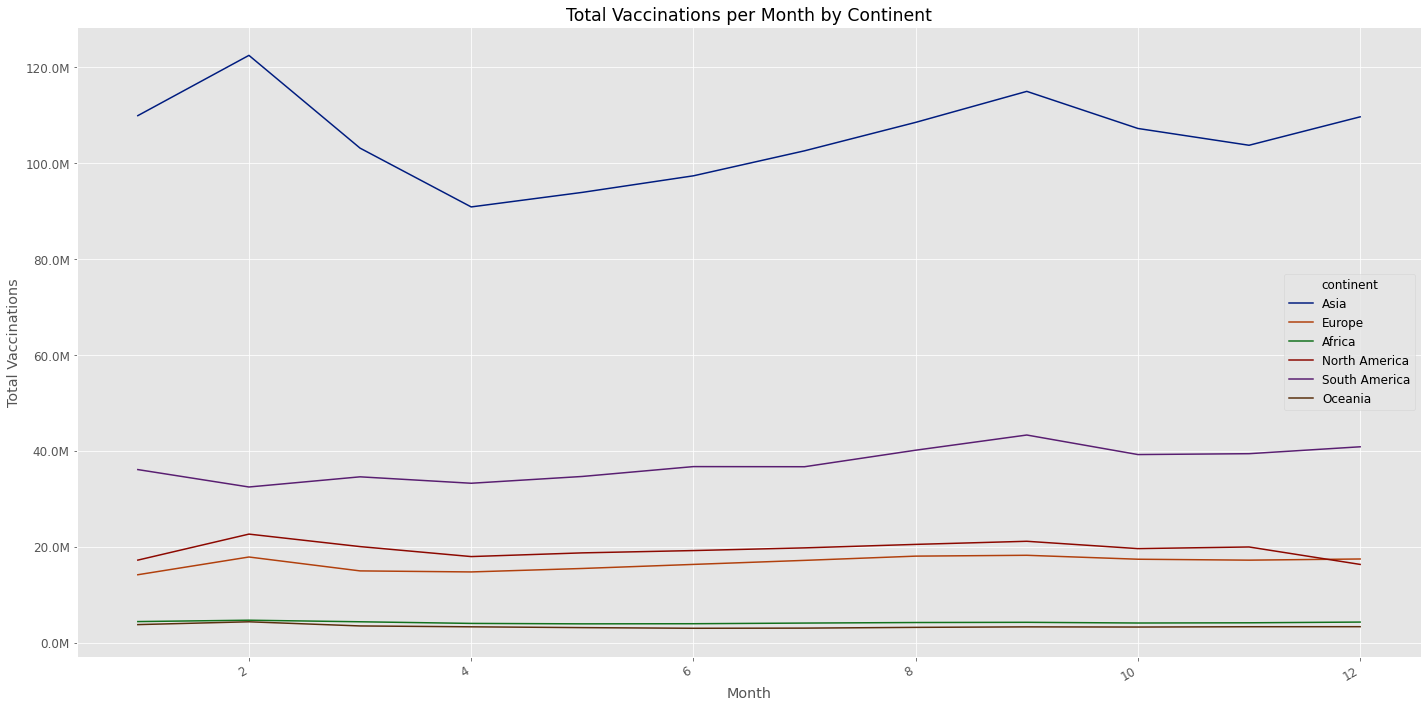

In [85]:
plot_line(
    data=df_vacc,
    x='month_num', y='total_vaccinations', hue='continent', palette='dark', 
    title='Total Vaccinations per Month by Continent', xlabel='Month', ylabel='Total Vaccinations', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

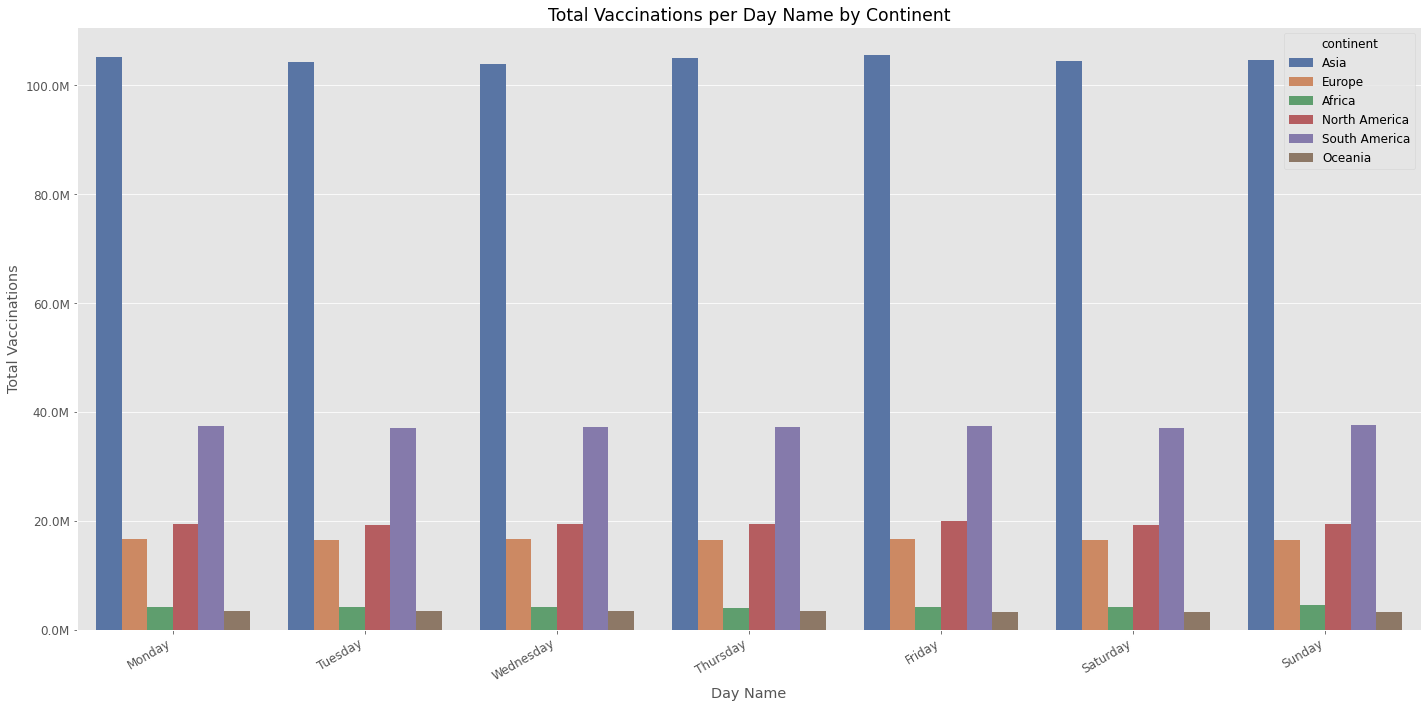

In [86]:
plot_bar(
    data=df_vacc,
    x='day_name', y='total_vaccinations', hue='continent', palette='deep', 
    title='Total Vaccinations per Day Name by Continent', xlabel='Day Name', ylabel='Total Vaccinations', 
    formatter=format_mill
)

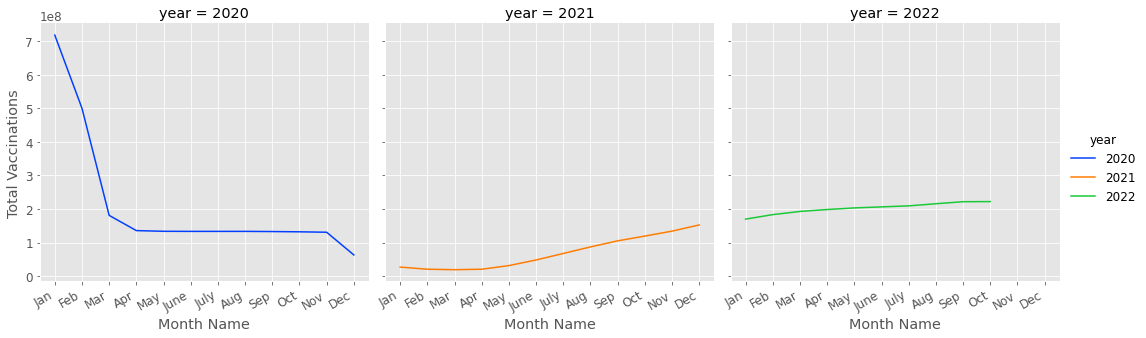

In [87]:
g3 = sns.relplot(
  data=df_vacc,
  x='month_name', y='total_vaccinations', ci=None,
  col='year', hue='year', palette='bright',
  kind='line'
)

g3.set(xlabel='Month Name', ylabel='Total Vaccinations')
g3.fig.autofmt_xdate()

# Demographics Exploration

In [88]:
demo_cols = ['iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
             'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 
             'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index','excess_mortality_cumulative_absolute', 
             'excess_mortality_cumulative', 'excess_mortality', 'excess_mortality_cumulative_per_million', 'year', 'month_num', 'month_name', 
             'day', 'day_name']

df_demo = df_filled[demo_cols]
df_demo.head()

iso_code continent     location       date  population  population_density  \
0      AFG      Asia  Afghanistan 2020-02-24  40099462.0              54.422   
1      AFG      Asia  Afghanistan 2020-02-25  40099462.0              54.422   
2      AFG      Asia  Afghanistan 2020-02-26  40099462.0              54.422   
3      AFG      Asia  Afghanistan 2020-02-27  40099462.0              54.422   
4      AFG      Asia  Afghanistan 2020-02-28  40099462.0              54.422   

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0        18.6          2.581          1.337        1803.987              NaN   
1        18.6          2.581          1.337        1803.987              NaN   
2        18.6          2.581          1.337        1803.987              NaN   
3        18.6          2.581          1.337        1803.987              NaN   
4        18.6          2.581          1.337        1803.987              NaN   

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
0                597.029                 9.59             NaN           NaN   
1                597.029                 9.59             NaN           NaN   
2                597.029                 9.59             NaN           NaN   
3                597.029                 9.59             NaN           NaN   
4                597.029                 9.59             NaN           NaN   

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                  37.746                         0.5            64.83   
1                  37.746                         0.5            64.83   
2                  37.746                         0.5            64.83   
3                  37.746                         0.5            64.83   
4                  37.746                         0.5            64.83   

   human_development_index  excess_mortality_cumulative_absolute  \
0                    0.511                                   NaN   
1                    0.511                                   NaN   
2                    0.511                                   NaN   
3                    0.511                                   NaN   
4                    0.511                                   NaN   

   excess_mortality_cumulative  excess_mortality  \
0                          NaN               NaN   
1                          NaN               NaN   
2                          NaN               NaN   
3                          NaN               NaN   
4                          NaN               NaN   

   excess_mortality_cumulative_per_million  year  month_num month_name  day  \
0                                      NaN  2020          2        Feb   24   
1                                      NaN  2020          2        Feb   25   
2                                      NaN  2020          2        Feb   26   
3                                      NaN  2020          2        Feb   27   
4                                      NaN  2020          2        Feb   28   

    day_name  
0     Monday  
1    Tuesday  
2  Wednesday  
3   Thursday  
4     Friday

In [89]:
df_demo[['population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
         'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 
         'human_development_index', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality', 
         'excess_mortality_cumulative_per_million']].describe()

population  population_density    median_age  aged_65_older  \
count  2.21771e+05        198129.00000  183346.00000   181411.00000   
mean   1.42307e+08           456.46256      30.61631        8.80360   
std    6.93845e+08          2105.25857       9.06225        6.12648   
min    4.70000e+01             0.13700      15.10000        1.14400   
25%    8.21626e+05            37.31200      22.30000        3.52600   
50%    7.42506e+06            88.12500      30.60000        6.70400   
75%    3.35739e+07           214.24300      39.10000       14.17800   
max    7.90930e+09         20546.76600      48.20000       27.04900   

       aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
count   182387.00000    182708.00000     119046.00000           182856.00000   
mean         5.55347     19552.15146         13.63264              261.42215   
std          4.16196     20538.01830         20.03133              120.22353   
min          0.52600       661.24000          0.10000               79.37000   
25%          2.06300      4449.89800          0.60000              170.05000   
50%          4.03200     12951.83900          2.20000              243.96400   
75%          8.67800     27936.89600         21.40000              329.94200   
max         18.49300    116935.60000         77.60000              724.41700   

       diabetes_prevalence  female_smokers  male_smokers  \
count         192237.00000    138412.00000  136517.00000   
mean               8.38572        10.67491      32.80901   
std                4.73199        10.62525      13.53444   
min                0.99000         0.10000       7.70000   
25%                5.31000         1.90000      21.60000   
50%                7.20000         6.30000      31.40000   
75%               10.59000        19.30000      41.30000   
max               30.53000        44.00000      78.10000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count             90009.00000                162731.00000     208441.00000   
mean                 50.93349                     3.08917         73.61972   
std                  31.88319                     2.55248          7.44619   
min                   1.18800                     0.10000         53.28000   
25%                  20.85900                     1.30000         69.50000   
50%                  49.83900                     2.50000         75.05000   
75%                  83.24100                     4.20000         79.07000   
max                 100.00000                    13.80000         86.75000   

       human_development_index  excess_mortality_cumulative_absolute  \
count             178354.00000                           1.09363e+05   
mean                   0.72482                           3.52926e+04   
std                    0.14961                           9.92358e+04   
min                    0.39400                          -3.77261e+04   
25%                    0.60200                           8.61182e+01   
50%                    0.74200                           5.90657e+03   
75%                    0.84500                           1.91333e+04   
max                    0.95700                           1.22058e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 109363.00000      109363.00000   
mean                       9.44775          15.89706   
std                       11.68271          13.72872   
min                      -28.45000         -95.92000   
25%                        1.40045           6.54321   
50%                        7.02409          13.08489   
75%                       14.82133          23.64831   
max                       76.55000         376.25000   

       excess_mortality_cumulative_per_million  
count                             109363.00000  
mean                                1089.09277  
std                                 1225.66874  
min                                -1884.67898  
25% 

In [90]:
df_demo.isna().sum()                                   # check missing values

iso_code                                        0
continent                                   12816
location                                        0
date                                            0
population                                   1295
population_density                          24937
median_age                                  39720
aged_65_older                               41655
aged_70_older                               40679
gdp_per_capita                              40358
extreme_poverty                            104020
cardiovasc_death_rate                       40210
diabetes_prevalence                         30829
female_smokers                              84654
male_smokers                                86549
handwashing_facilities                     133057
hospital_beds_per_thousand                  60335
life_expectancy                             14625
human_development_index                     44712
excess_mortality_cumulative_absolute       113703


<AxesSubplot:>

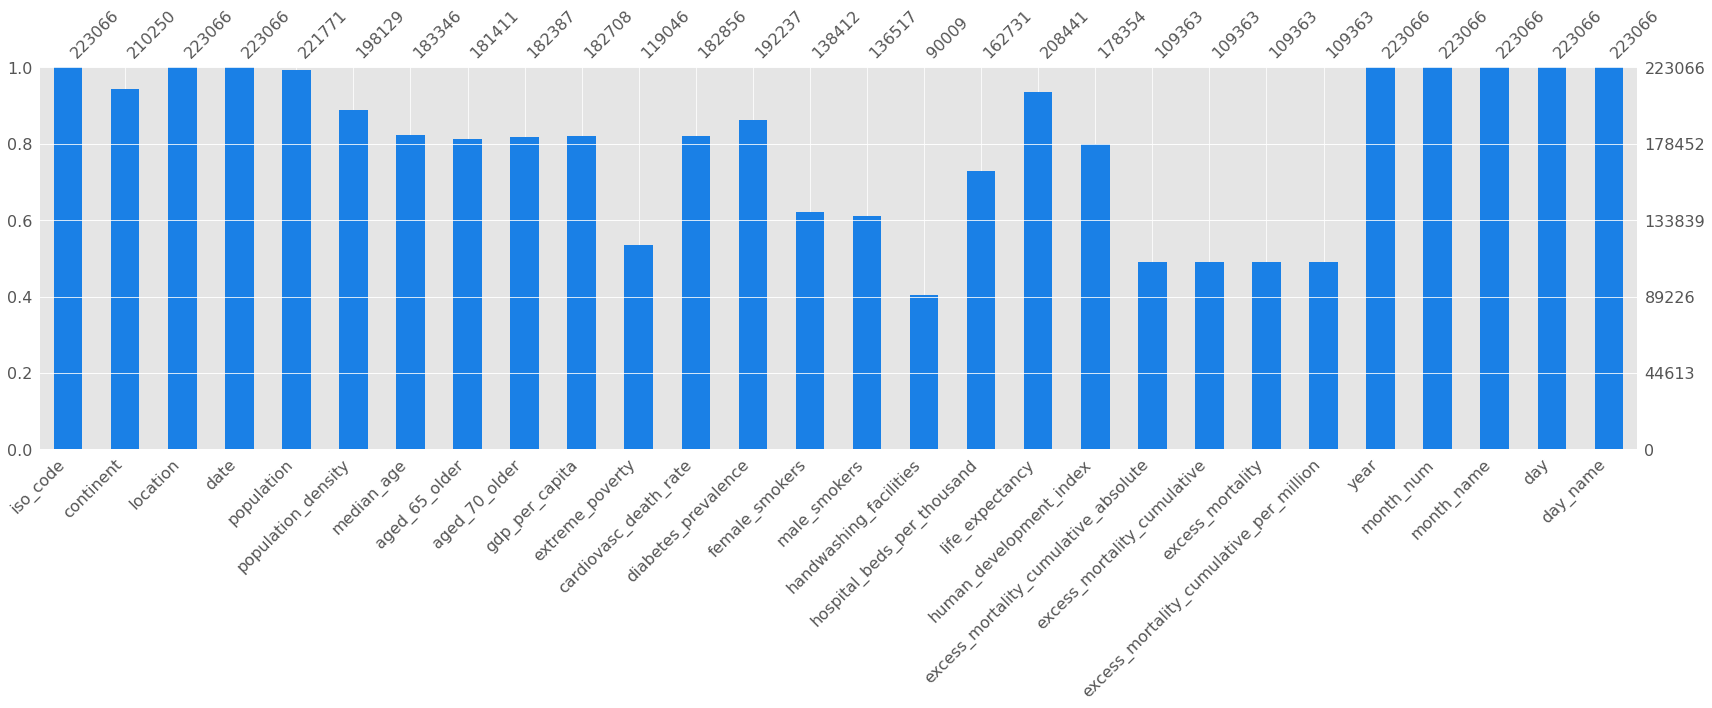

In [91]:
msno.bar(df_demo, labels=True, color=(0.1, 0.5, 0.9))

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

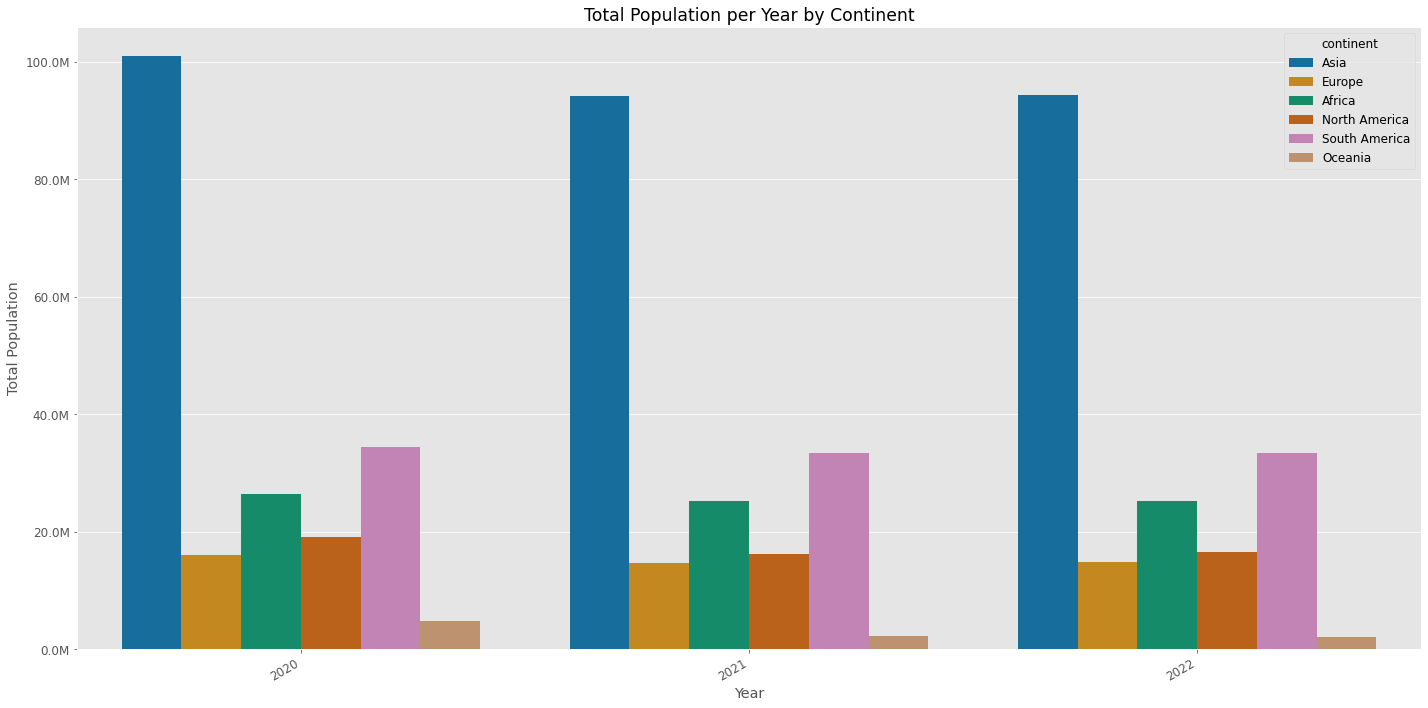

In [92]:
plot_bar(
    data=df_demo,
    x='year', y='population', hue='continent', palette='colorblind',
    title='Total Population per Year by Continent', xlabel='Year', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

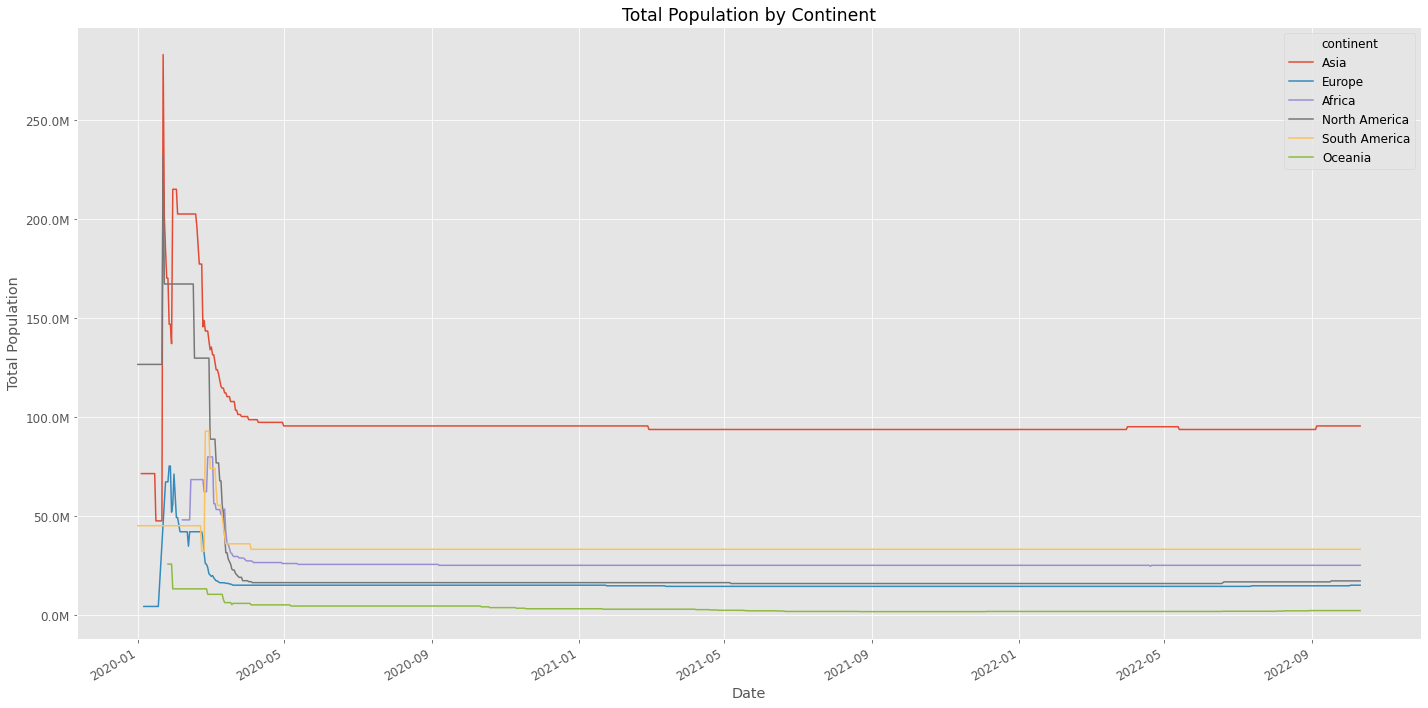

In [93]:
plot_line(
    data=df_demo,
    x='date', y='population', hue='continent', 
    title='Total Population by Continent', xlabel='Date', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

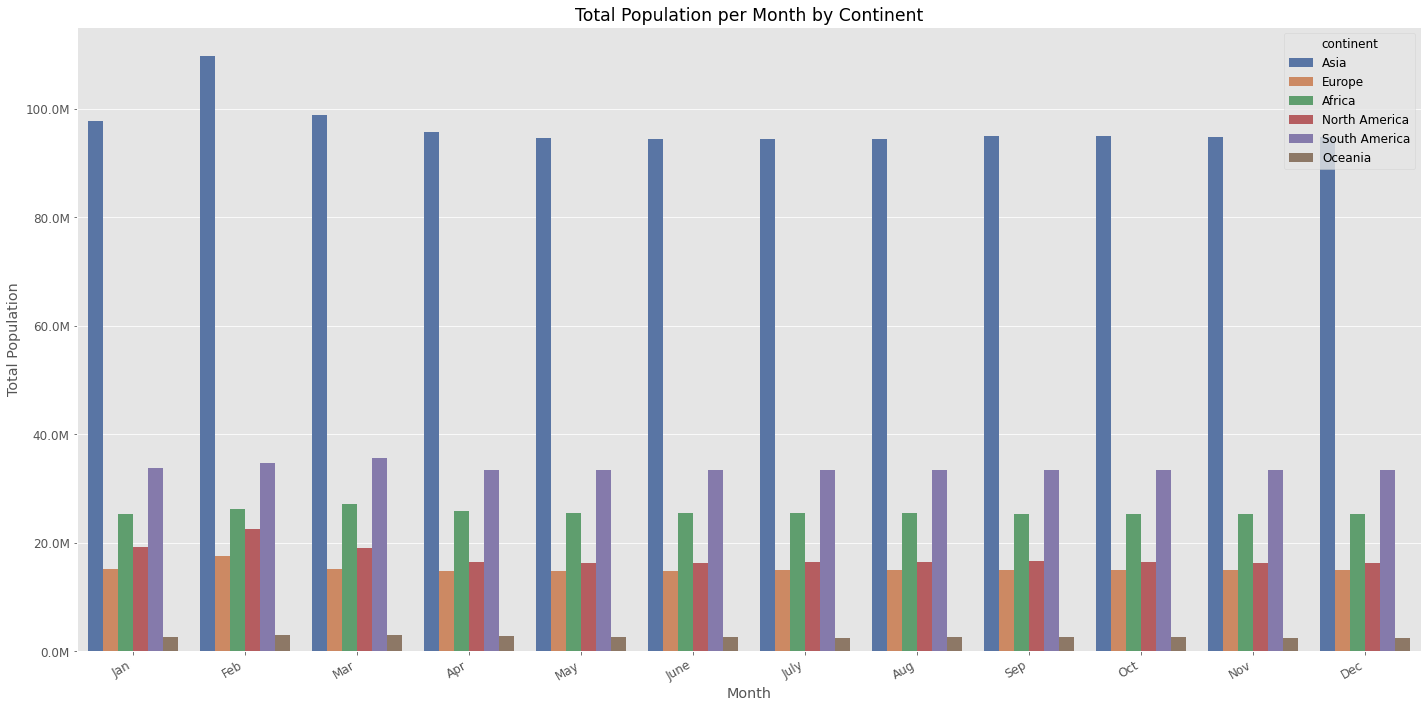

In [94]:
plot_bar(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='deep',
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_line(data, x, y, hue=None, palette=None, size=None, markers=None, style=None, ci=None, hue_order=None, title=None, xlabel=None, ylabel=None, formatter=None)>

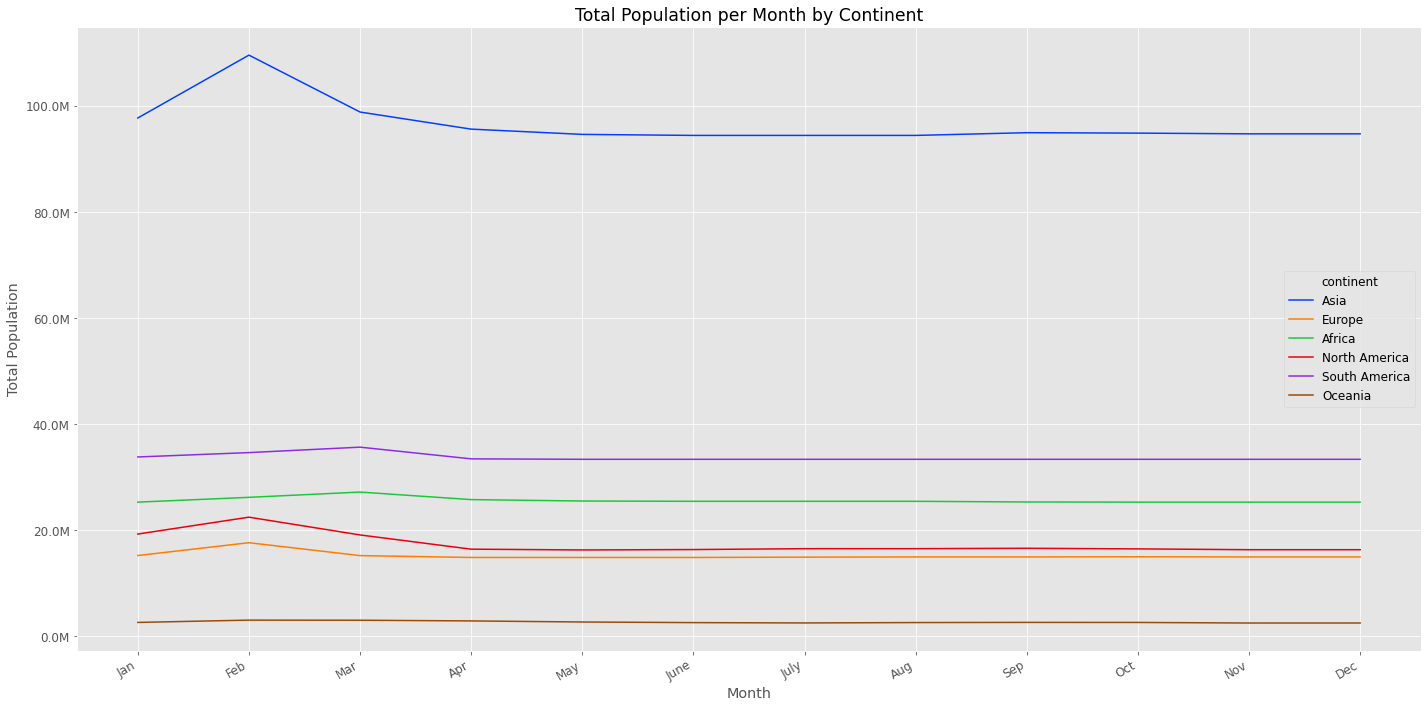

In [95]:
plot_line(
    data=df_demo,
    x='month_name', y='population', hue='continent', palette='bright', 
    title='Total Population per Month by Continent', xlabel='Month', ylabel='Total Population', 
    formatter=format_mill
)

<function __main__.plot_bar(data, x, y, hue=None, ci=None, color=None, hue_order=None, order=None, palette=None, xlabel=None, ylabel=None, title=None, formatter=None)>

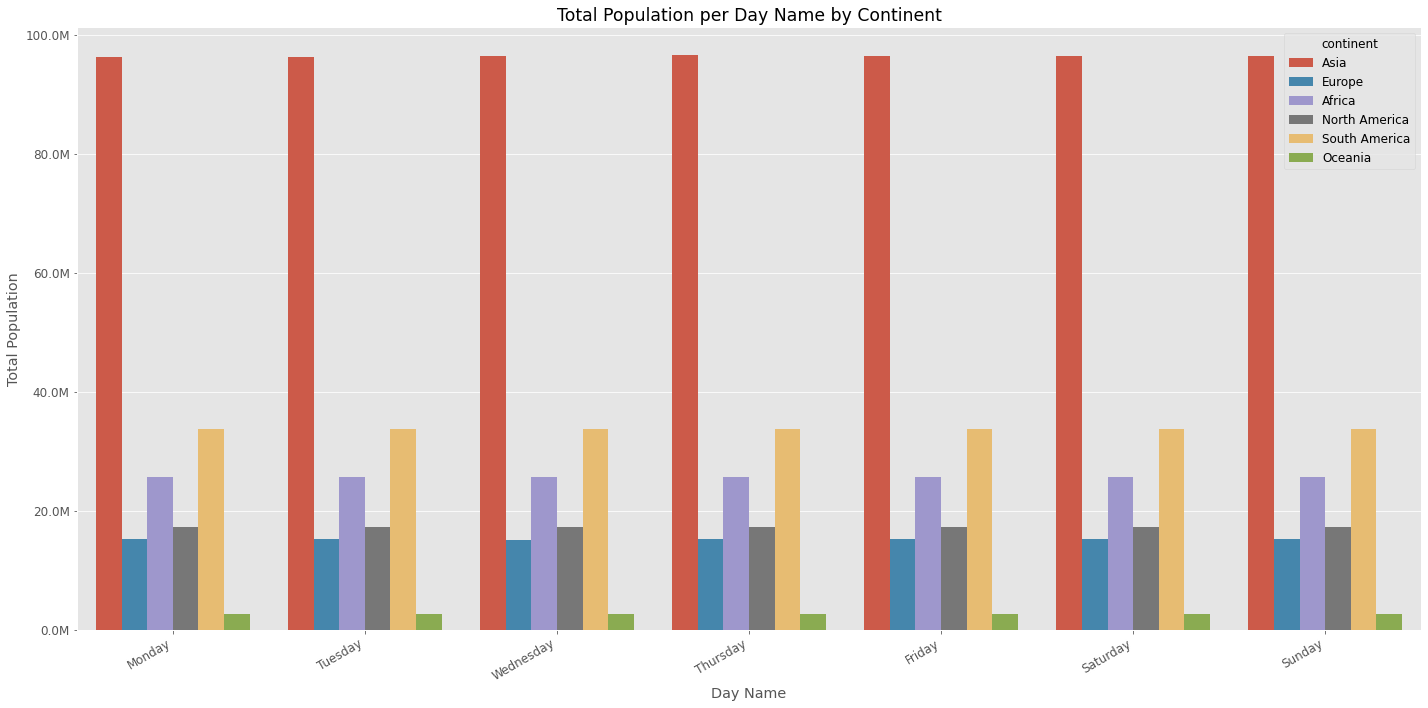

In [96]:
plot_bar(
    data=df_demo,
    x='day_name', y='population', hue='continent', 
    title='Total Population per Day Name by Continent', xlabel='Day Name', ylabel='Total Population', 
    formatter=format_mill
)

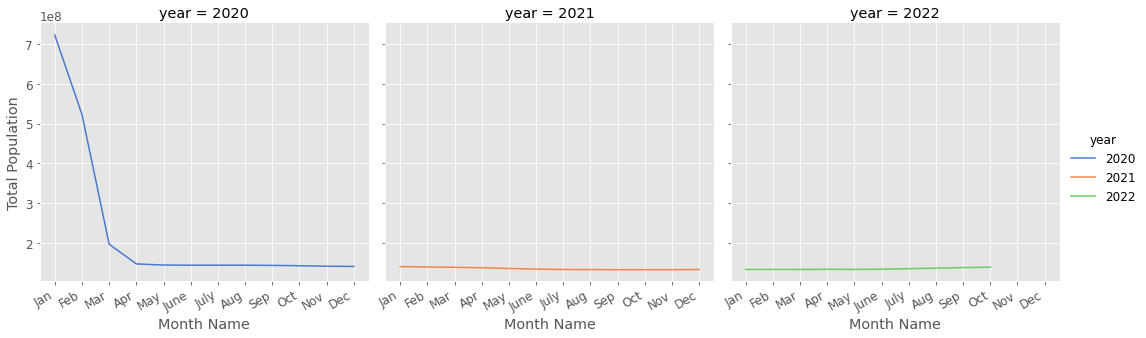

In [97]:
g4 = sns.relplot(
  data=df_demo,
  x='month_name', y='population', ci=None,
  col='year', hue='year', palette='muted',
  kind='line'
)

g4.set(xlabel='Month Name', ylabel='Total Population')
g4.fig.autofmt_xdate()

# Date Truncating or Indexing

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

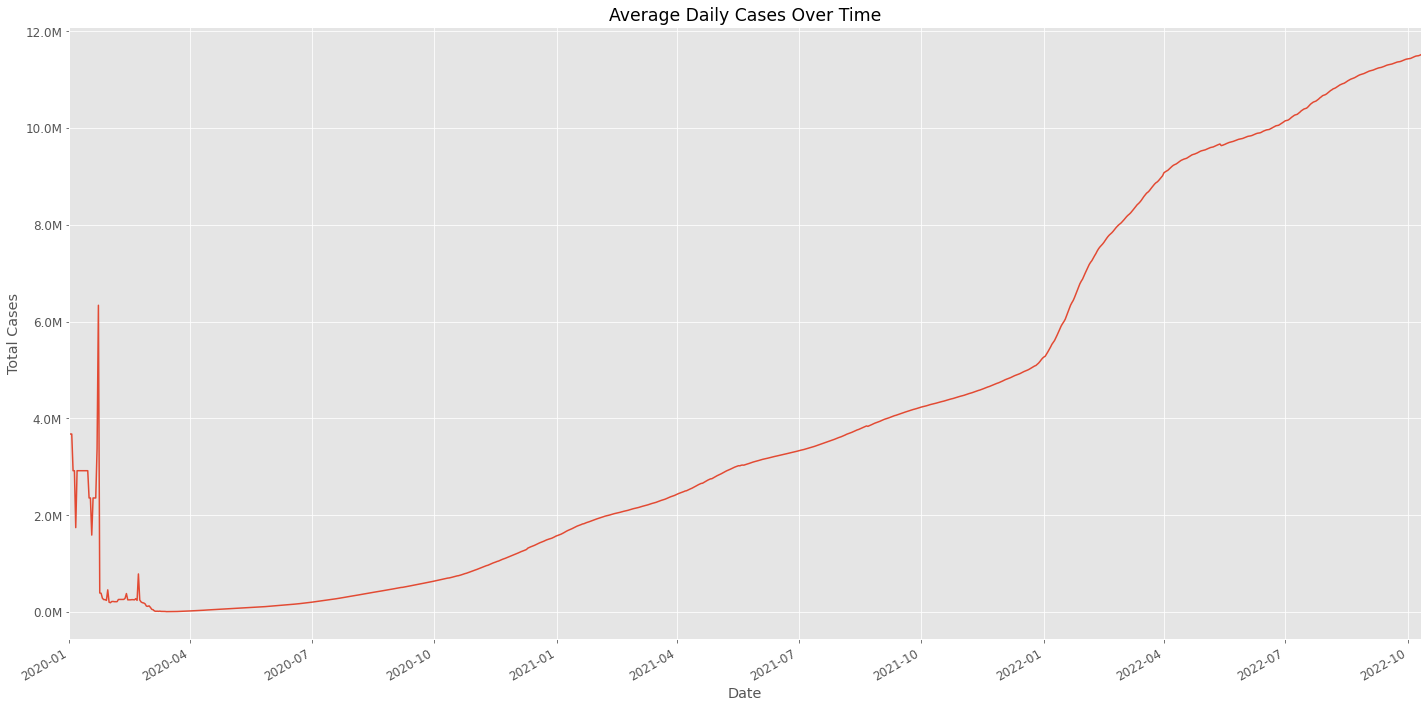

In [98]:
plot_date_rng(
    data=get_data(data=df_filled, rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Daily Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

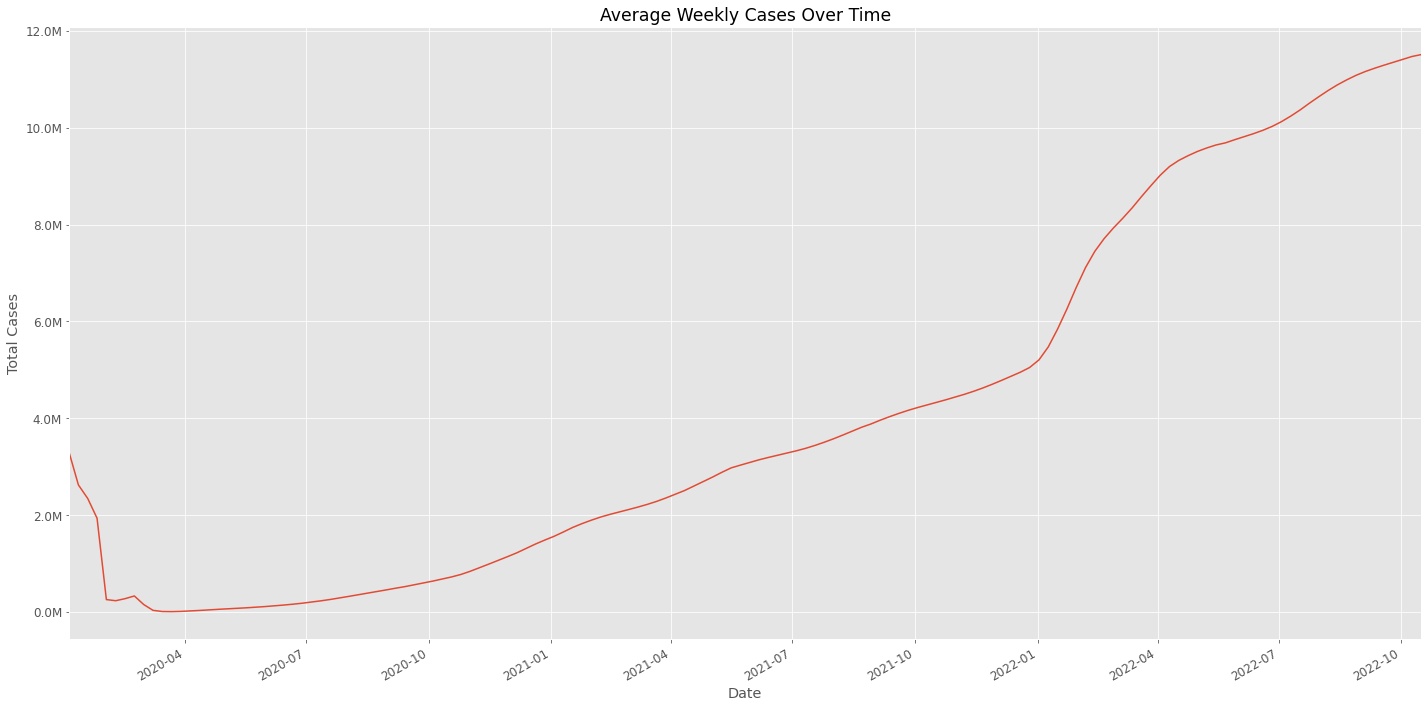

In [99]:
plot_date_rng(
    data=get_data(data=df_filled, rule='W').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Weekly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

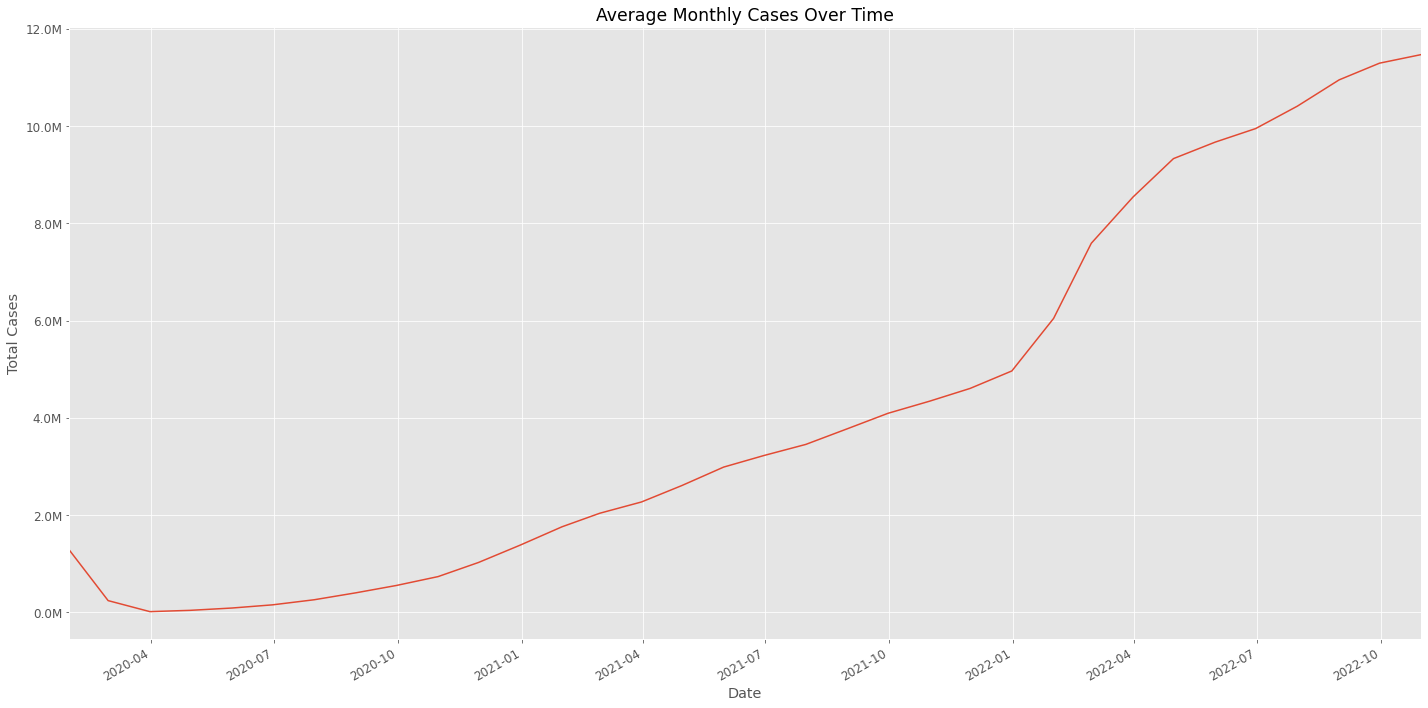

In [100]:
plot_date_rng(
    data=get_data(data=df_filled, rule='M').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Monthly Cases Over Time',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

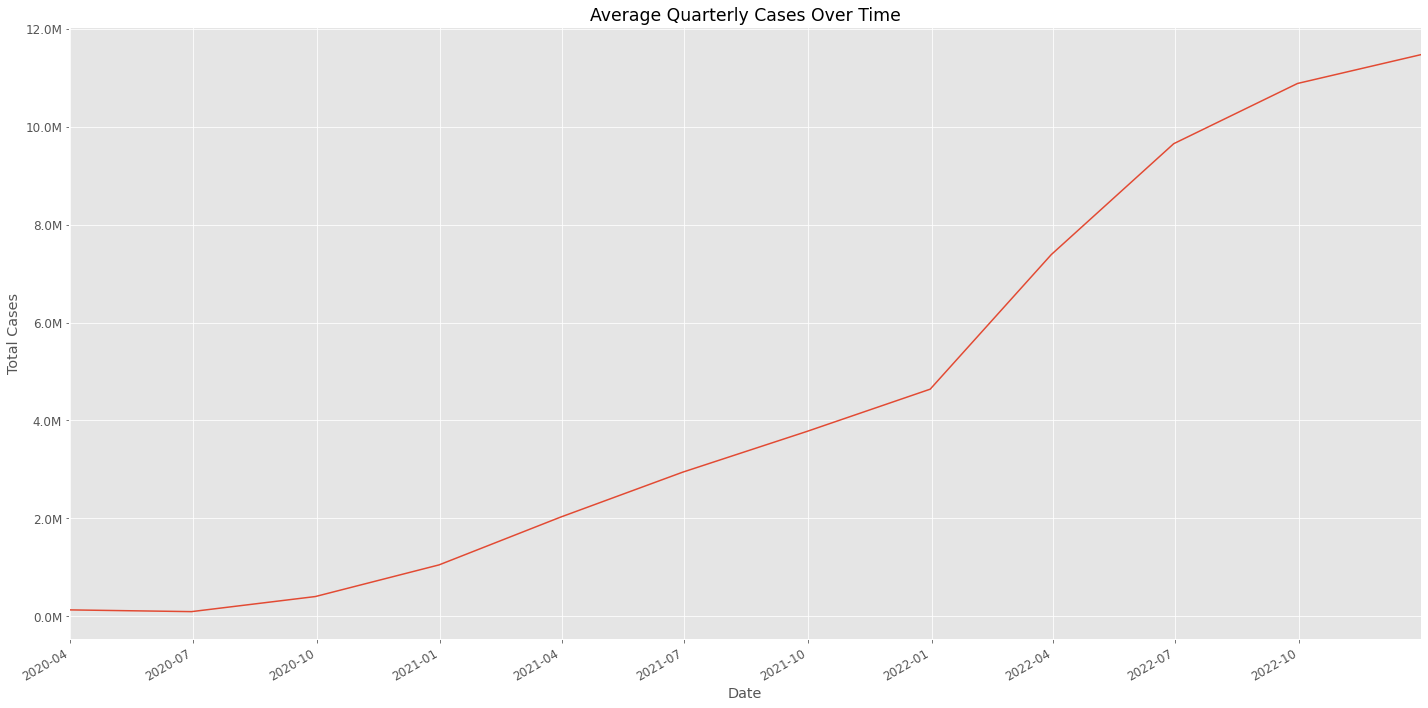

In [101]:
plot_date_rng(
    data=get_data(data=df_filled, rule='Q').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Average Quarterly Cases Over Time',
    formatter=format_mill
)

Plot Specific Date Range

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

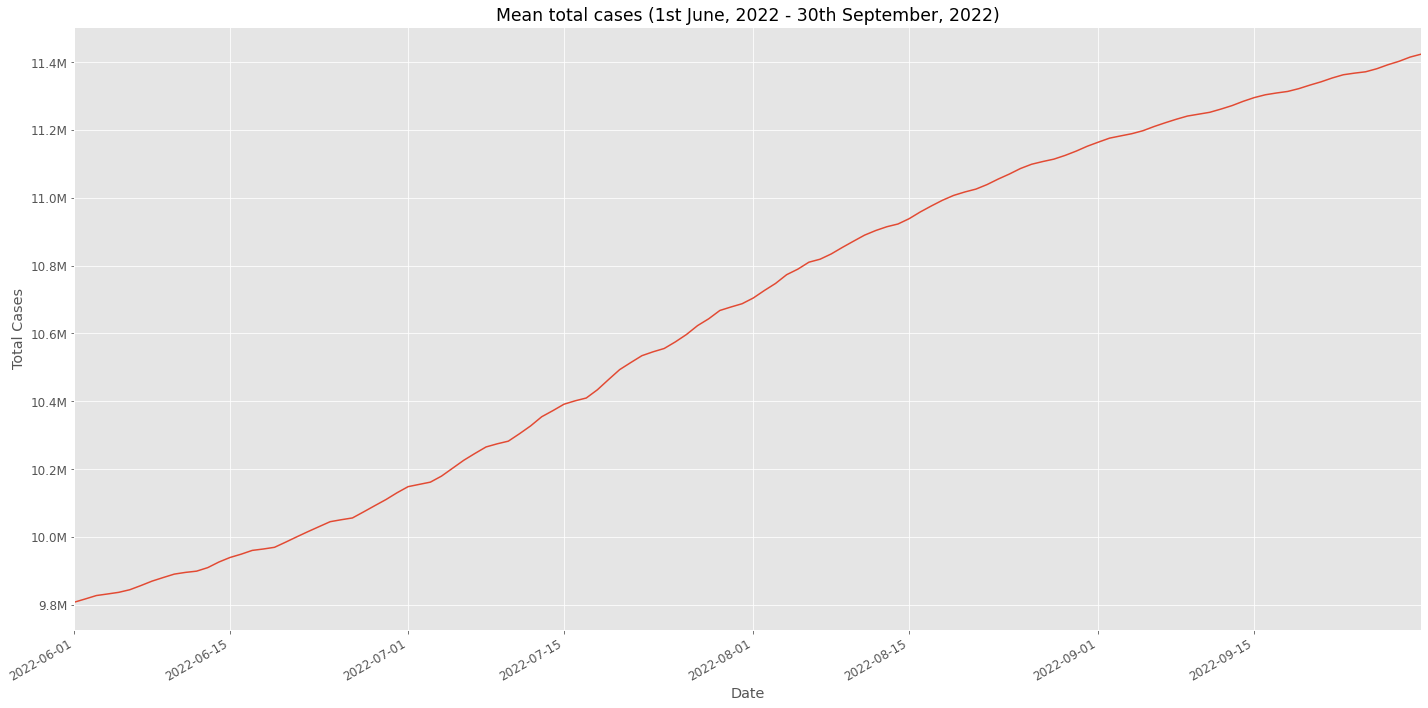

In [102]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-06-01', after='2022-09-30', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st June, 2022 - 30th September, 2022)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

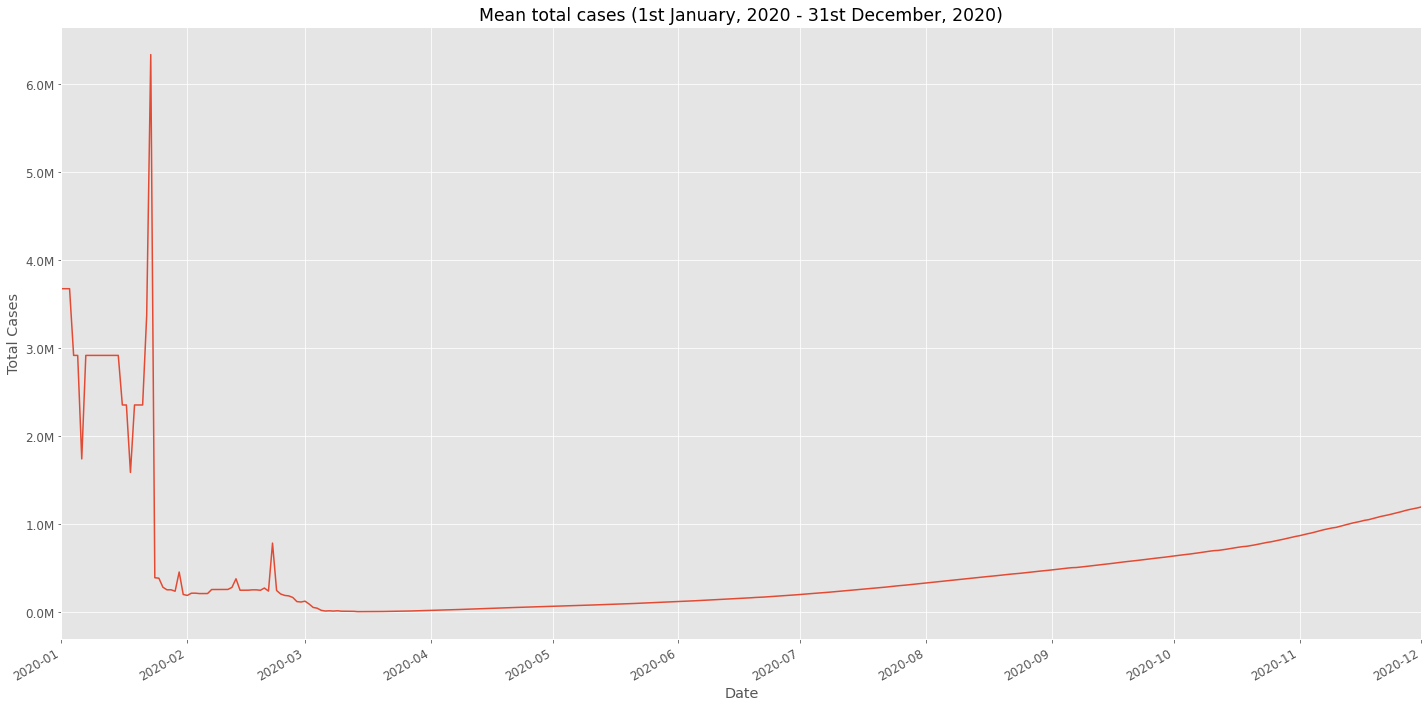

In [103]:
plot_date_rng(
    data=get_data(data=df_filled, before='2020-01-01', after='2020-12-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2020 - 31st December, 2020)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

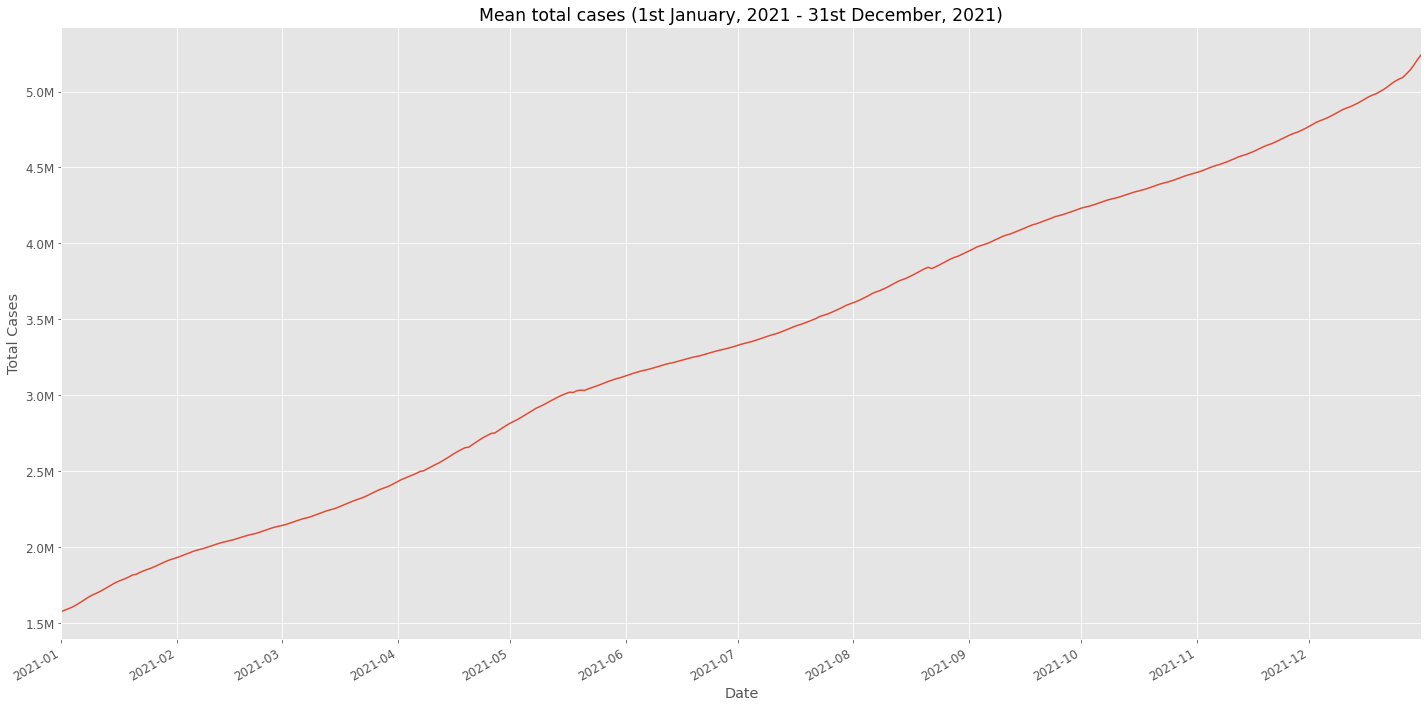

In [104]:
plot_date_rng(
    data=get_data(data=df_filled, before='2021-01-01', after='2021-12-31', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2021 - 31st December, 2021)',
    formatter=format_mill
)

<function __main__.plot_date_rng(data, x, y, hue=None, hue_order=None, palette=None, title=None, xlabel=None, ylabel=None, formatter=None)>

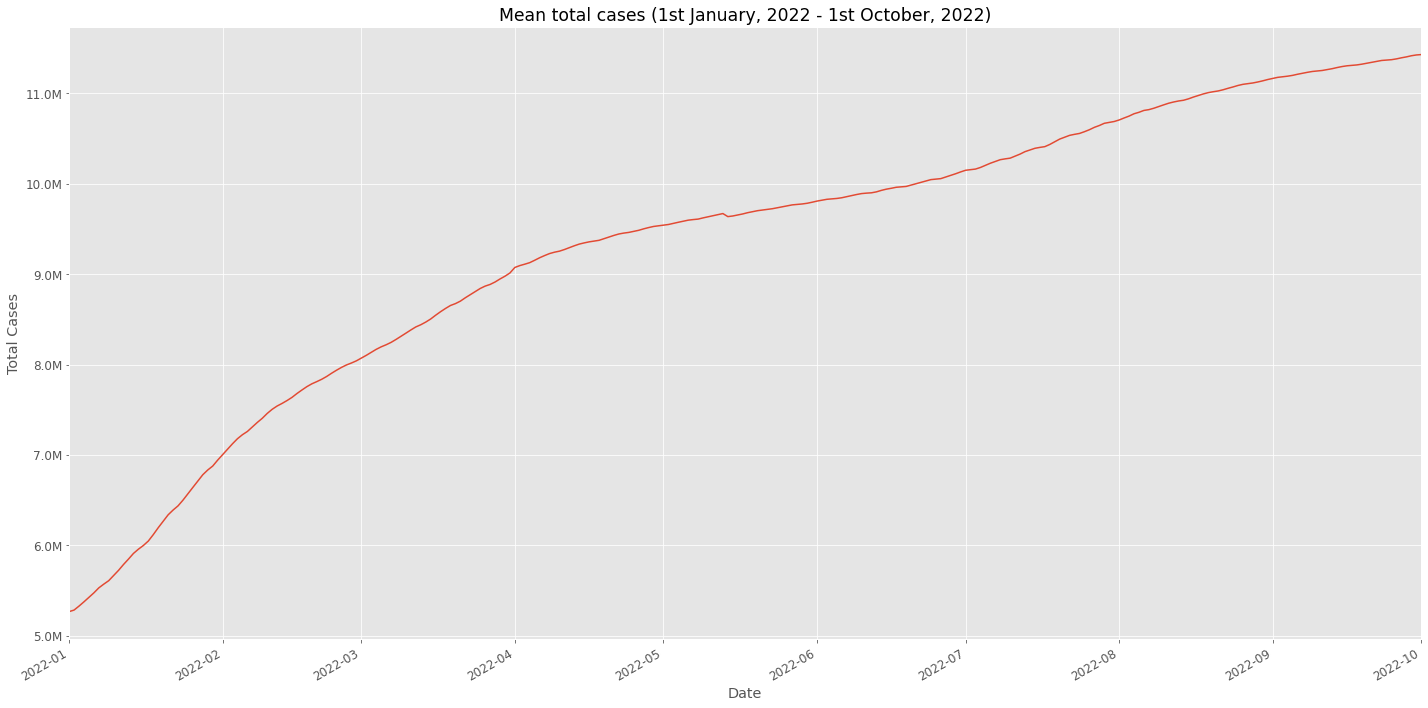

In [105]:
plot_date_rng(
    data=get_data(data=df_filled, before='2022-01-01', after='2022-10-01', rule='D').agg(np.mean),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Mean total cases (1st January, 2022 - 1st October, 2022)',
    formatter=format_mill
)